In [1]:
import os
import zipfile
import torch
from PIL import Image
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import random
from torch.utils.data import DataLoader
from skimage import feature
import numpy as np

In [2]:
path = r"/kaggle/input/tumor-trace"
train_folder = os.path.join(path, 'train')
val_folder = os.path.join(path, 'val')
test_folder = os.path.join(path, 'test')
files_and_dirs = os.listdir(path)
print(f"Contents of the main directory: {files_and_dirs}")
if os.path.exists(train_folder):
    train_subdirs = os.listdir(train_folder)
    print(f"Subdirectories in the train folder: {train_subdirs}")
else:
    print(f"The folder {train_folder} does not exist. Please check the path.")
if os.path.exists(val_folder):
    val_subdirs = os.listdir(val_folder)
    print(f"Subdirectories in the val folder: {val_subdirs}")
else:
    print(f"The folder {val_folder} does not exist. Please check the path.")
if os.path.exists(test_folder):
    test_subdirs = os.listdir(test_folder)
    print(f"Subdirectories in the test folder: {test_subdirs}")
else:
    print(f"The folder {test_folder} does not exist. Please check the path.")

Contents of the main directory: ['val', 'test', 'train']
Subdirectories in the train folder: ['Benign', 'Malignant']
Subdirectories in the val folder: ['Benign', 'Malignant']
Subdirectories in the test folder: ['Benign', 'Malignant']


In [3]:
import os
path = r"/kaggle/input/tumor-trace"
folder_count = 0
file_count = 0
for root, dirs, files in os.walk(path):
    folder_count += len(dirs)
    file_count += len(files)
print(f"Total Folders: {folder_count}")
print(f"Total Files: {file_count}")


Total Folders: 4185
Total Files: 29274


In [4]:
import os

def count_images_in_class(directory):
    """Count the number of image files in a directory, including subdirectories."""
    return sum([len(files) for r, d, files in os.walk(directory) if any(f.lower().endswith(('.jpg', '.jpeg', '.png')) for f in files)])

# Define your directories for training, validation, and test sets
train_dir = r'/kaggle/input/tumor-trace/train'
val_dir = r'/kaggle/input/tumor-trace/val'
test_dir = r'/kaggle/input/tumor-trace/test'

# Benign and Malignant directories for training, validation, and test sets
benign_train_dir = os.path.join(train_dir, 'Benign')
malignant_train_dir = os.path.join(train_dir, 'Malignant')

benign_val_dir = os.path.join(val_dir, 'Benign')
malignant_val_dir = os.path.join(val_dir, 'Malignant')

benign_test_dir = os.path.join(test_dir, 'Benign')
malignant_test_dir = os.path.join(test_dir, 'Malignant')

# Verify that the directories exist and print their contents
print("Checking directories and contents:\n")

def check_directory(path, name):
    print(f"{name} Directory Exists: {os.path.exists(path)}")
    if os.path.exists(path):
        print(f"Contents of {name} Directory: {os.listdir(path)}")
    print()

check_directory(benign_train_dir, "Benign Train")
check_directory(malignant_train_dir, "Malignant Train")
check_directory(benign_val_dir, "Benign Val")
check_directory(malignant_val_dir, "Malignant Val")
check_directory(benign_test_dir, "Benign Test")
check_directory(malignant_test_dir, "Malignant Test")

# Count the images in each class for training, validation, and test sets
benign_train_count = count_images_in_class(benign_train_dir)
malignant_train_count = count_images_in_class(malignant_train_dir)

benign_val_count = count_images_in_class(benign_val_dir)
malignant_val_count = count_images_in_class(malignant_val_dir)

benign_test_count = count_images_in_class(benign_test_dir)
malignant_test_count = count_images_in_class(malignant_test_dir)

# Print the counts
print(f"Benign (Training): {benign_train_count} images")
print(f"Malignant (Training): {malignant_train_count} images")

print(f"Benign (Validation): {benign_val_count} images")
print(f"Malignant (Validation): {malignant_val_count} images")

print(f"Benign (Test): {benign_test_count} images")
print(f"Malignant (Test): {malignant_test_count} images")



Checking directories and contents:

Benign Train Directory Exists: True
Contents of Benign Train Directory: ['BreaDM-Be-1820', 'BreaDM-Be-2106', 'BreaDM-Be-1818', 'BreaDM-Be-2108', 'BreaDM-Be-1803', 'BreaDM-Be-1902', 'BreaDM-Be-1825', 'BreaDM-Be-2016', 'BreaDM-Be-1827', 'BreaDM-Be-2107', 'BreaDM-Be-2103', 'BreaDM-Be-2007', 'BreaDM-Be-2010', 'BreaDM-Be-2015', 'BreaDM-Be-1809', 'BreaDM-Be-1908', 'BreaDM-Be-1903', 'BreaDM-Be-1812', 'BreaDM-Be-1829', 'BreaDM-Be-2006', 'BreaDM-Be-1828', 'BreaDM-Be-2012', 'BreaDM-Be-1811', 'BreaDM-Be-1913', 'BreaDM-Be-1806', 'BreaDM-Be-1830', 'BreaDM-Be-2101', 'BreaDM-Be-1808', 'BreaDM-Be-1831', 'BreaDM-Be-1910', 'BreaDM-Be-1801', 'BreaDM-Be-2004', 'BreaDM-Be-1819', 'BreaDM-Be-1805', 'BreaDM-Be-2003', 'BreaDM-Be-2009', 'BreaDM-Be-1816', 'BreaDM-Be-2011', 'BreaDM-Be-1817', 'BreaDM-Be-1804', 'BreaDM-Be-2021', 'BreaDM-Be-1807', 'BreaDM-Be-1823', 'BreaDM-Be-1912', 'BreaDM-Be-1904', 'BreaDM-Be-2018', 'BreaDM-Be-2008', 'BreaDM-Be-2023', 'BreaDM-Be-1821', 'BreaDM-B

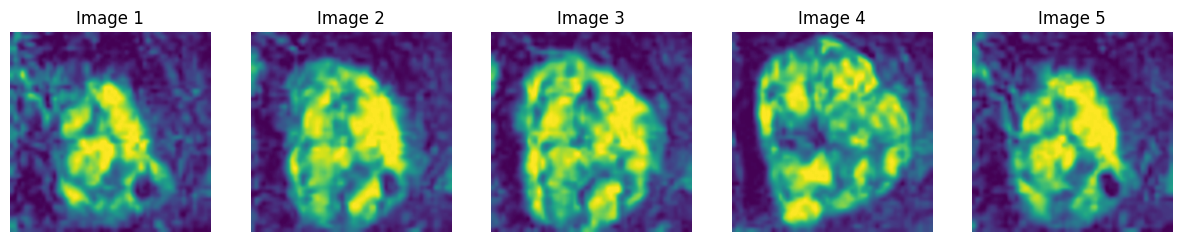

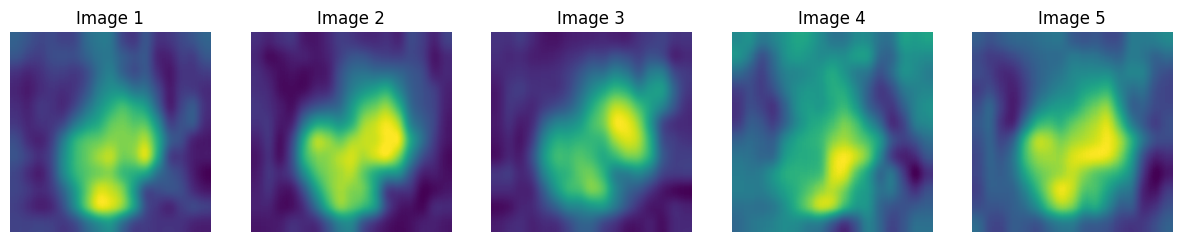

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def find_images_in_directory(directory):
    """Recursively search for image files in a directory."""
    image_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):  
                image_paths.append(os.path.join(root, file))
    return image_paths

def resize_images(image_paths, output_dir, new_size=(224, 224)):
    """
    Resize images to the specified size and save them in a new directory.
    
    Args:
        image_paths (list): List of image file paths.
        output_dir (str): Directory to save resized images.
        new_size (tuple): Target size for resizing (width, height).
    Returns:
        list: List of resized image objects for display.
    """
    resized_images = []  # List to store resized images for display
    os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist

    for image_path in image_paths:
        try:
            with Image.open(image_path) as img:
                resized_img = img.resize(new_size)
                
                # Save resized image to output directory
                relative_path = os.path.relpath(image_path, os.path.commonpath(image_paths))
                output_path = os.path.join(output_dir, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                resized_img.save(output_path)
                
                # Append the resized image to the list for display
                resized_images.append(resized_img)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
    
    return resized_images

def display_images(images):
    """Display the provided list of images."""
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img)
        plt.axis('off')  # Turn off axis
        plt.title(f'Image {i + 1}')
    plt.show()

def process_images_in_directory(directory, output_dir, new_size=(224, 224)):
    """Find, resize, and display images in a specified directory."""
    image_files = find_images_in_directory(directory)
    if image_files:
        resized_images = resize_images(image_files, output_dir, new_size)
        display_images(resized_images[:5])  # Display the first 5 resized images
    else:
        print(f"No images found in the directory: {directory}")

# Example directories (replace with your actual paths)
train_folder = r'/kaggle/input/tumor-trace/train'
val_folder = r'/kaggle/input/tumor-trace/val'

# Output directories for resized images
output_train_folder = r'/kaggle/output/resized_images/train'
output_val_folder = r'/kaggle/output/resized_images/val'

# Process train and validation directories
process_images_in_directory(train_folder, output_train_folder)
process_images_in_directory(val_folder, output_val_folder)


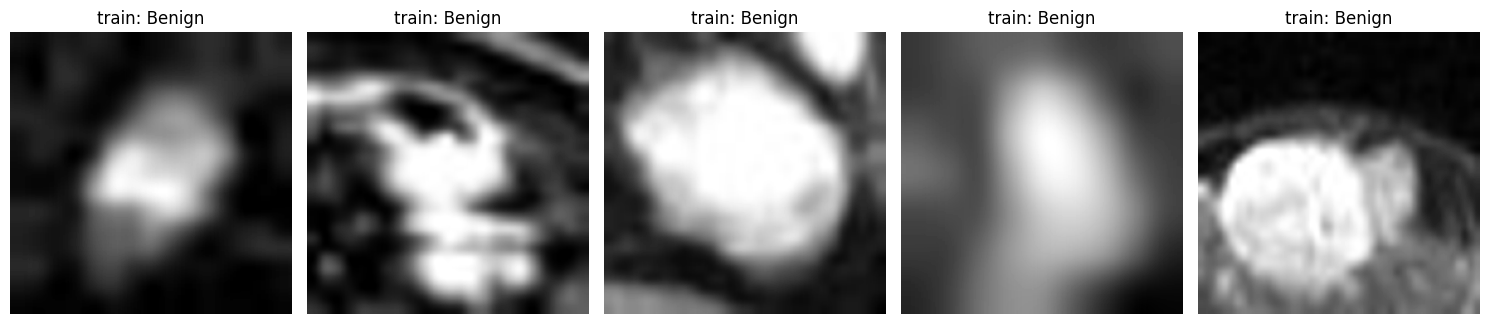

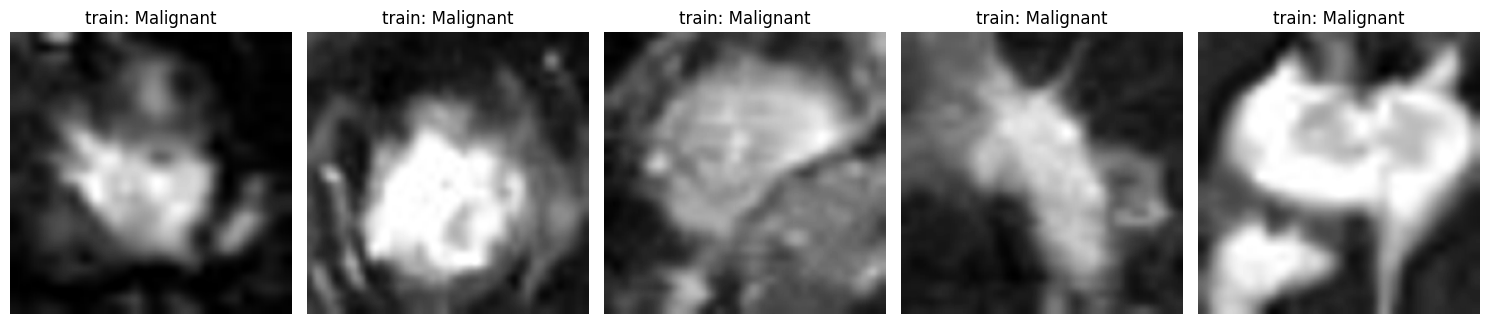

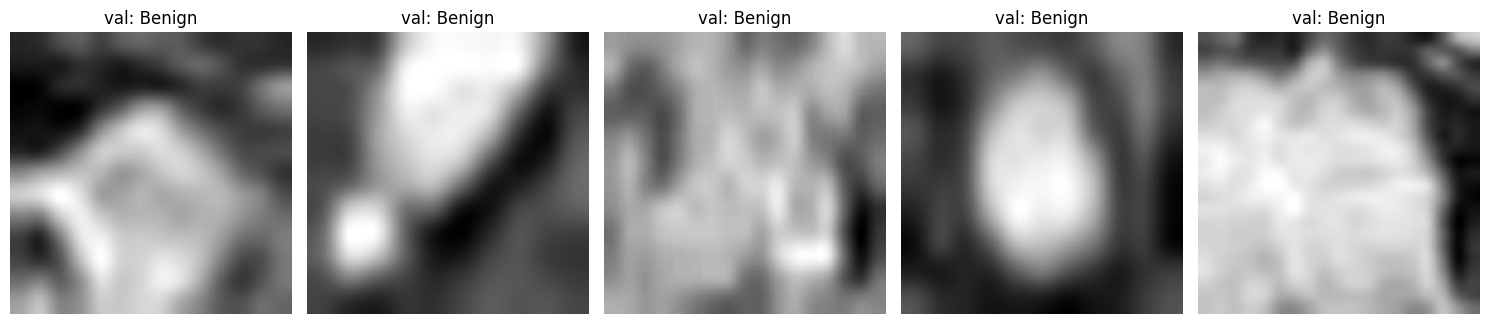

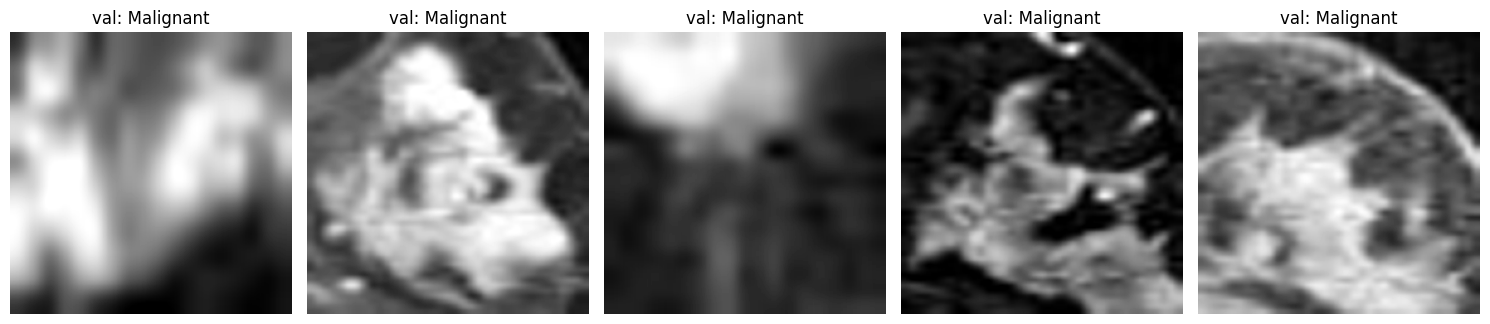

In [6]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def find_images_in_directory(directory):
    """Search for image files in the specified directory and return a list of image paths."""
    image_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                image_path = os.path.join(root, file)
                image_paths.append(image_path)
    return image_paths

def display_images_with_labels(images, labels):
    """Display the provided list of images with corresponding labels."""
    plt.figure(figsize=(15, 5))
    for i, (img, label) in enumerate(zip(images, labels)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray')  # Ensure consistent grayscale display
        plt.axis('off')
        plt.title(label)
    plt.tight_layout()
    plt.show()

def display_random_images(directory, class_name, dataset_type, num_images=5, display_size=(224, 224)):
    """Find and display random images from the specified directory with class and dataset labels."""
    image_paths = find_images_in_directory(directory)
    
    if image_paths:
        selected_images = random.sample(image_paths, min(num_images, len(image_paths)))  # Select random images
        resized_images = [
            Image.open(img_path).convert('L').resize(display_size)  # Convert to grayscale and resize
            for img_path in selected_images
        ]
        
        labels = [f'{dataset_type}: {class_name}' for _ in resized_images]  # Create labels
        display_images_with_labels(resized_images, labels)  # Display resized images with labels
    else:
        print(f"No images found in the directory: {directory}")

# Specify the paths for the folders
train_benign_folder = r'/kaggle/input/tumor-trace/train/Benign'
train_malignant_folder = r'/kaggle/input/tumor-trace/train/Malignant'
val_benign_folder = r'/kaggle/input/tumor-trace/val/Benign'
val_malignant_folder = r'/kaggle/input/tumor-trace/val/Malignant'

# Display 5 random images from the training benign and malignant folders
display_random_images(train_benign_folder, 'Benign', 'train', num_images=5, display_size=(224, 224))
display_random_images(train_malignant_folder, 'Malignant', 'train', num_images=5, display_size=(224, 224))

# Display 5 random images from the validation benign and malignant folders
display_random_images(val_benign_folder, 'Benign', 'val', num_images=5, display_size=(224, 224))
display_random_images(val_malignant_folder, 'Malignant', 'val', num_images=5, display_size=(224, 224))



Applying Horizontal Flip augmentation:


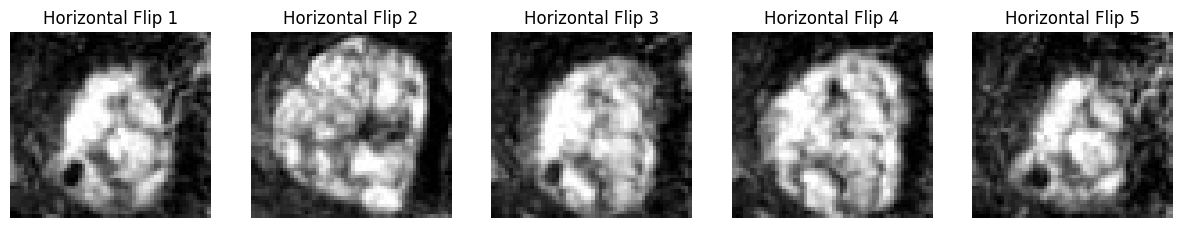


Applying Vertical Flip augmentation:


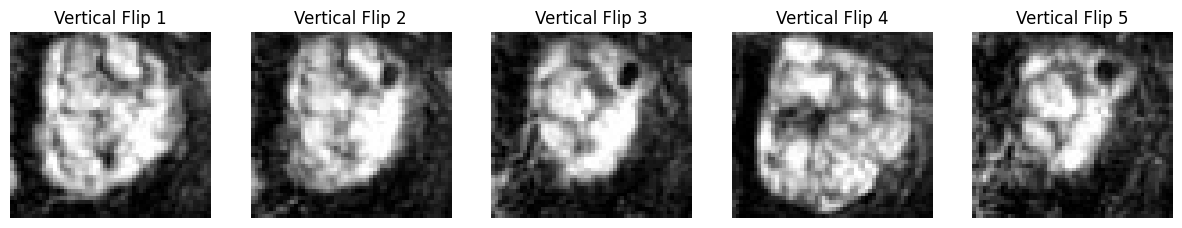


Applying Rotation augmentation:


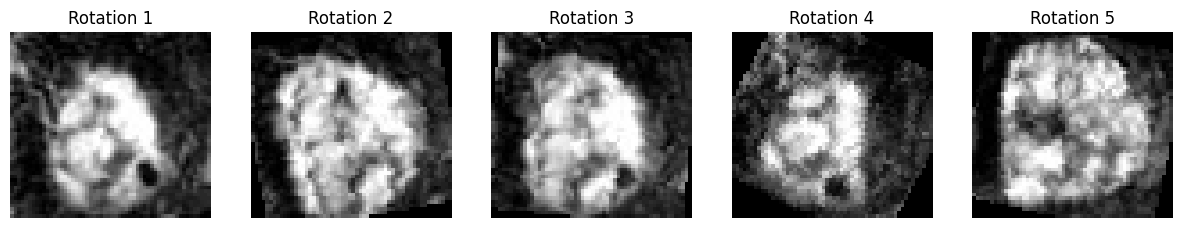


Applying Shear augmentation:


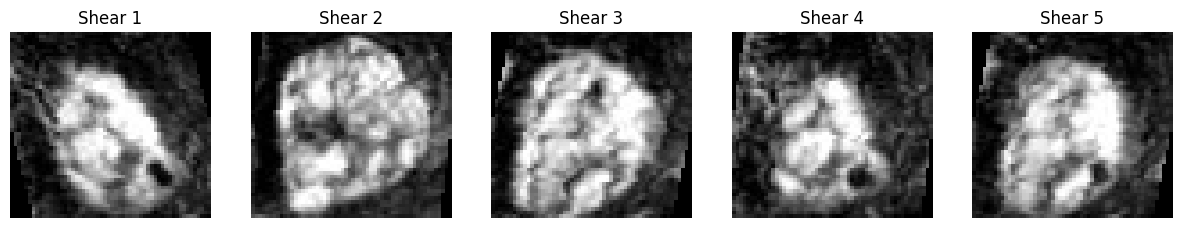


Applying Color Jitter augmentation:


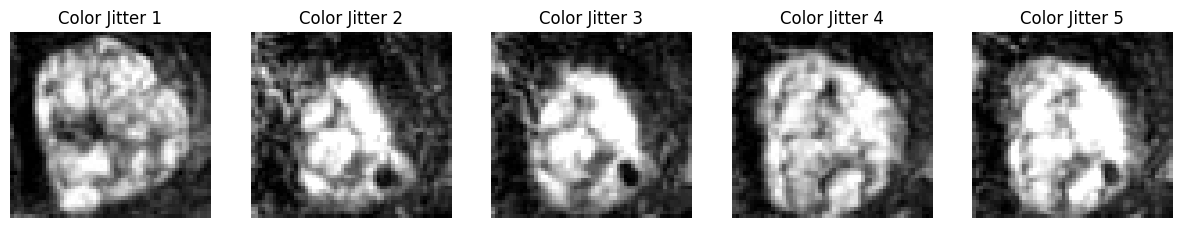


Applying Horizontal Flip augmentation:


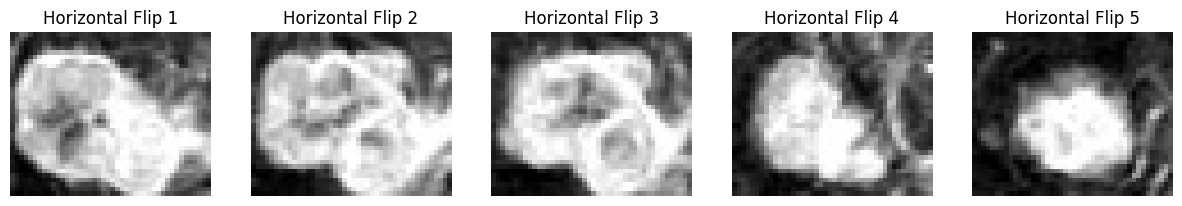


Applying Vertical Flip augmentation:


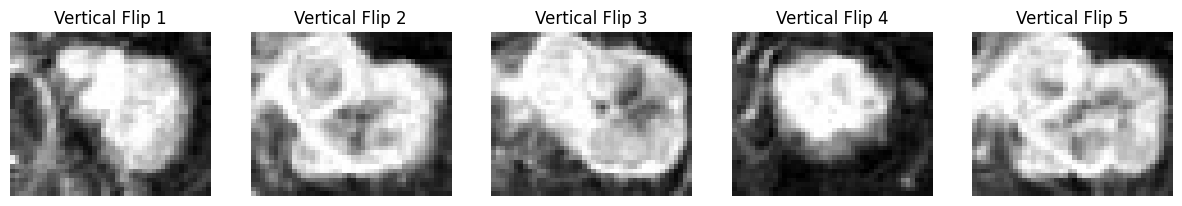


Applying Rotation augmentation:


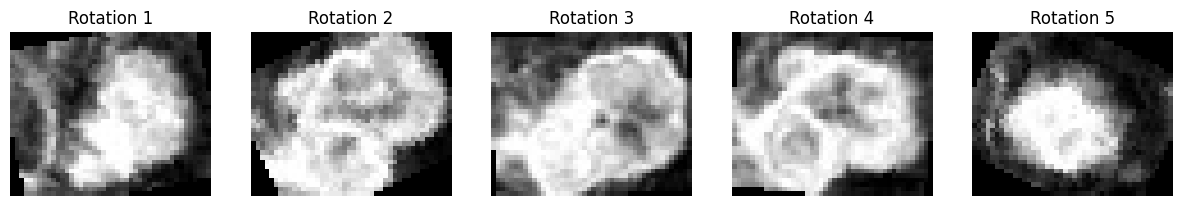


Applying Shear augmentation:


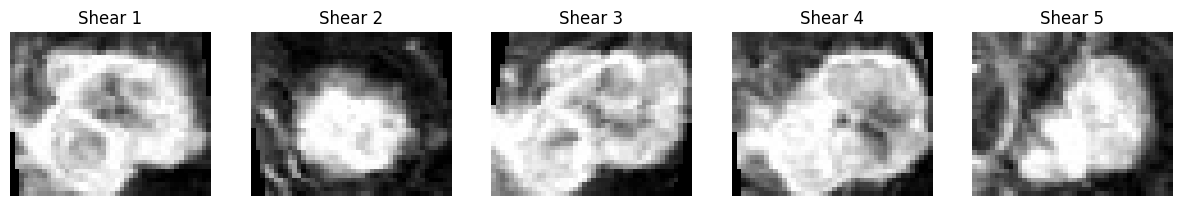


Applying Color Jitter augmentation:


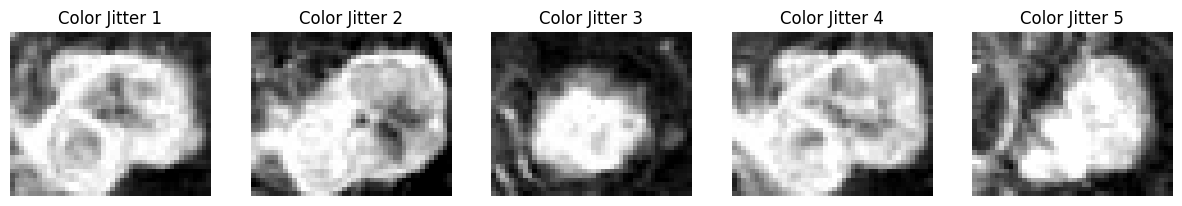


Applying Horizontal Flip augmentation:


<Figure size 1500x500 with 0 Axes>


Applying Vertical Flip augmentation:


<Figure size 1500x500 with 0 Axes>


Applying Rotation augmentation:


<Figure size 1500x500 with 0 Axes>


Applying Shear augmentation:


<Figure size 1500x500 with 0 Axes>


Applying Color Jitter augmentation:


<Figure size 1500x500 with 0 Axes>


Applying Horizontal Flip augmentation:


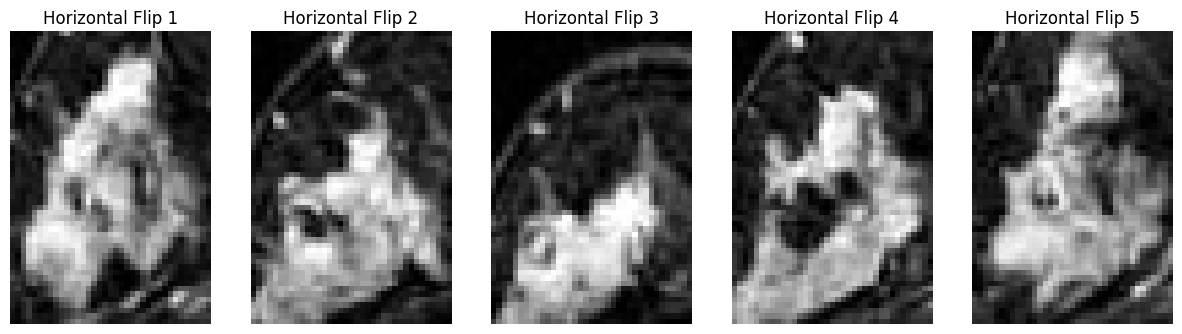


Applying Vertical Flip augmentation:


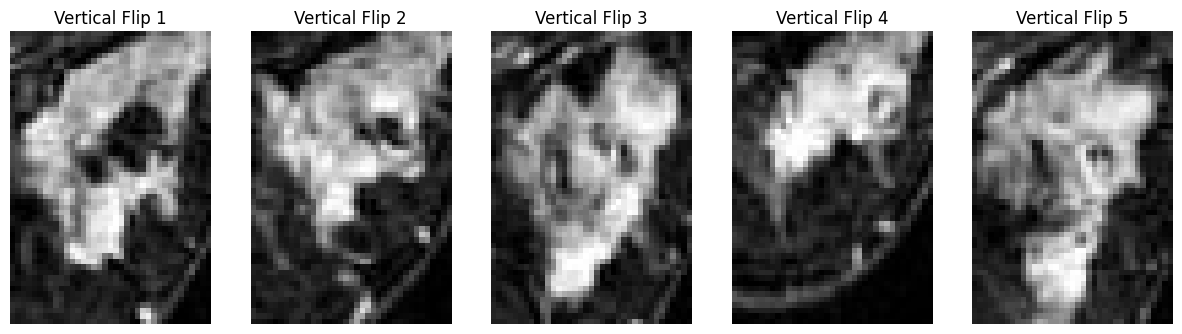


Applying Rotation augmentation:


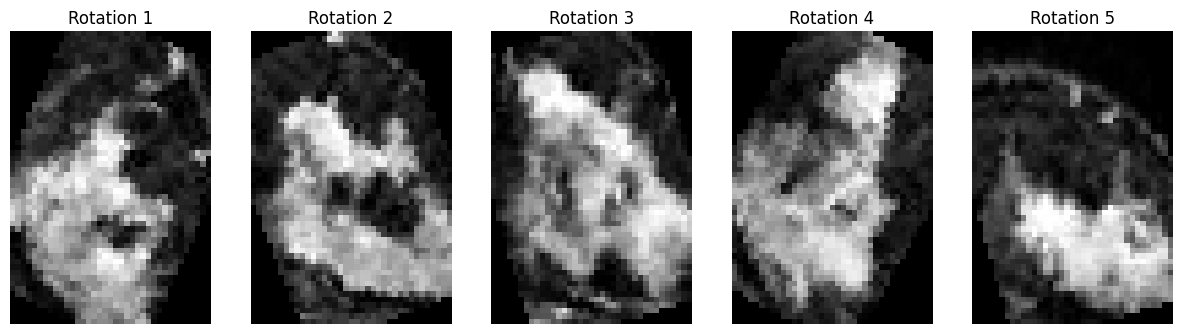


Applying Shear augmentation:


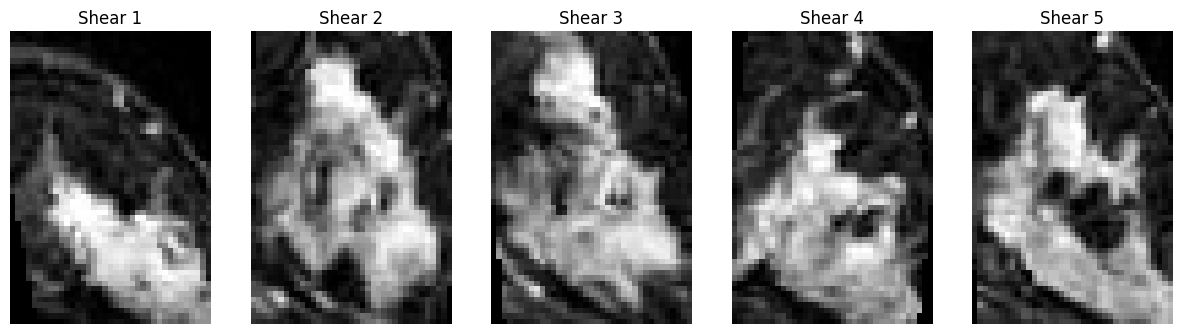


Applying Color Jitter augmentation:


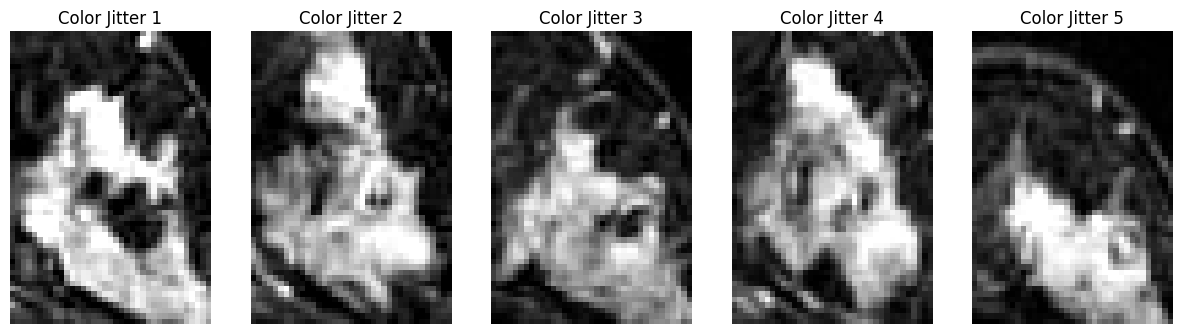

In [7]:
def augment_images_in_directory(directory):
    """Find and augment images in a specified directory, applying multiple transformations."""

    # Define the transformations
    augmentations = {
        "Horizontal Flip": transforms.RandomHorizontalFlip(p=1),
        "Vertical Flip": transforms.RandomVerticalFlip(p=1),
        "Rotation": transforms.RandomRotation(30),
        "Shear": transforms.RandomAffine(degrees=0, shear=15),
        "Color Jitter": transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    }

    # Define the normalization (for MRI, normalization might not apply the same way as RGB)
    normalization = transforms.Normalize(mean=[0.5], std=[0.5])  # Adjust based on MRI specifics

    images = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                images.append(Image.open(image_path).convert('L'))  # Convert to grayscale
                if len(images) >= 5:  # Limit to 5 images
                    break
        if len(images) >= 5:
            break

    for name, augmentation in augmentations.items():
        augmented_images = []
        print(f"\nApplying {name} augmentation:")
        for img in images:
            augmented_img = augmentation(img)
            # Normalize the augmented image
            augmented_img = transforms.ToTensor()(augmented_img)  # Convert to tensor before normalization
            augmented_img = normalization(augmented_img)  # Apply normalization
            augmented_images.append(augmented_img)

        display_images(random.sample(augmented_images, min(5, len(augmented_images))), name)

def display_images(images, title):
    """Display the provided list of images with a given title."""
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(images):
        # Convert tensor back to image for display
        img = img.squeeze(0).numpy()  # Convert (C, H, W) to (H, W)
        img = (img * 0.5) + 0.5  # Unnormalize for display (if normalization was done with mean=0.5 and std=0.5)
        img = img.clip(0, 1)  # Ensure pixel values are between 0 and 1
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray')  # Use gray colormap for grayscale images
        plt.axis('off')
        plt.title(f'{title} {i + 1}')
    plt.show()

# Specify the paths for the benign and malignant folders
train_benign_folder = r'/kaggle/input/tumor-trace/train/Benign'
train_malignant_folder = r'/kaggle/input/tumor-trace/train/Malignant'

# Augment images from both the benign and malignant folders
augment_images_in_directory(train_benign_folder)
augment_images_in_directory(train_malignant_folder)

# If you also want to augment images from the validation folders
val_benign_folder = r'/kaggle/input/tumor-trace/val/benign'
val_malignant_folder = r'/kaggle/input/tumor-trace/val/Malignant/'


# Augment images from both the validation benign and malignant folders
augment_images_in_directory(val_benign_folder)
augment_images_in_directory(val_malignant_folder)

In [8]:
from torchvision import transforms

# Define a transformation for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to fit model input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]),  # Normalize the images
])

# Define the root directory for the dataset
root_dir = r'/kaggle/input/tumor-trace'

# Set up the datasets for train, validation, and test
train_dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(root_dir, 'val'), transform=transform)
test_dataset = datasets.ImageFolder(os.path.join(root_dir, 'test'), transform=transform)

# Create data loaders for each dataset
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Example: Iterating through the data loader
for images, labels in train_loader:
    # Your training code here
    print(images.shape, labels.shape)  # Print the shape of the images and labels
    break  # Remove break to iterate through the entire dataset


torch.Size([32, 3, 224, 224]) torch.Size([32])


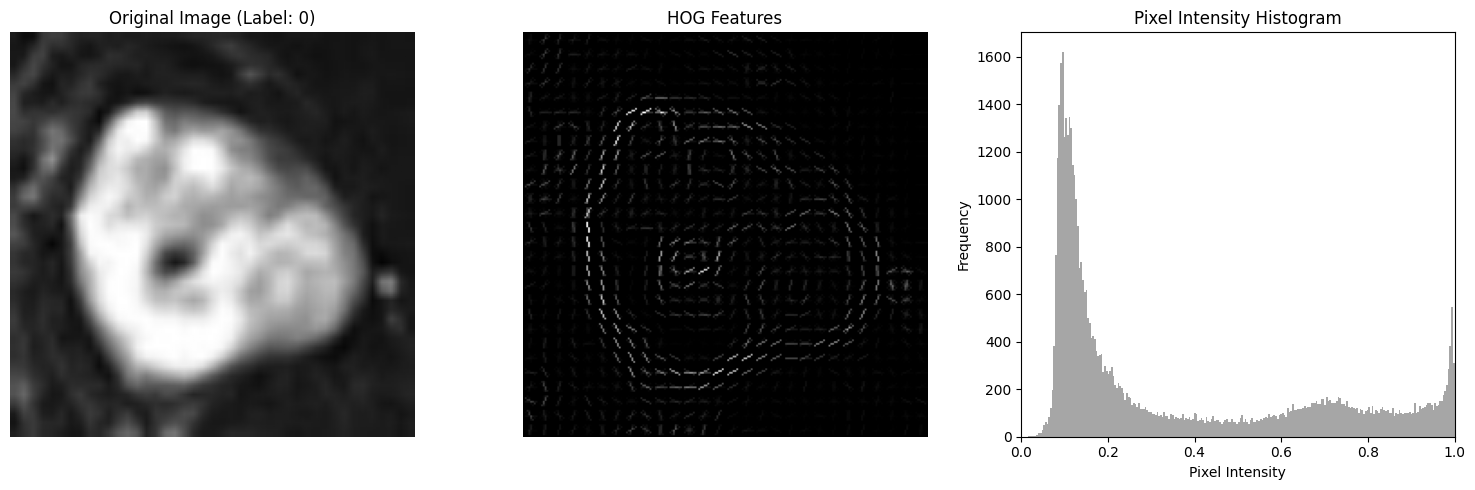

High pixel values: [0.8039215  0.8039215  0.80784315 ... 0.8196079  0.8117647  0.8039215 ]
Number of high pixel values: 7172


In [9]:
root_dir = r'/kaggle/input/tumor-trace'

# Set up the dataset for train (or use val/test as needed)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to fit model input size
    transforms.ToTensor(),
])
dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

# Randomly pick an image
random_index = random.randint(0, len(dataset) - 1)
random_image, label = dataset[random_index]

# Convert the image tensor to a NumPy array
image_np = random_image.numpy()  # shape is (C, H, W)
image_np = np.transpose(image_np, (1, 2, 0))  # Now shape is (H, W, C)

# Convert the image to grayscale for HOG
image_gray = np.mean(image_np, axis=2)  # Average across color channels

# Compute HOG features
hog_features, hog_image = feature.hog(image_gray, visualize=True, block_norm='L2-Hys')

# Plot the original image, HOG image, and pixel intensity histogram
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image_np)
plt.axis('off')
plt.title(f'Original Image (Label: {label})')

# HOG image
plt.subplot(1, 3, 2)
plt.imshow(hog_image, cmap='gray')
plt.axis('off')
plt.title('HOG Features')

# Pixel intensity histogram
plt.subplot(1, 3, 3)
plt.hist(image_gray.ravel(), bins=256, range=[0, 1], color='gray', alpha=0.7)
plt.title('Pixel Intensity Histogram')
plt.xlim([0, 1])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display high pixel values
high_pixel_indices = np.where(image_gray > 0.8)  # Adjust threshold as needed
high_pixel_values = image_gray[high_pixel_indices]

print(f"High pixel values: {high_pixel_values}")
print(f"Number of high pixel values: {len(high_pixel_values)}")

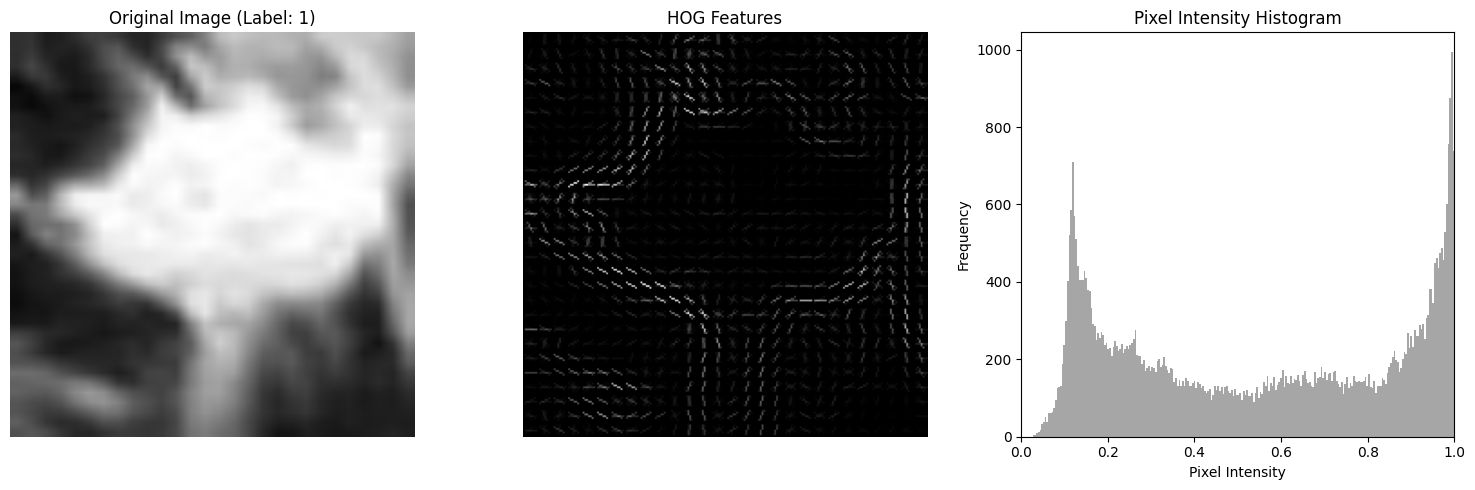

High pixel values: [0.8039215 0.8039215 0.8039215 ... 0.8117647 0.8039215 0.8039215]
Number of high pixel values: 15726


In [10]:
dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

random_index = random.randint(0, len(dataset) - 1)
random_image, label = dataset[random_index]
image_np = random_image.numpy()  # shape is (C, H, W)
image_np = np.transpose(image_np, (1, 2, 0))  # Now shape is (H, W, C)

# Convert the image to grayscale for HOG
  # Average across color channels
image_gray = np.mean(image_np, axis=2)
# Compute HOG features
hog_features, hog_image = feature.hog(image_gray, visualize=True, block_norm='L2-Hys')

# Plot the original image, HOG image, and pixel intensity histogram
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image_np)
plt.axis('off')
plt.title(f'Original Image (Label: {label})')

# HOG image
plt.subplot(1, 3, 2)
plt.imshow(hog_image, cmap='gray')
plt.axis('off')
plt.title('HOG Features')

# Pixel intensity histogram
plt.subplot(1, 3, 3)
plt.hist(image_gray.ravel(), bins=256, range=[0, 1], color='gray', alpha=0.7)
plt.title('Pixel Intensity Histogram')
plt.xlim([0, 1])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display high pixel values
high_pixel_indices = np.where(image_gray > 0.8)  # Adjust threshold as needed
high_pixel_values = image_gray[high_pixel_indices]

print(f"High pixel values: {high_pixel_values}")
print(f"Number of high pixel values: {len(high_pixel_values)}")


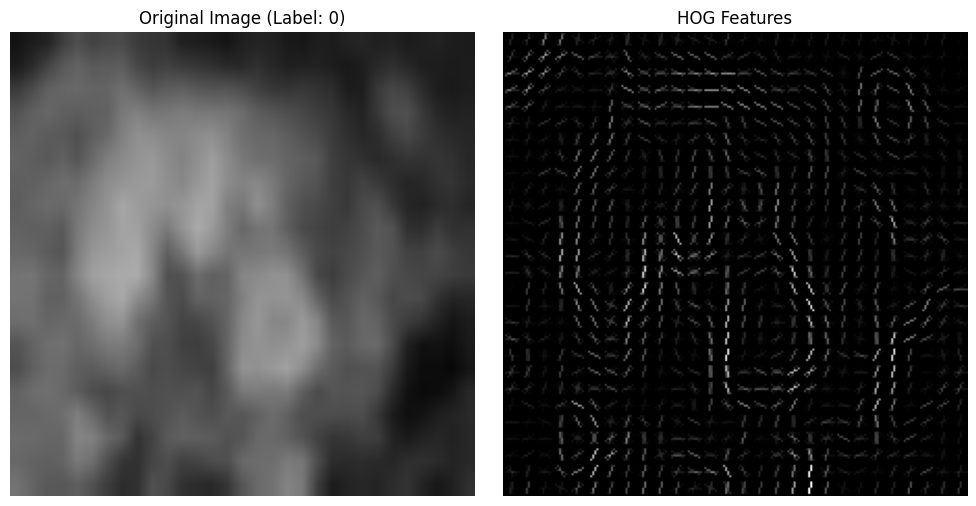

In [11]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the root directory for the dataset
root_dir = r'/kaggle/input/tumor-trace'

# Set up the dataset for training
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to fit model input size
    transforms.ToTensor(),
])

# Load the dataset using ImageFolder
dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

# Select a random image from the dataset
random_index = random.randint(0, len(dataset) - 1)
random_image, label = dataset[random_index]

# Convert the tensor image to a numpy array and transpose to HxWxC format
image_np = random_image.numpy()
image_np = np.transpose(image_np, (1, 2, 0))

# Convert the image to grayscale (average across color channels)
image_gray = np.mean(image_np, axis=2)

# Compute HOG features
hog_features, hog_image = feature.hog(image_gray, visualize=True, block_norm='L2-Hys')

# Plot the original image and HOG image
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.axis('off')
plt.title(f'Original Image (Label: {label})')

# HOG image
plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.axis('off')
plt.title('HOG Features')

plt.tight_layout()
plt.show()


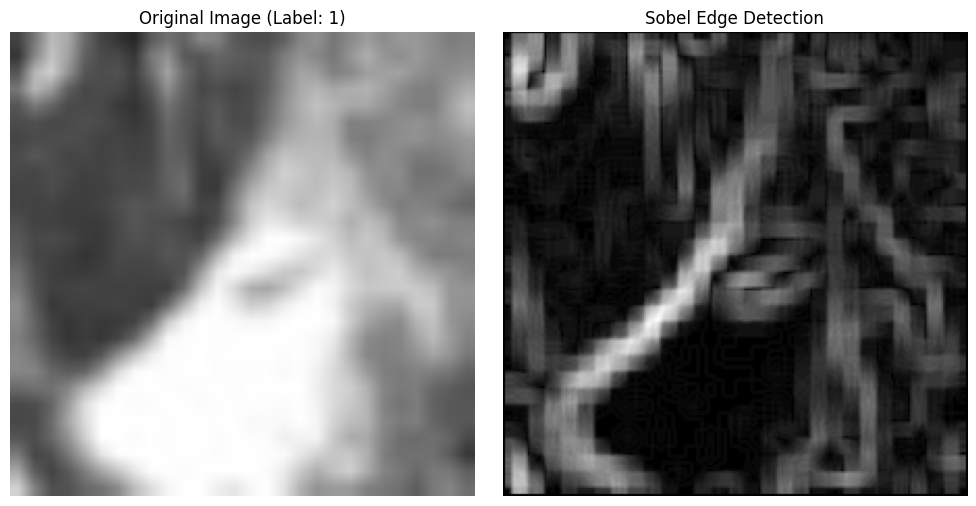

In [12]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

def convolve(image, kernel):
    height, width = image.shape
    kernel_height, kernel_width = kernel.shape
    output = np.zeros_like(image)
    
    
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            region = image[i - 1:i + 2, j - 1:j + 2]
            output[i, j] = np.sum(region * kernel)
    return output

root_dir = r'/kaggle/input/tumor-trace'

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to fit model input size
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)


random_index = random.randint(0, len(dataset) - 1)
random_image, label = dataset[random_index]

image_np = random_image.numpy()
image_np = np.transpose(image_np, (1, 2, 0))

image_gray = np.mean(image_np, axis=2)

gradient_x = convolve(image_gray, sobel_x)
gradient_y = convolve(image_gray, sobel_y)

edge_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
edge_magnitude = (edge_magnitude / edge_magnitude.max()) * 255  # Normalize to 0-255

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.axis('off')
plt.title(f'Original Image (Label: {label})')

plt.subplot(1, 2, 2)
plt.imshow(edge_magnitude, cmap='gray')
plt.axis('off')
plt.title('Sobel Edge Detection')

plt.tight_layout()
plt.show()


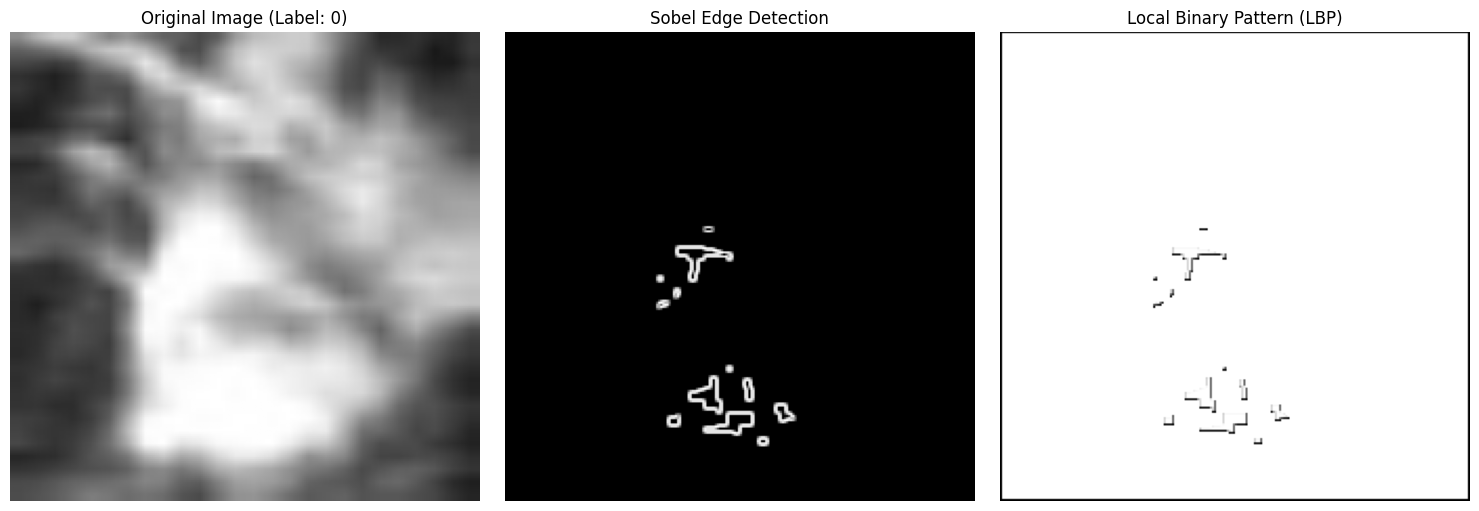

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

def convolve(image, kernel):
    height, width = image.shape
    output = np.zeros_like(image)
    
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            region = image[i - 1:i + 2, j - 1:j + 2]
            output[i, j] = np.sum(region * kernel)
    return output

# Function to compute LBP
def compute_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)

    # Define neighborhood offsets for 3x3 pixels
    neighbors = [
        (i, j) for i in range(-1, 2) for j in range(-1, 2) if (i, j) != (0, 0)
    ]

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            lbp_code = 0
            
           
            for k in range(8):
                neighbor_value = image[i + neighbors[k][0], j + neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    return lbp_image

if __name__ == "__main__":
    
    root_dir = r'/kaggle/input/tumor-trace'

    
    transform = transforms.Compose([
        transforms.Resize((224, 224)), 
        transforms.ToTensor(),
    ])

    dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

    random_index = random.randint(0, len(dataset) - 1)
    random_image, label = dataset[random_index]

    image_np = random_image.numpy()
    image_np = np.transpose(image_np, (1, 2, 0))
    image_gray = np.mean(image_np, axis=2).astype(np.uint8)  

    gradient_x = convolve(image_gray, sobel_x)
    gradient_y = convolve(image_gray, sobel_y)

    edge_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    edge_magnitude = (edge_magnitude / edge_magnitude.max()) * 255  # Normalize to 0-255

    lbp_image = compute_LBP(image_gray)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image_np)
    plt.axis('off')
    plt.title(f'Original Image (Label: {label})')

    plt.subplot(1, 3, 2)
    plt.imshow(edge_magnitude, cmap='gray')
    plt.axis('off')
    plt.title('Sobel Edge Detection')

    plt.subplot(1, 3, 3)
    plt.imshow(lbp_image, cmap='gray', vmin=0, vmax=255)  # Add vmin and vmax for better display
    plt.axis('off')
    plt.title('Local Binary Pattern (LBP)')

    plt.tight_layout()
    plt.show()


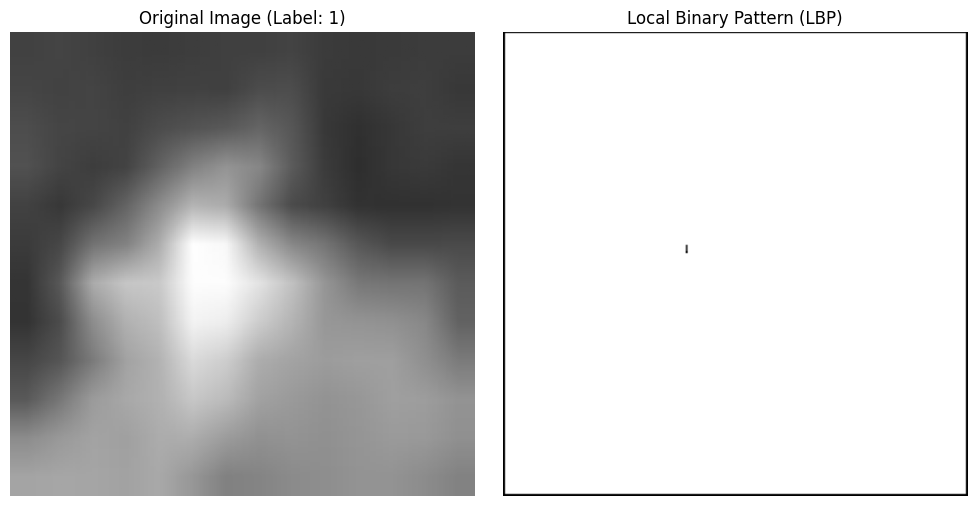

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms

# Function to compute LBP
def compute_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)

    # Define neighborhood offsets for 3x3 pixels
    neighbors = [
        (-1, -1), (-1, 0), (-1, 1),
        (0, -1),           (0, 1),
        (1, -1), (1, 0), (1, 1)
    ]

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            lbp_code = 0
            
            # Collect neighbor values
            for k in range(8):
                neighbor_value = image[i + neighbors[k][0], j + neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    return lbp_image

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fit model input size
        transforms.ToTensor(),
    ])

    # Load dataset
    dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

    # Randomly select an image from the dataset
    random_index = random.randint(0, len(dataset) - 1)
    random_image, label = dataset[random_index]

    # Convert the image to numpy and grayscale
    image_np = random_image.numpy()
    image_np = np.transpose(image_np, (1, 2, 0))
    image_gray = np.mean(image_np, axis=2).astype(np.uint8)  # Convert to uint8 for LBP

    # Compute LBP
    lbp_image = compute_LBP(image_gray)

    # Display the original and LBP images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.axis('off')
    plt.title(f'Original Image (Label: {label})')

    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image, cmap='gray', vmin=0, vmax=255)  # Add vmin and vmax for better display
    plt.axis('off')
    plt.title('Local Binary Pattern (LBP)')

    plt.tight_layout()
    plt.show()


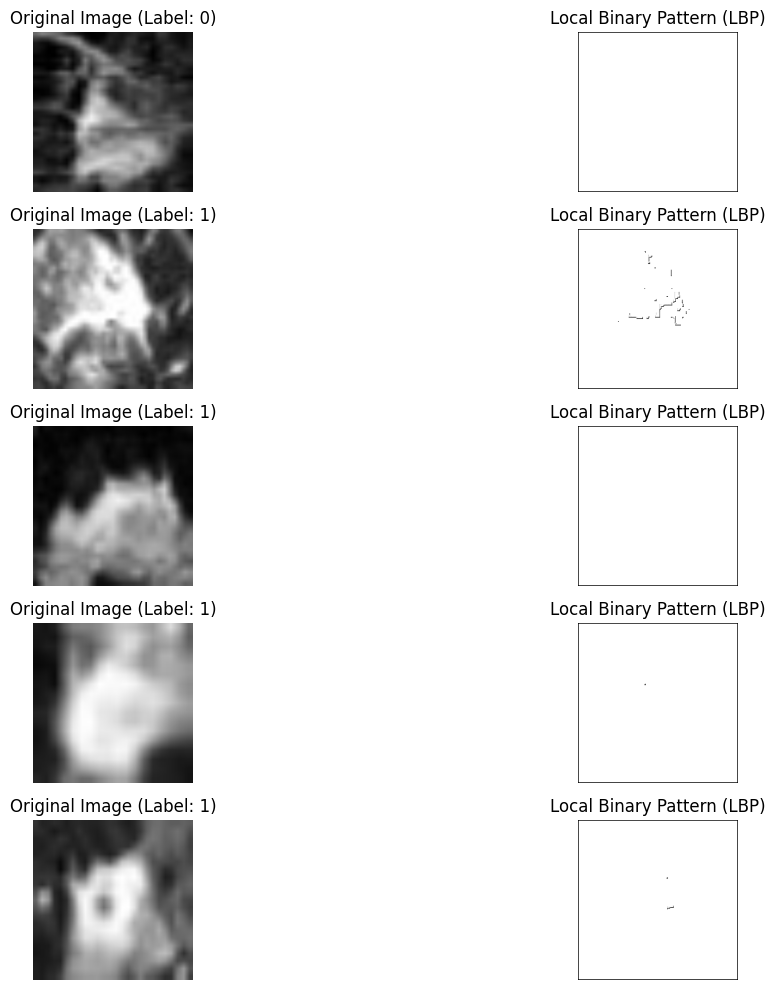

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms

# Function to compute LBP
def compute_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)

    # Define neighborhood offsets for 3x3 pixels
    neighbors = [
        (-1, -1), (-1, 0), (-1, 1),
        (0, -1),           (0, 1),
        (1, -1), (1, 0), (1, 1)
    ]

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            lbp_code = 0
            
            # Collect neighbor values
            for k in range(8):
                neighbor_value = image[i + neighbors[k][0], j + neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    return lbp_image

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fit model input size
        transforms.ToTensor(),
    ])

    # Load dataset
    dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

    # Display LBP for 5 random images
    plt.figure(figsize=(15, 10))
    
    for idx in range(5):
        # Randomly select an image from the dataset
        random_index = random.randint(0, len(dataset) - 1)
        random_image, label = dataset[random_index]

        # Convert the image to numpy and grayscale
        image_np = random_image.numpy()
        image_np = np.transpose(image_np, (1, 2, 0))
        image_gray = np.mean(image_np, axis=2).astype(np.uint8)  # Convert to uint8 for LBP

        # Compute LBP
        lbp_image = compute_LBP(image_gray)

        # Display original and LBP image side by side
        plt.subplot(5, 2, 2 * idx + 1)
        plt.imshow(image_np)
        plt.axis('off')
        plt.title(f'Original Image (Label: {label})')

        plt.subplot(5, 2, 2 * idx + 2)
        plt.imshow(lbp_image, cmap='gray', vmin=0, vmax=255)  # Add vmin and vmax for better display
        plt.axis('off')
        plt.title('Local Binary Pattern (LBP)')

    plt.tight_layout()
    plt.show()


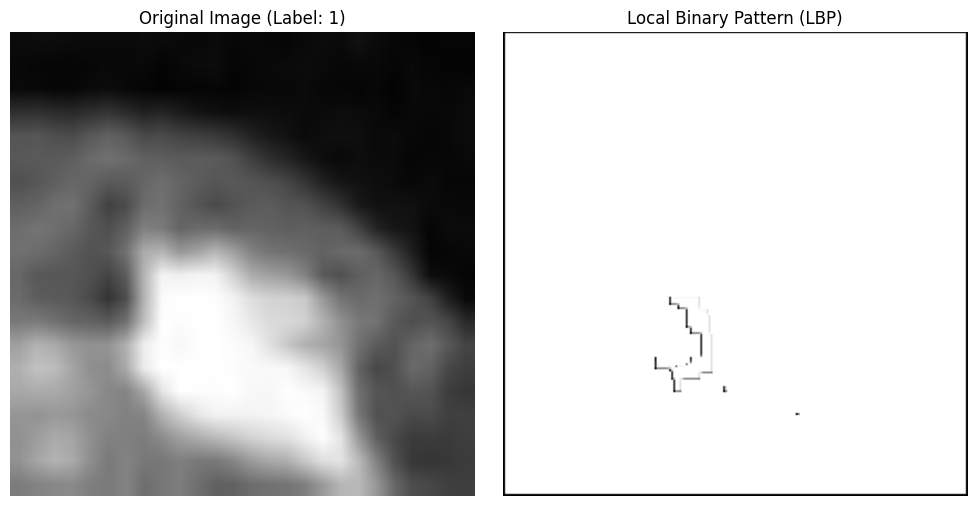

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms

# Function to compute LBP
def compute_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  # Initialize LBP image

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            lbp_code = 0
            
            # Define neighbor offsets
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]

            # Collect neighbor values and compute LBP code
            for k in range(8):
                neighbor_value = image[neighbors[k][0], neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    return lbp_image

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fit model input size
        transforms.ToTensor(),
    ])

    # Load dataset
    dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

    # Randomly select an image from the dataset
    random_index = random.randint(0, len(dataset) - 1)
    random_image, label = dataset[random_index]

    # Convert the image to numpy and grayscale
    image_np = random_image.numpy()
    image_np = np.transpose(image_np, (1, 2, 0))
    image_gray = np.mean(image_np, axis=2).astype(np.uint8)  # Convert to uint8 for LBP

    # Compute LBP
    lbp_image = compute_LBP(image_gray)

    # Display the original and LBP images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.axis('off')
    plt.title(f'Original Image (Label: {label})')

    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image, cmap='gray', vmin=0, vmax=255)  # Use gray colormap
    plt.axis('off')
    plt.title('Local Binary Pattern (LBP)')

    plt.tight_layout()
    plt.show()


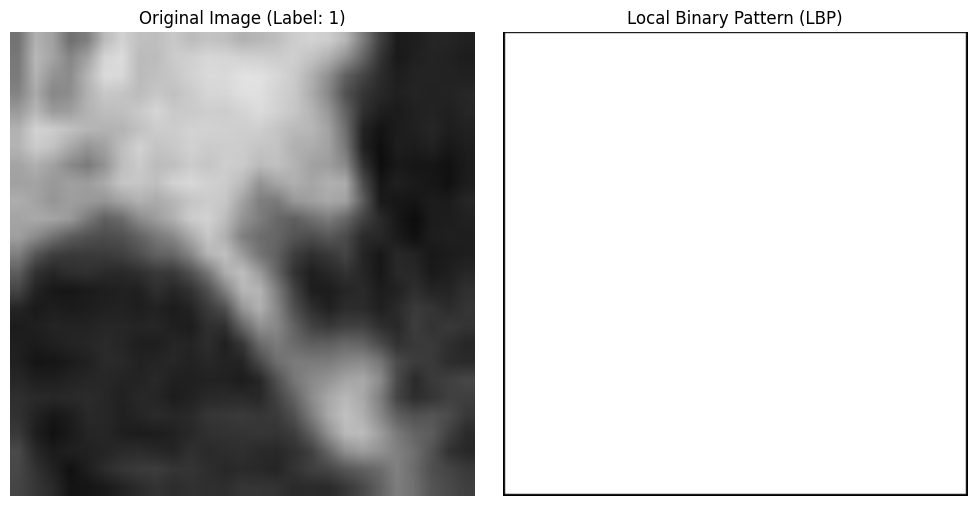

Flattened LBP Image: [0 0 0 ... 0 0 0]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms

# Function to compute LBP
def compute_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  # Initialize LBP image

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            lbp_code = 0
            
            # Define neighbor offsets
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]

            # Collect neighbor values and compute LBP code
            for k in range(8):
                neighbor_value = image[neighbors[k][0], neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    return lbp_image

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fit model input size
        transforms.ToTensor(),
    ])

    # Load dataset
    dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

    # Randomly select an image from the dataset
    random_index = random.randint(0, len(dataset) - 1)
    random_image, label = dataset[random_index]

    # Convert the image to numpy and grayscale
    image_np = random_image.numpy()
    image_np = np.transpose(image_np, (1, 2, 0))
    image_gray = np.mean(image_np, axis=2).astype(np.uint8)  # Convert to uint8 for LBP

    # Compute LBP
    lbp_image = compute_LBP(image_gray)

    # Flatten the LBP image
    lbp_flattened = lbp_image.flatten()

    # Display the original and LBP images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.axis('off')
    plt.title(f'Original Image (Label: {label})')

    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image, cmap='gray', vmin=0, vmax=255)  # Use gray colormap
    plt.axis('off')
    plt.title('Local Binary Pattern (LBP)')

    plt.tight_layout()
    plt.show()

    # Print the flattened LBP image for reference
    print("Flattened LBP Image:", lbp_flattened)


/tmp/ipykernel_30/765607550.py:46: RuntimeWarning: overflow encountered in scalar subtract
  if abs(neighbor_value - center_pixel) >= variance_value:


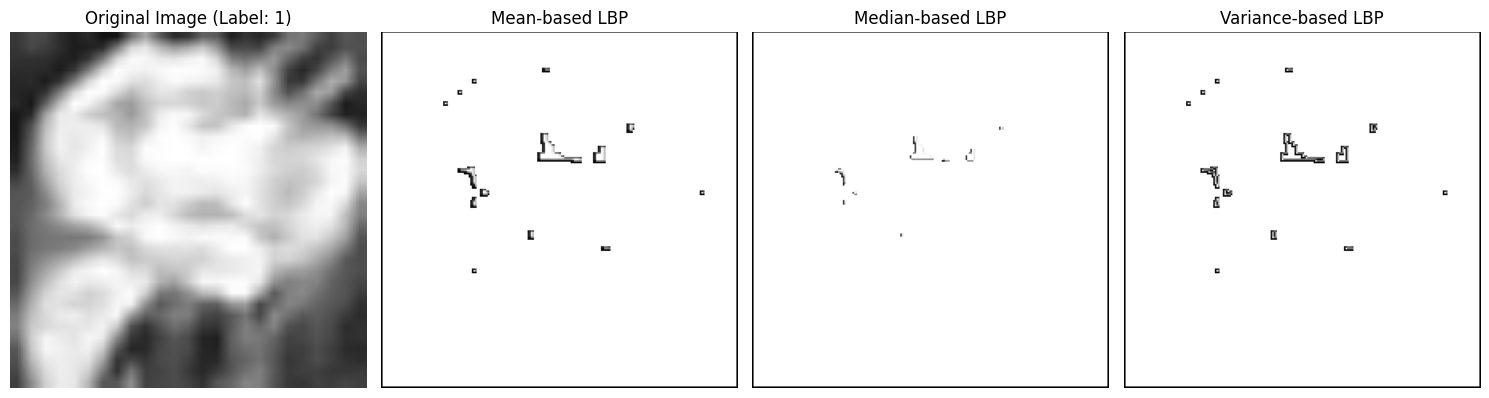

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms
from scipy import stats  # Importing stats for median calculation

# Function to compute Mean, Median, and Variance-based LBP
def compute_LBP_with_stats(image):
    height, width = image.shape
    lbp_mean = np.zeros((height, width), dtype=np.uint8)
    lbp_median = np.zeros((height, width), dtype=np.uint8)
    lbp_variance = np.zeros((height, width), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]

            # Define neighbor offsets inside the loop
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]
            
            # Collect neighbor values
            neighbor_values = [image[n[0], n[1]] for n in neighbors]
            
            # Calculate mean, median, and variance
            mean_value = np.mean(neighbor_values)
            median_value = np.median(neighbor_values)
            variance_value = np.var(neighbor_values)
            
            # Compute Mean-based LBP code
            for k, neighbor_value in enumerate(neighbor_values):
                if neighbor_value >= mean_value:
                    lbp_mean[i, j] |= (1 << k)  # Set the k-th bit if the neighbor is >= mean
            
            # Compute Median-based LBP code
            for k, neighbor_value in enumerate(neighbor_values):
                if neighbor_value >= median_value:
                    lbp_median[i, j] |= (1 << k)  # Set the k-th bit if the neighbor is >= median
            
            # Compute Variance-based LBP code
            for k, neighbor_value in enumerate(neighbor_values):
                if abs(neighbor_value - center_pixel) >= variance_value:
                    lbp_variance[i, j] |= (1 << k)  # Set the k-th bit if difference >= variance

    return lbp_mean, lbp_median, lbp_variance

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fit model input size
        transforms.ToTensor(),
    ])

    # Load dataset
    dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

    # Randomly select an image from the dataset
    random_index = random.randint(0, len(dataset) - 1)
    random_image, label = dataset[random_index]

    # Convert the image to numpy and grayscale
    image_np = random_image.numpy()
    image_np = np.transpose(image_np, (1, 2, 0))
    image_gray = np.mean(image_np, axis=2).astype(np.uint8)  # Convert to uint8 for LBP

    # Compute Mean, Median, and Variance-based LBP
    lbp_mean, lbp_median, lbp_variance = compute_LBP_with_stats(image_gray)
    
    # Display the original image and the computed LBPs
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 4, 1)
    plt.imshow(image_np)
    plt.axis('off')
    plt.title(f'Original Image (Label: {label})')

    plt.subplot(1, 4, 2)
    plt.imshow(lbp_mean, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('Mean-based LBP')

    plt.subplot(1, 4, 3)
    plt.imshow(lbp_median, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('Median-based LBP')

    plt.subplot(1, 4, 4)
    plt.imshow(lbp_variance, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('Variance-based LBP')

    plt.tight_layout()
    plt.show()


/tmp/ipykernel_30/2248896239.py:46: RuntimeWarning: overflow encountered in scalar subtract
  if abs(neighbor_value - center_pixel) >= variance_value:


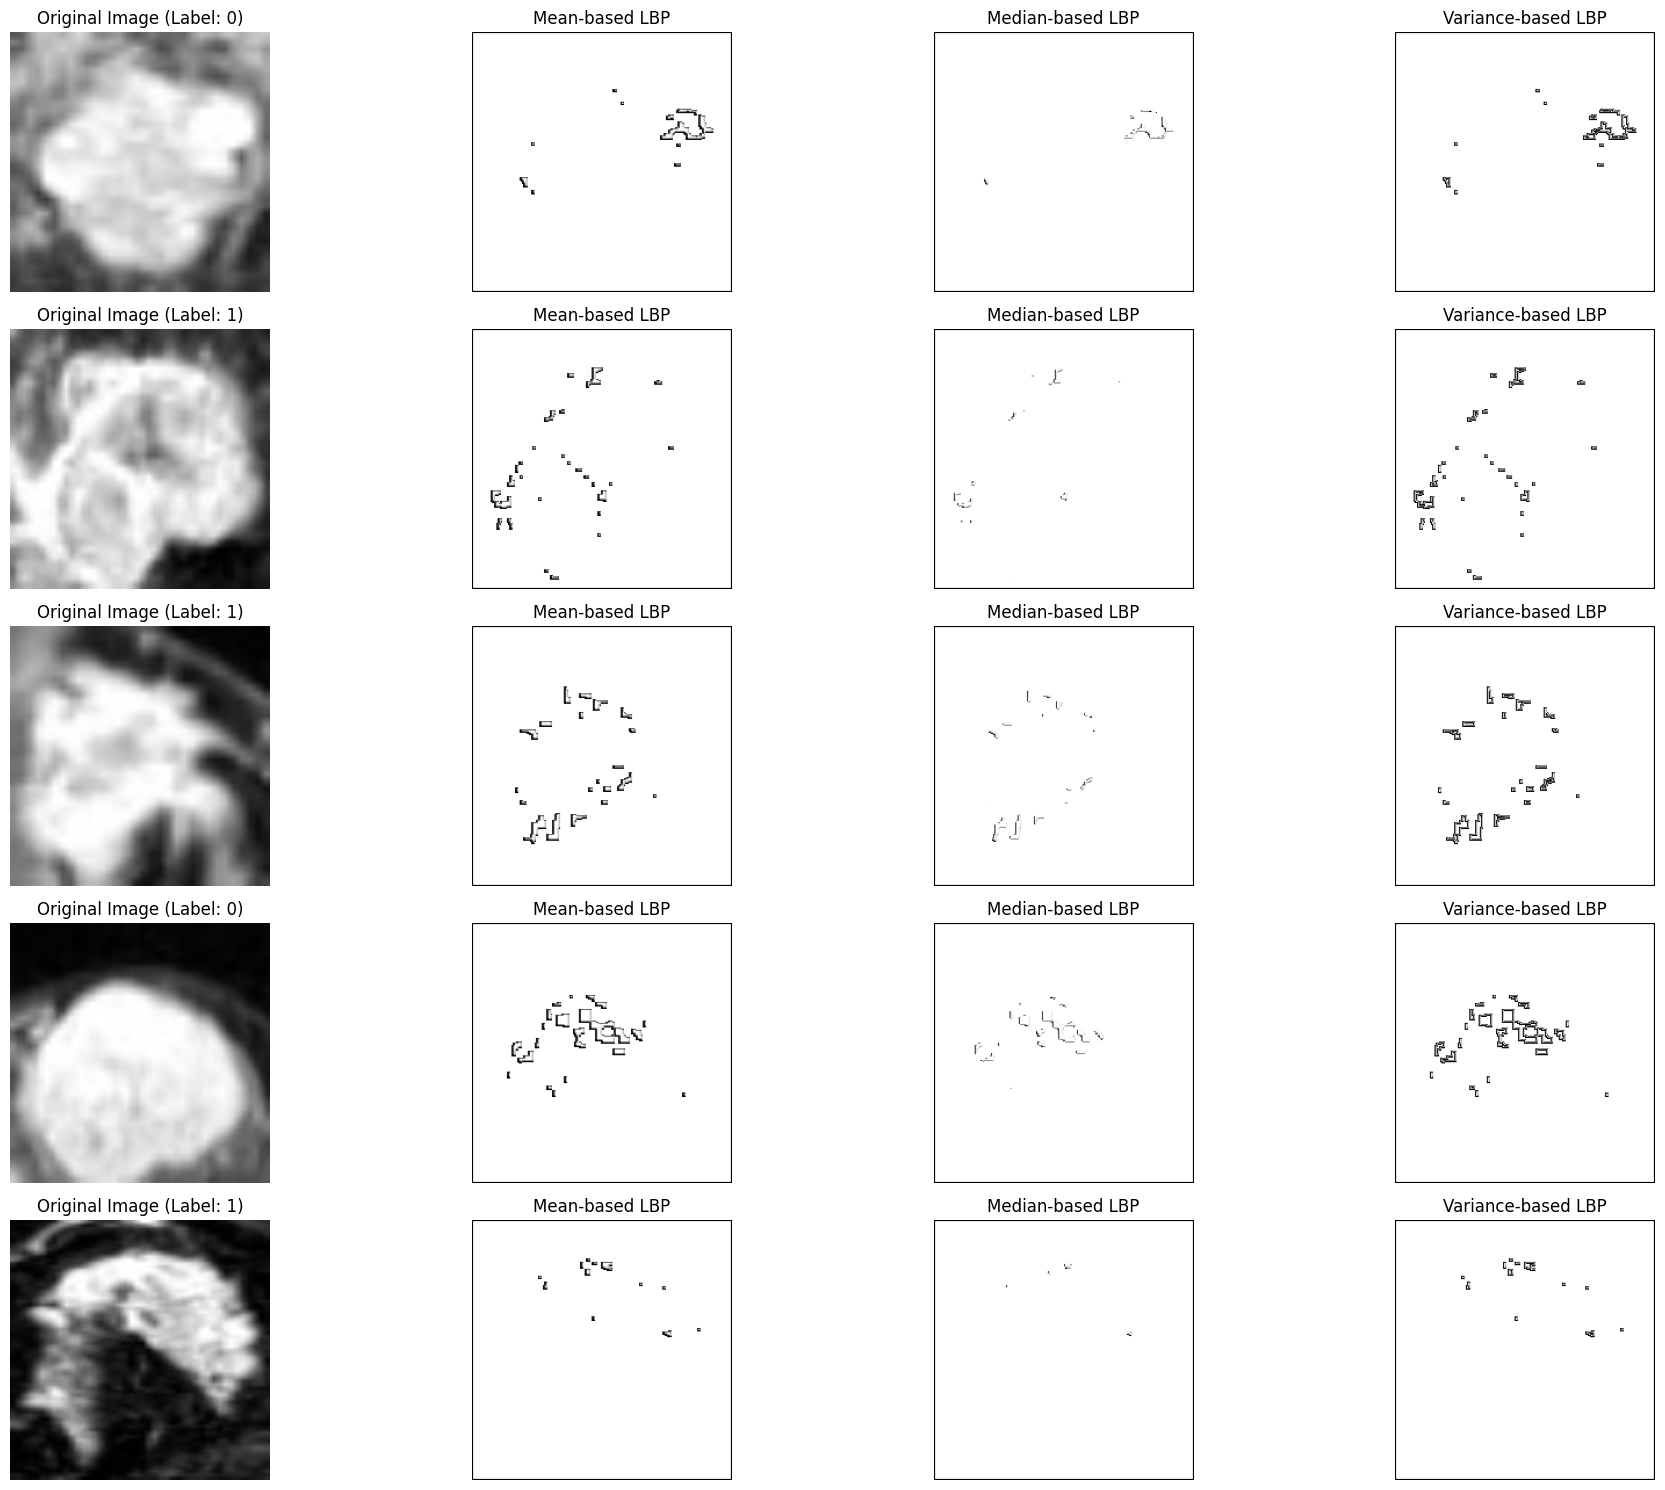

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms
from scipy import stats  # Importing stats for median calculation

# Function to compute Mean, Median, and Variance-based LBP
def compute_LBP_with_stats(image):
    height, width = image.shape
    lbp_mean = np.zeros((height, width), dtype=np.uint8)
    lbp_median = np.zeros((height, width), dtype=np.uint8)
    lbp_variance = np.zeros((height, width), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]

            # Define neighbor offsets inside the loop
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]
            
            # Collect neighbor values
            neighbor_values = [image[n[0], n[1]] for n in neighbors]
            
            # Calculate mean, median, and variance
            mean_value = np.mean(neighbor_values)
            median_value = np.median(neighbor_values)
            variance_value = np.var(neighbor_values)
            
            # Compute Mean-based LBP code
            for k, neighbor_value in enumerate(neighbor_values):
                if neighbor_value >= mean_value:
                    lbp_mean[i, j] |= (1 << k)  # Set the k-th bit if the neighbor is >= mean
            
            # Compute Median-based LBP code
            for k, neighbor_value in enumerate(neighbor_values):
                if neighbor_value >= median_value:
                    lbp_median[i, j] |= (1 << k)  # Set the k-th bit if the neighbor is >= median
            
            # Compute Variance-based LBP code
            for k, neighbor_value in enumerate(neighbor_values):
                if abs(neighbor_value - center_pixel) >= variance_value:
                    lbp_variance[i, j] |= (1 << k)  # Set the k-th bit if difference >= variance

    return lbp_mean, lbp_median, lbp_variance

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fit model input size
        transforms.ToTensor(),
    ])

    # Load dataset
    dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

    # Display LBP results for 5 random images
    plt.figure(figsize=(20, 15))

    for idx in range(5):
        # Randomly select an image from the dataset
        random_index = random.randint(0, len(dataset) - 1)
        random_image, label = dataset[random_index]

        # Convert the image to numpy and grayscale
        image_np = random_image.numpy()
        image_np = np.transpose(image_np, (1, 2, 0))
        image_gray = np.mean(image_np, axis=2).astype(np.uint8)  # Convert to uint8 for LBP

        # Compute Mean, Median, and Variance-based LBP
        lbp_mean, lbp_median, lbp_variance = compute_LBP_with_stats(image_gray)
        
        # Display the original image and the computed LBPs
        plt.subplot(5, 4, idx * 4 + 1)
        plt.imshow(image_np)
        plt.axis('off')
        plt.title(f'Original Image (Label: {label})')

        plt.subplot(5, 4, idx * 4 + 2)
        plt.imshow(lbp_mean, cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
        plt.title('Mean-based LBP')

        plt.subplot(5, 4, idx * 4 + 3)
        plt.imshow(lbp_median, cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
        plt.title('Median-based LBP')

        plt.subplot(5, 4, idx * 4 + 4)
        plt.imshow(lbp_variance, cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
        plt.title('Variance-based LBP')

    plt.tight_layout()
    plt.show()


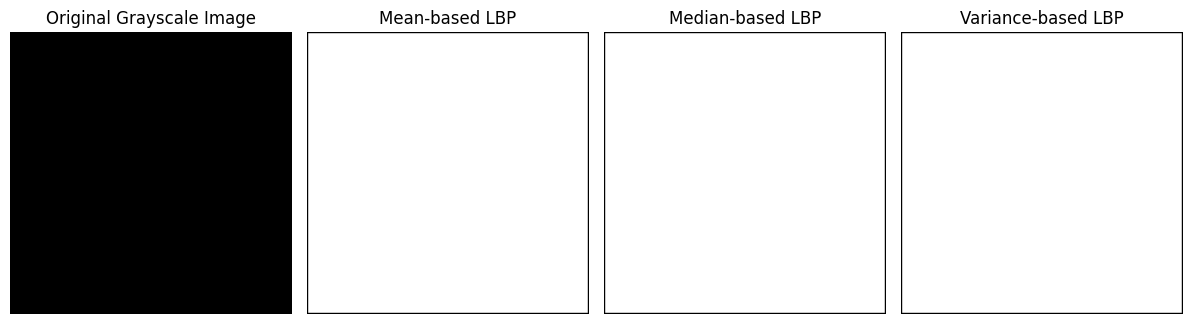

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms
from scipy import stats  # Importing stats for median calculation
import cv2  # Ensure cv2 is imported for normalization

# Function to compute Mean, Median, and Variance-based LBP
def compute_LBP_with_stats(image):
    height, width = image.shape
    lbp_mean = np.zeros((height, width), dtype=np.uint8)
    lbp_median = np.zeros((height, width), dtype=np.uint8)
    lbp_variance = np.zeros((height, width), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]

            # Define neighbor offsets inside the loop
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]
            
            # Collect neighbor values
            neighbor_values = [image[n[0], n[1]] for n in neighbors]
            
            # Calculate mean, median, and variance
            mean_value = np.mean(neighbor_values)
            median_value = np.median(neighbor_values)
            variance_value = np.var(neighbor_values)
            
            # Compute Mean-based LBP code
            for k, neighbor_value in enumerate(neighbor_values):
                if neighbor_value >= mean_value:
                    lbp_mean[i, j] |= (1 << k)  # Set the k-th bit if the neighbor is >= mean
            
            # Compute Median-based LBP code
            for k, neighbor_value in enumerate(neighbor_values):
                if neighbor_value >= median_value:
                    lbp_median[i, j] |= (1 << k)  # Set the k-th bit if the neighbor is >= median
            
            # Compute Variance-based LBP code
            for k, neighbor_value in enumerate(neighbor_values):
                if abs(neighbor_value - center_pixel) >= variance_value:
                    lbp_variance[i, j] |= (1 << k)  # Set the k-th bit if difference >= variance

    # Normalize the LBP images to 0-255 for visualization
    lbp_mean = cv2.normalize(lbp_mean, None, 0, 255, cv2.NORM_MINMAX)
    lbp_median = cv2.normalize(lbp_median, None, 0, 255, cv2.NORM_MINMAX)
    lbp_variance = cv2.normalize(lbp_variance, None, 0, 255, cv2.NORM_MINMAX)

    return lbp_mean, lbp_median, lbp_variance

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fit model input size
        transforms.ToTensor(),
    ])
    # Load dataset
    dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

    # Randomly select an image from the dataset
    random_index = random.randint(0, len(dataset) - 1)
    random_image, label = dataset[random_index]

    # Convert the image to numpy and grayscale
    image_np = random_image.numpy()
    image_np = np.transpose(image_np, (1, 2, 0))
    image_gray = np.mean(image_np, axis=2).astype(np.uint8)  # Convert to uint8 for LBP

    # Compute Mean, Median, and Variance-based LBP
    lbp_mean, lbp_median, lbp_variance = compute_LBP_with_stats(image_gray)
    
    # Display the original grayscale and computed LBPs
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 5, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.axis('off')
    plt.title('Original Grayscale Image')

    plt.subplot(1, 5, 2)
    plt.imshow(lbp_mean, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('Mean-based LBP')

    plt.subplot(1, 5, 3)
    plt.imshow(lbp_median, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('Median-based LBP')

    plt.subplot(1, 5, 4)
    plt.imshow(lbp_variance, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('Variance-based LBP')

    plt.tight_layout()
    plt.show()


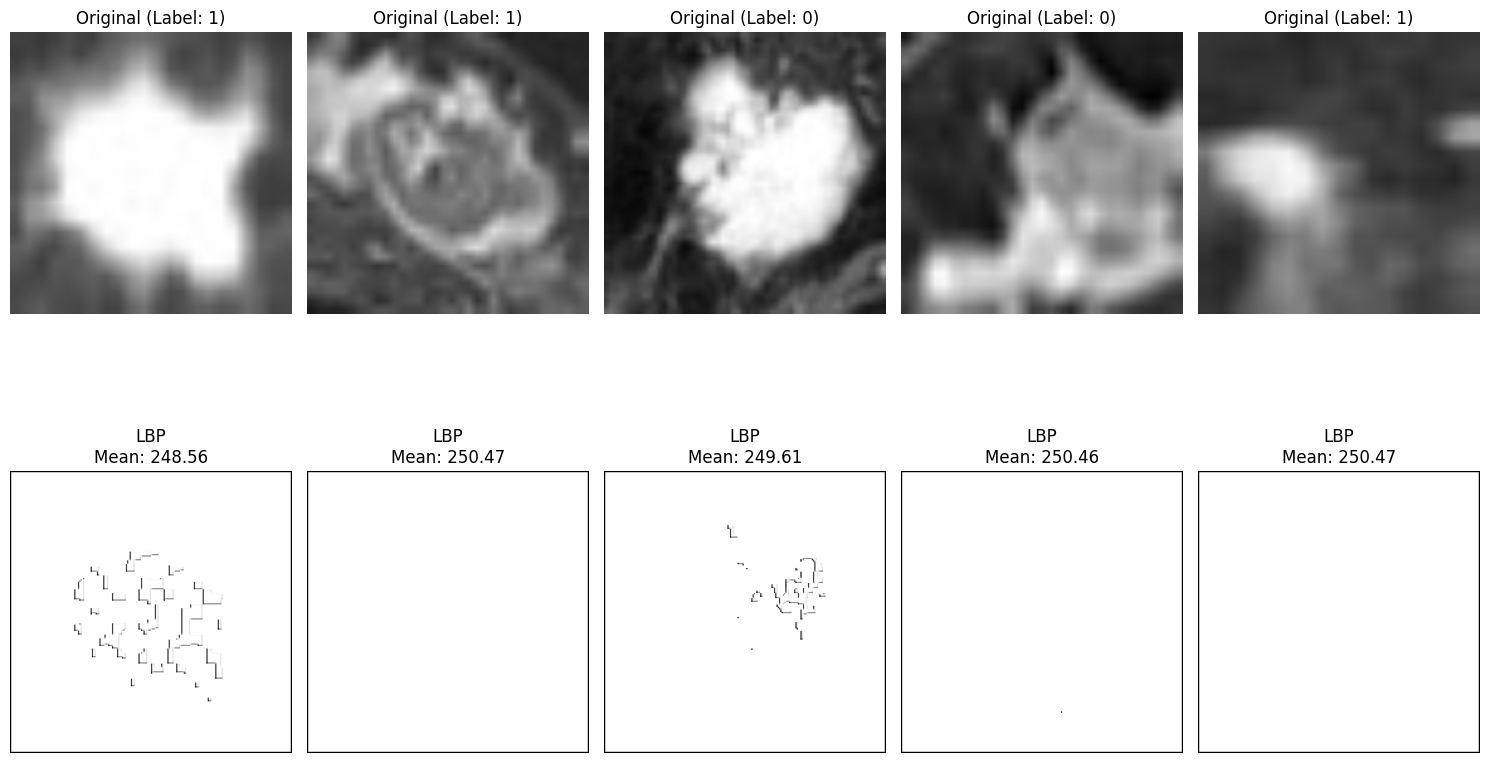

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms
from PIL import Image

# Function to compute LBP and return the mean binary points
def compute_mean_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  # Initialize LBP image

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            lbp_code = 0
            
            # Define neighbor offsets
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]

            # Collect neighbor values and compute LBP code
            for k in range(8):
                neighbor_value = image[neighbors[k][0], neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    # Calculate and return the mean binary points of the LBP image
    mean_lbp = np.mean(lbp_image)
    return lbp_image, mean_lbp

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fit model input size
        transforms.ToTensor(),
    ])

    # Load dataset
    dataset = datasets.ImageFolder(root_dir, transform=transform)

    # Randomly select five images from the dataset
    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    # Plotting the selected images with their LBP counterparts
    plt.figure(figsize=(15, 10))

    for i, (img, label) in enumerate(selected_images, start=1):
        # Convert to numpy and grayscale
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  # Convert to H x W x C format
        img_gray = np.mean(img_np, axis=2).astype(np.uint8)  # Convert to grayscale

        # Compute LBP for the grayscale image and calculate the mean LBP
        lbp_image, mean_lbp = compute_mean_LBP(img_gray)

        # Display the original image
        plt.subplot(2, 5, i)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        # Display the LBP image
        plt.subplot(2, 5, i + 5)
        plt.imshow(lbp_image, cmap='gray')
        plt.axis('off')
        plt.title(f'LBP\nMean: {mean_lbp:.2f}')

    plt.tight_layout()
    plt.show()


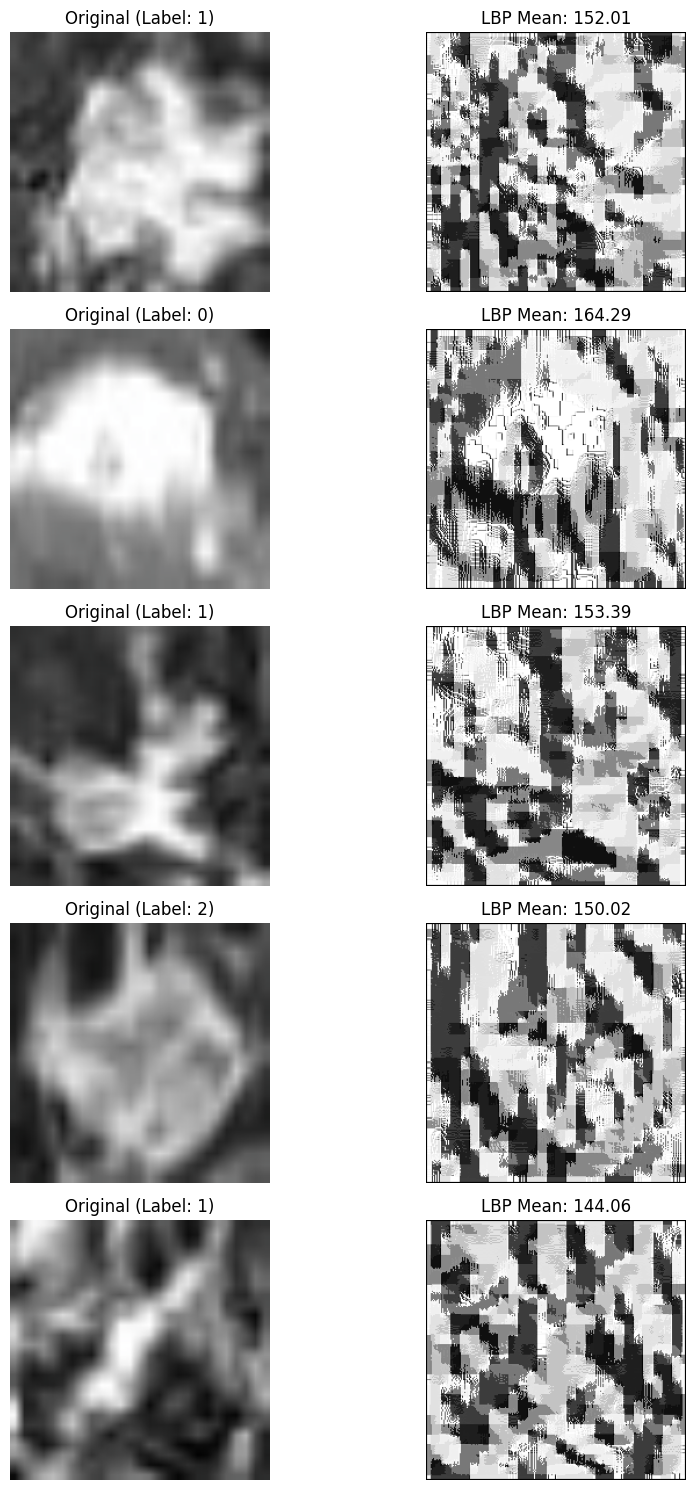

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms
from PIL import Image

# Function to compute LBP and return the mean binary points
def compute_mean_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  # Initialize LBP image

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            lbp_code = 0
            
            # Define neighbor offsets
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]

            # Collect neighbor values and compute LBP code
            for k in range(8):
                neighbor_value = image[neighbors[k][0], neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    # Calculate and return the mean binary points of the LBP image
    mean_lbp = np.mean(lbp_image)
    return lbp_image, mean_lbp

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation with resizing and normalization
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to 224x224
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize (ImageNet values)
    ])

    # Load dataset
    dataset = datasets.ImageFolder(root_dir, transform=transform)

    # Randomly select five images from the dataset
    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    # Plotting the selected images with their LBP counterparts in a horizontal layout
    plt.figure(figsize=(10, 15))

    for i, (img, label) in enumerate(selected_images, start=1):
        # Convert tensor to numpy array for visualization
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  # Convert to H x W x C format

        # Undo normalization for visualization (optional)
        img_np = img_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img_np = np.clip(img_np, 0, 1)  # Clip to [0, 1] range for display

        # Convert to grayscale for LBP computation
        img_gray = (np.mean(img_np, axis=2) * 255).astype(np.uint8)  # Scale back to uint8

        # Compute LBP for the grayscale image and calculate the mean LBP
        lbp_image, mean_lbp = compute_mean_LBP(img_gray)

        # Display the original image
        plt.subplot(5, 2, 2 * i - 1)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        # Display the LBP image
        plt.subplot(5, 2, 2 * i)
        plt.imshow(lbp_image, cmap='gray')
        plt.axis('off')
        plt.title(f'LBP Mean: {mean_lbp:.2f}')

    plt.tight_layout()
    plt.show()


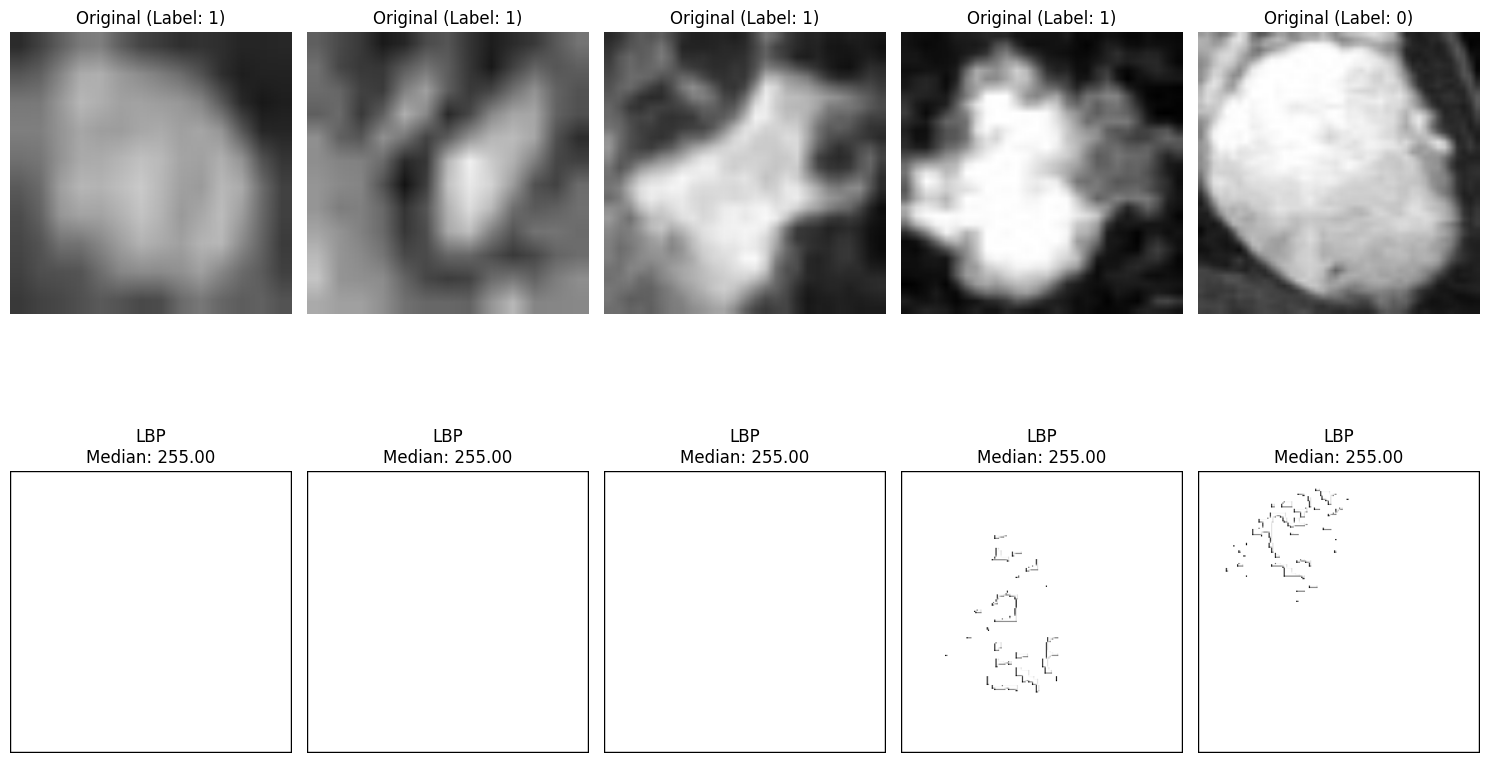

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms
from PIL import Image

# Function to compute LBP and return the median binary points
def compute_median_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  # Initialize LBP image

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            lbp_code = 0
            
            # Define neighbor offsets
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]

            # Collect neighbor values and compute LBP code
            for k in range(8):
                neighbor_value = image[neighbors[k][0], neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    # Calculate and return the median binary points of the LBP image
    median_lbp = np.median(lbp_image)
    return lbp_image, median_lbp

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fit model input size
        transforms.ToTensor(),
    ])

    # Load dataset
    dataset = datasets.ImageFolder(root_dir, transform=transform)

    # Randomly select five images from the dataset
    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    # Plotting the selected images with their LBP counterparts
    plt.figure(figsize=(15, 10))

    for i, (img, label) in enumerate(selected_images, start=1):
        # Convert to numpy and grayscale
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  # Convert to H x W x C format
        img_gray = np.mean(img_np, axis=2).astype(np.uint8)  # Convert to grayscale

        # Compute LBP for the grayscale image and calculate the median LBP
        lbp_image, median_lbp = compute_median_LBP(img_gray)

        # Display the original image
        plt.subplot(2, 5, i)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        # Display the LBP image
        plt.subplot(2, 5, i + 5)
        plt.imshow(lbp_image, cmap='gray')
        plt.axis('off')
        plt.title(f'LBP\nMedian: {median_lbp:.2f}')

    plt.tight_layout()
    plt.show()


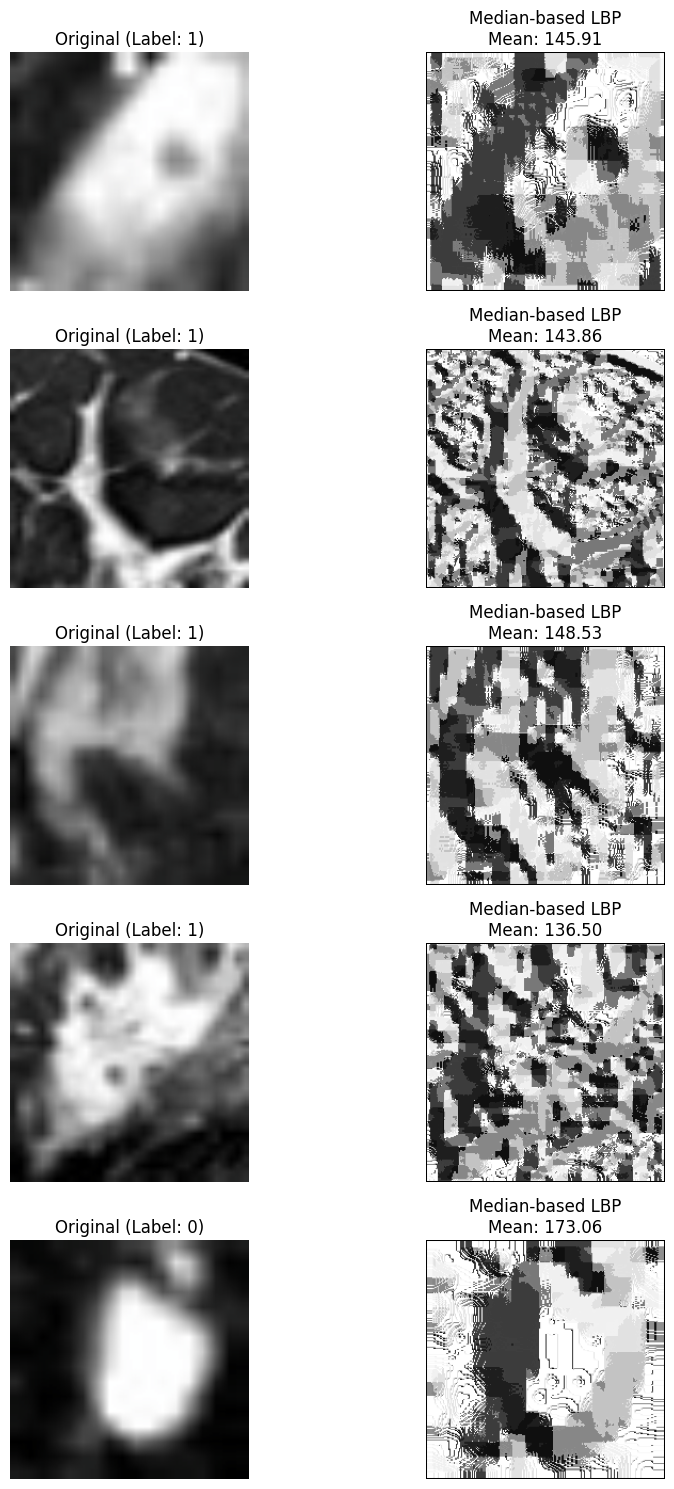

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms
from PIL import Image

# Function to compute Median-based LBP
def compute_median_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  # Initialize LBP image

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Define the 3x3 neighborhood
            neighbors = [
                image[i - 1, j - 1], image[i - 1, j], image[i - 1, j + 1],
                image[i, j + 1], image[i + 1, j + 1], image[i + 1, j],
                image[i + 1, j - 1], image[i, j - 1]
            ]

            # Compute the median of the neighbors
            median_value = np.median(neighbors)
            
            # Initialize the LBP code
            lbp_code = 0
            for k, neighbor_value in enumerate(neighbors):
                if neighbor_value >= median_value:
                    lbp_code |= (1 << k)  # Set the k-th bit if neighbor >= median
            
            lbp_image[i, j] = lbp_code  # Assign the median-based LBP code

    # Calculate and return the mean of the median-based LBP image
    mean_lbp = np.mean(lbp_image)
    return lbp_image, mean_lbp

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation with resizing and normalization
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to 224x224
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize (ImageNet values)
    ])

    # Load dataset
    dataset = datasets.ImageFolder(root_dir, transform=transform)

    # Randomly select five images from the dataset
    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    # Plotting the selected images with their LBP counterparts in a horizontal layout
    plt.figure(figsize=(10, 15))

    for i, (img, label) in enumerate(selected_images, start=1):
        # Convert tensor to numpy array for visualization
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  # Convert to H x W x C format

        # Undo normalization for visualization (optional)
        img_np = img_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img_np = np.clip(img_np, 0, 1)  # Clip to [0, 1] range for display

        # Convert to grayscale for LBP computation
        img_gray = (np.mean(img_np, axis=2) * 255).astype(np.uint8)  # Scale back to uint8

        # Compute Median-based LBP for the grayscale image and calculate the mean LBP
        lbp_image, mean_lbp = compute_median_LBP(img_gray)

        # Display the original image
        plt.subplot(5, 2, 2 * i - 1)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        # Display the LBP image
        plt.subplot(5, 2, 2 * i)
        plt.imshow(lbp_image, cmap='gray')
        plt.axis('off')
        plt.title(f'Median-based LBP\nMean: {mean_lbp:.2f}')

    plt.tight_layout()
    plt.show()


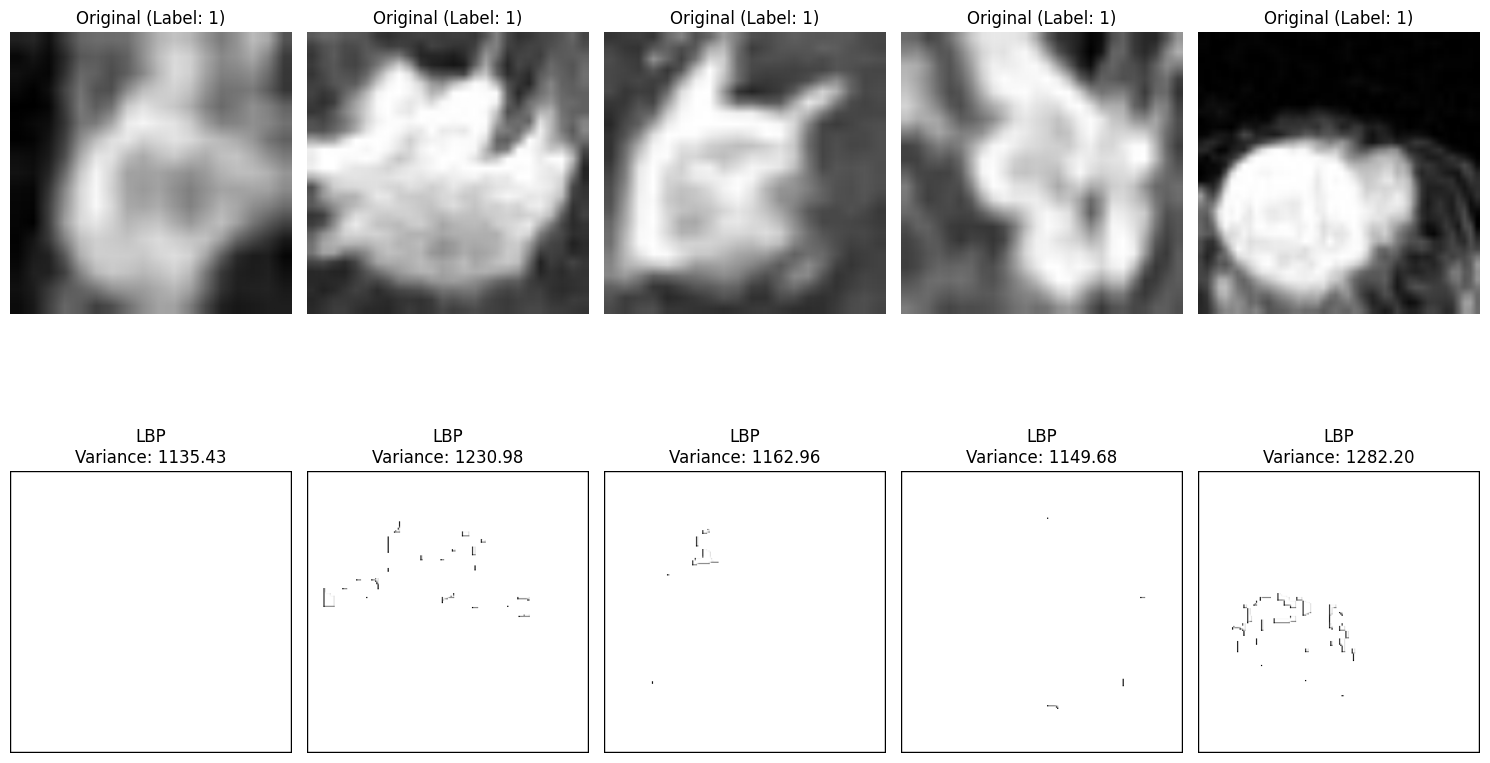

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms
from PIL import Image

# Function to compute LBP and return the variance of binary points
def compute_variance_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  # Initialize LBP image

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            lbp_code = 0
            
            # Define neighbor offsets
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]

            # Collect neighbor values and compute LBP code
            for k in range(8):
                neighbor_value = image[neighbors[k][0], neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    # Calculate and return the variance of the LBP image
    variance_lbp = np.var(lbp_image)
    return lbp_image, variance_lbp

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fit model input size
        transforms.ToTensor(),
    ])

    # Load dataset
    dataset = datasets.ImageFolder(root_dir, transform=transform)

    # Randomly select five images from the dataset
    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    # Plotting the selected images with their LBP counterparts
    plt.figure(figsize=(15, 10))

    for i, (img, label) in enumerate(selected_images, start=1):
        # Convert to numpy and grayscale
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  # Convert to H x W x C format
        img_gray = np.mean(img_np, axis=2).astype(np.uint8)  # Convert to grayscale

        # Compute LBP for the grayscale image and calculate the variance LBP
        lbp_image, variance_lbp = compute_variance_LBP(img_gray)

        # Display the original image
        plt.subplot(2, 5, i)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        # Display the LBP image
        plt.subplot(2, 5, i + 5)
        plt.imshow(lbp_image, cmap='gray')
        plt.axis('off')
        plt.title(f'LBP\nVariance: {variance_lbp:.2f}')

    plt.tight_layout()
    plt.show()


/tmp/ipykernel_30/4077725244.py:30: RuntimeWarning: overflow encountered in scalar subtract
  if abs(neighbor_value - center_pixel) >= variance_value:


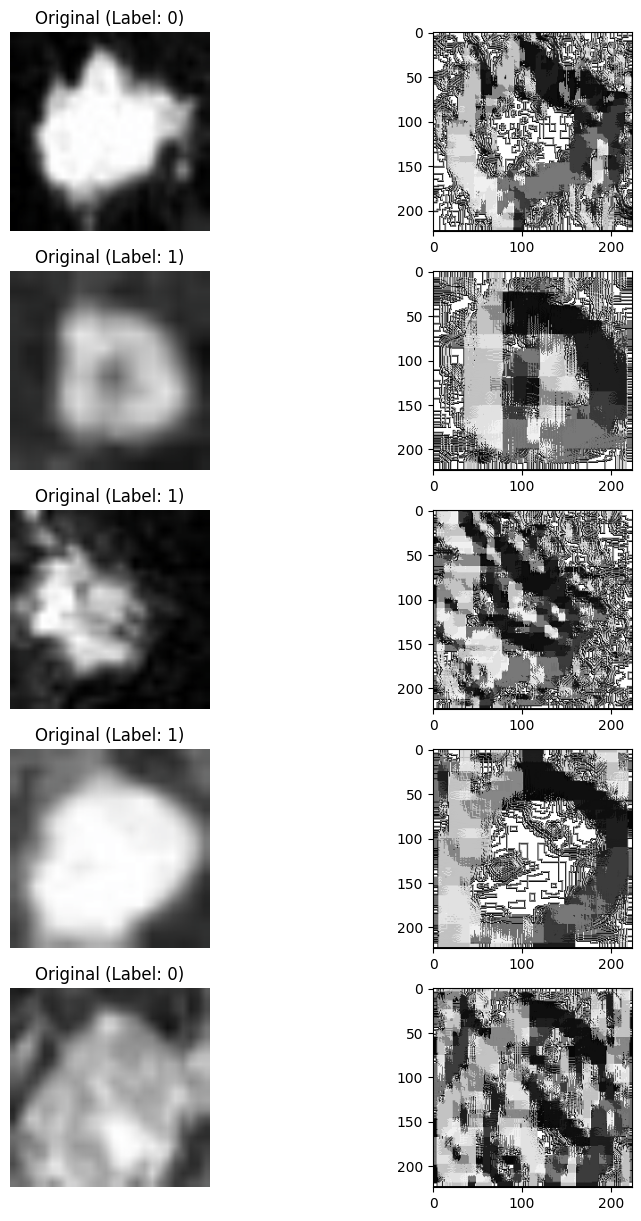

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms
from PIL import Image

# Function to compute Variance-based LBP
def compute_variance_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  # Initialize LBP image

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            
            # Define the 3x3 neighborhood
            neighbors = [
                image[i - 1, j - 1], image[i - 1, j], image[i - 1, j + 1],
                image[i, j + 1], image[i + 1, j + 1], image[i + 1, j],
                image[i + 1, j - 1], image[i, j - 1]
            ]
            
            # Calculate variance of the neighbors
            variance_value = np.var(neighbors)

            # Initialize the LBP code
            lbp_code = 0
            for k, neighbor_value in enumerate(neighbors):
                if abs(neighbor_value - center_pixel) >= variance_value:
                    lbp_code |= (1 << k)  # Set the k-th bit if abs difference >= variance
            
            lbp_image[i, j] = lbp_code  # Assign the variance-based LBP code

    # Calculate and return the mean of the variance-based LBP image
    mean_lbp = np.mean(lbp_image)
    return lbp_image, mean_lbp

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation with resizing and normalization
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to 224x224
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize (ImageNet values)
    ])

    # Load dataset
    dataset = datasets.ImageFolder(root_dir, transform=transform)

    # Randomly select five images from the dataset
    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    # Plotting the selected images with their LBP counterparts in a horizontal layout
    plt.figure(figsize=(10, 15))

    for i, (img, label) in enumerate(selected_images, start=1):
        # Convert tensor to numpy array for visualization
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  # Convert to H x W x C format

        # Undo normalization for visualization (optional)
        img_np = img_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img_np = np.clip(img_np, 0, 1)  # Clip to [0, 1] range for display

        # Convert to grayscale for LBP computation
        img_gray = (np.mean(img_np, axis=2) * 255).astype(np.uint8)  # Scale back to uint8

        # Compute Variance-based LBP for the grayscale image and calculate the mean LBP
        lbp_image, mean_lbp = compute_variance_LBP(img_gray)

        # Display the original image
        plt.subplot(5, 2, 2 * i - 1)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        # Display the LBP image
        plt.subplot(5, 2, 2 * i)
        plt.imshow(lbp_image, cmap='gray')


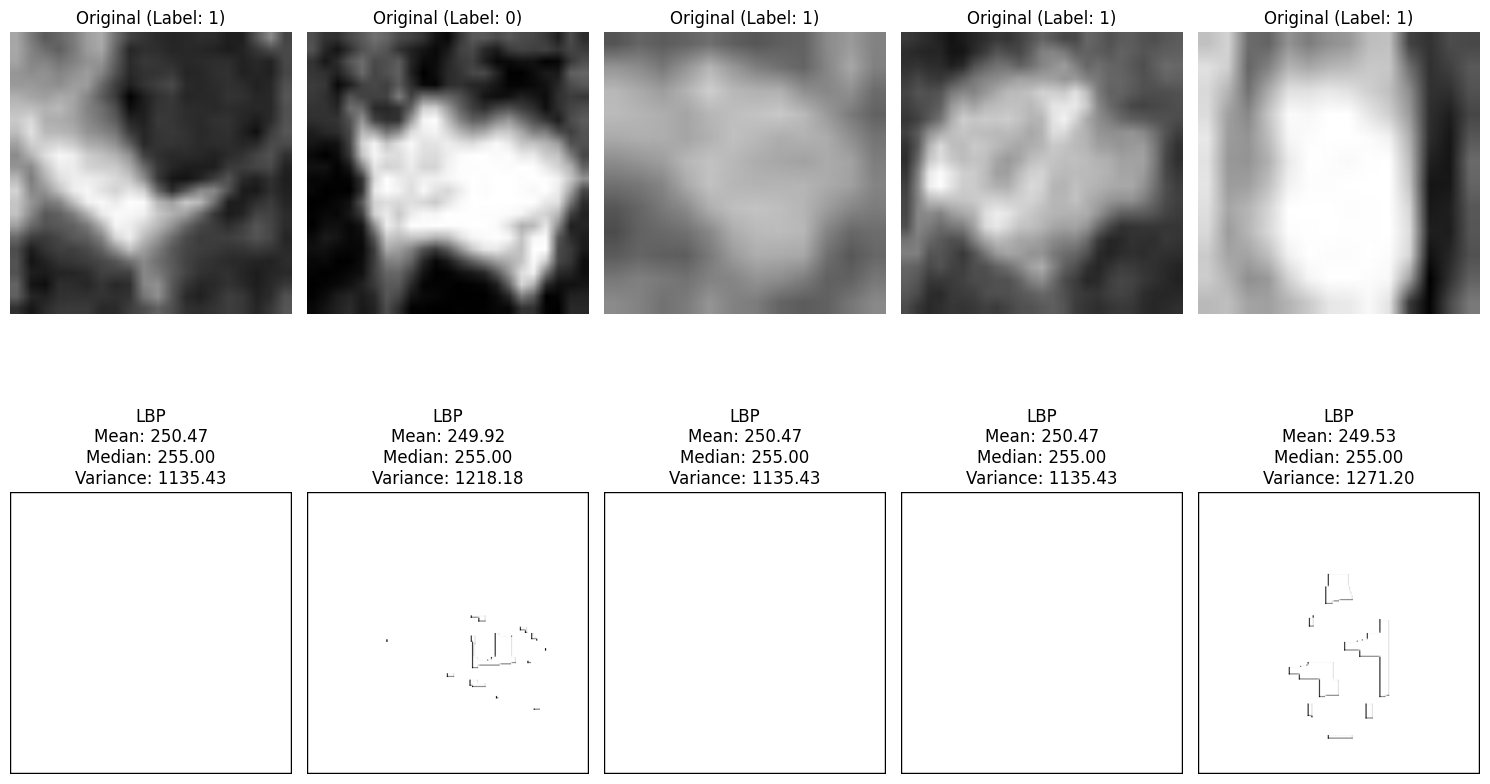

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms
from PIL import Image

# Function to compute LBP and return the mean, median, and variance of binary points
def compute_LBP_statistics(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  # Initialize LBP image

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            lbp_code = 0
            
            # Define neighbor offsets
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]

            # Collect neighbor values and compute LBP code
            for k in range(8):
                neighbor_value = image[neighbors[k][0], neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    # Calculate mean, median, and variance of the LBP image
    mean_lbp = np.mean(lbp_image)
    median_lbp = np.median(lbp_image)
    variance_lbp = np.var(lbp_image)
    return lbp_image, mean_lbp, median_lbp, variance_lbp

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fit model input size
        transforms.ToTensor(),
    ])

    # Load dataset
    dataset = datasets.ImageFolder(root_dir, transform=transform)

    # Randomly select five images from the dataset
    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    # Plotting the selected images with their LBP statistics
    plt.figure(figsize=(15, 10))

    for i, (img, label) in enumerate(selected_images, start=1):
        # Convert to numpy and grayscale
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  # Convert to H x W x C format
        img_gray = np.mean(img_np, axis=2).astype(np.uint8)  # Convert to grayscale

        # Compute LBP for the grayscale image and calculate the mean, median, and variance
        lbp_image, mean_lbp, median_lbp, variance_lbp = compute_LBP_statistics(img_gray)

        # Display the original image
        plt.subplot(2, 5, i)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        # Display the LBP image
        plt.subplot(2, 5, i + 5)
        plt.imshow(lbp_image, cmap='gray')
        plt.axis('off')
        plt.title(f'LBP\nMean: {mean_lbp:.2f}\nMedian: {median_lbp:.2f}\nVariance: {variance_lbp:.2f}')

    plt.tight_layout()
    plt.show()


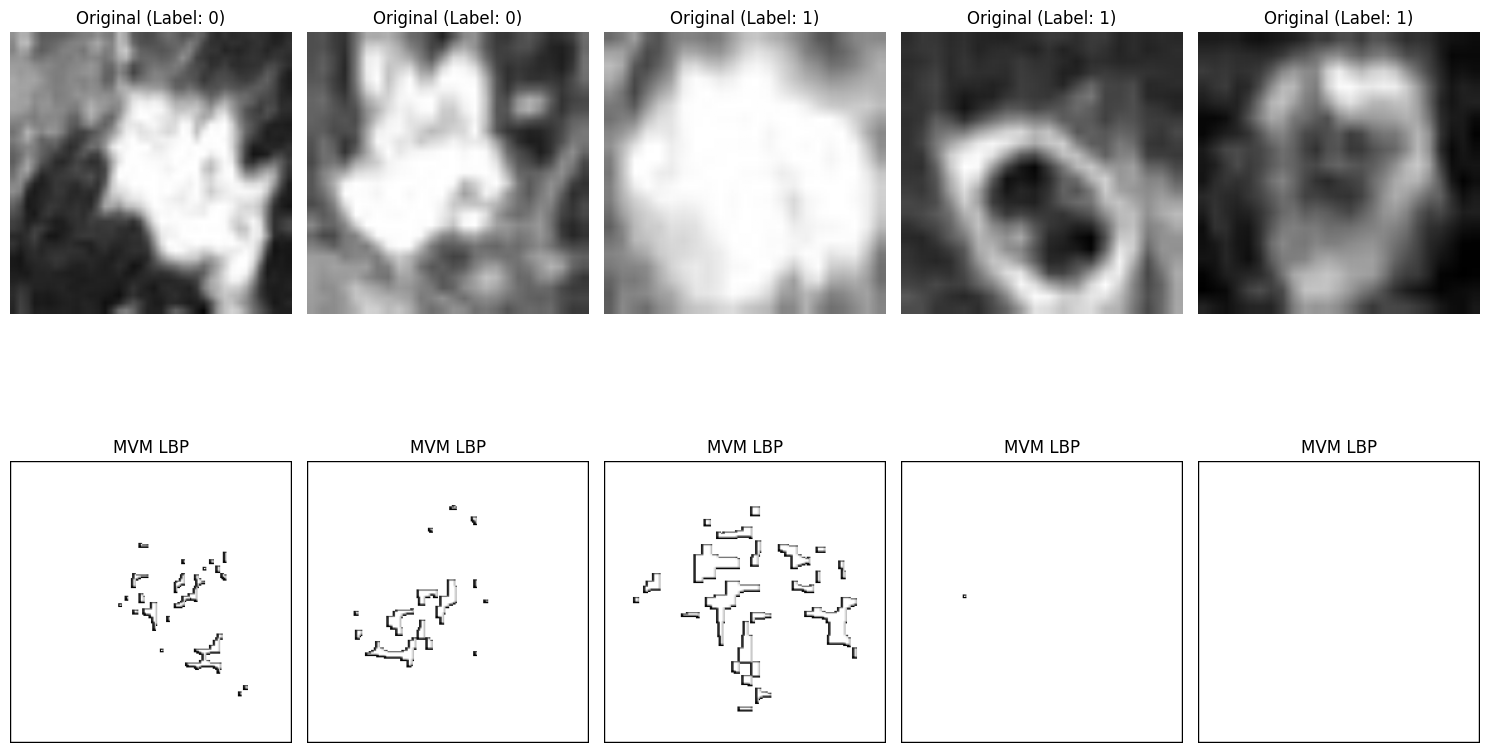

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random
from torchvision import datasets, transforms

# Function to compute LBP using Mean and Variance
def compute_MVM_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  # Initialize LBP image

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            
            # Define neighbor offsets
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]
            
            # Collect neighbor values
            neighbor_values = np.array([image[ni, nj] for ni, nj in neighbors])
            mean = np.mean(neighbor_values)
            variance = np.var(neighbor_values)

            lbp_code = 0
            # Generate LBP code based on mean and variance
            for k, (ni, nj) in enumerate(neighbors):
                if image[ni, nj] >= mean:  # You can adjust the threshold condition
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    return lbp_image

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fit model input size
        transforms.ToTensor(),
    ])

    # Load dataset
    dataset = datasets.ImageFolder(root_dir, transform=transform)

    # Randomly select five images from the dataset
    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    # Plotting the selected images with their LBP counterparts
    plt.figure(figsize=(15, 10))

    for i, (img, label) in enumerate(selected_images, start=1):
        # Convert to numpy and grayscale
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  # Convert to H x W x C format
        img_gray = np.mean(img_np, axis=2).astype(np.uint8)  # Convert to grayscale

        # Compute LBP for the grayscale image using MVM
        lbp_image = compute_MVM_LBP(img_gray)

        # Display the original image
        plt.subplot(2, 5, i)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        # Display the LBP image
        plt.subplot(2, 5, i + 5)
        plt.imshow(lbp_image, cmap='gray')
        plt.axis('off')
        plt.title('MVM LBP')

    plt.tight_layout()
    plt.show()


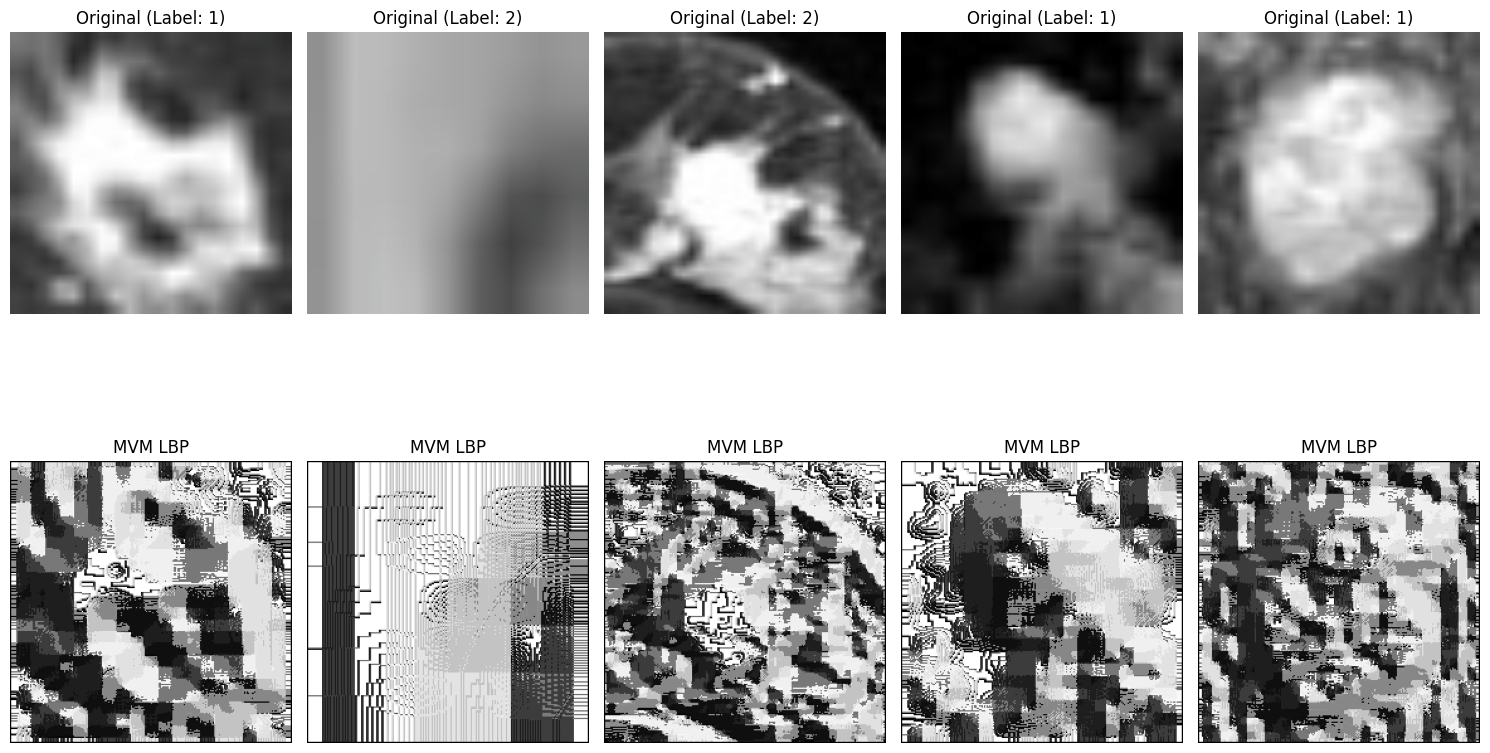

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import random
from torchvision import datasets, transforms

# Function to compute LBP using Mean and Variance
def compute_MVM_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  # Initialize LBP image

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            
            # Define neighbor offsets
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]
            
            # Collect neighbor values
            neighbor_values = np.array([image[ni, nj] for ni, nj in neighbors])
            mean = np.mean(neighbor_values)
            variance = np.var(neighbor_values)

            lbp_code = 0
            # Generate LBP code based on mean and variance
            for k, (ni, nj) in enumerate(neighbors):
                if image[ni, nj] >= mean:  # You can adjust the threshold condition
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    return lbp_image

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation with resizing and normalization
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to 224x224
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet values
    ])

    # Load dataset
    dataset = datasets.ImageFolder(root_dir, transform=transform)

    # Randomly select five images from the dataset
    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    # Plotting the selected images with their LBP counterparts
    plt.figure(figsize=(15, 10))

    for i, (img, label) in enumerate(selected_images, start=1):
        # Convert tensor to numpy array for visualization
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  # Convert to H x W x C format

        # Undo normalization for visualization
        img_np = img_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img_np = np.clip(img_np, 0, 1)  # Clip to [0, 1] range for display

        # Convert to grayscale for LBP computation
        img_gray = (np.mean(img_np, axis=2) * 255).astype(np.uint8)  # Scale back to uint8

        # Compute LBP for the grayscale image using MVM
        lbp_image = compute_MVM_LBP(img_gray)

        # Display the original image
        plt.subplot(2, 5, i)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        # Display the LBP image
        plt.subplot(2, 5, i + 5)
        plt.imshow(lbp_image, cmap='gray')
        plt.axis('off')
        plt.title('MVM LBP')

    plt.tight_layout()
    plt.show()


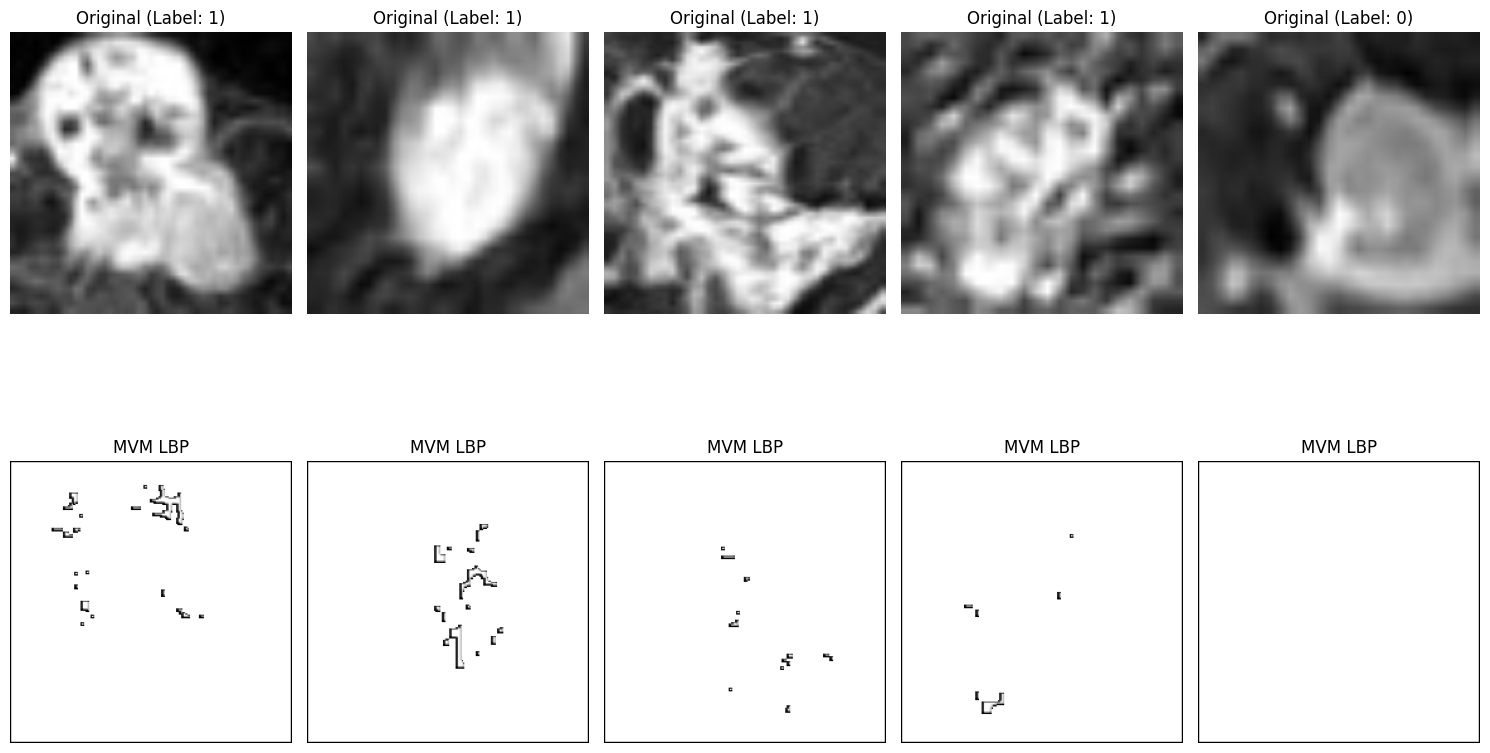

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import random
from torchvision import datasets, transforms

# Function to compute LBP using Mean and Variance
def compute_MVM_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  # Initialize LBP image

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            
            # Define neighbor offsets
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]
            
            # Collect neighbor values
            neighbor_values = np.array([image[ni, nj] for ni, nj in neighbors])
            mean = np.mean(neighbor_values)
            variance = np.var(neighbor_values)

            lbp_code = 0
            # Generate LBP code based on mean
            for k, (ni, nj) in enumerate(neighbors):
                if image[ni, nj] >= mean:  # Compare to the mean
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    return lbp_image

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'  # Adjust path as needed

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fit model input size
        transforms.ToTensor(),
    ])

    # Load dataset
    dataset = datasets.ImageFolder(root_dir, transform=transform)

    # Randomly select five images from the dataset
    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    # Plotting the selected images with their LBP counterparts
    plt.figure(figsize=(15, 10))

    for i, (img, label) in enumerate(selected_images, start=1):
        # Convert to numpy and grayscale
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  # Convert to H x W x C format
        img_gray = np.mean(img_np, axis=2).astype(np.uint8)  # Convert to grayscale

        # Compute LBP for the grayscale image using MVM
        lbp_image = compute_MVM_LBP(img_gray)

        # Display the original image
        plt.subplot(2, 5, i)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        # Display the LBP image
        plt.subplot(2, 5, i + 5)
        plt.imshow(lbp_image, cmap='gray')
        plt.axis('off')
        plt.title('MVM LBP')

    plt.tight_layout()
    plt.show()


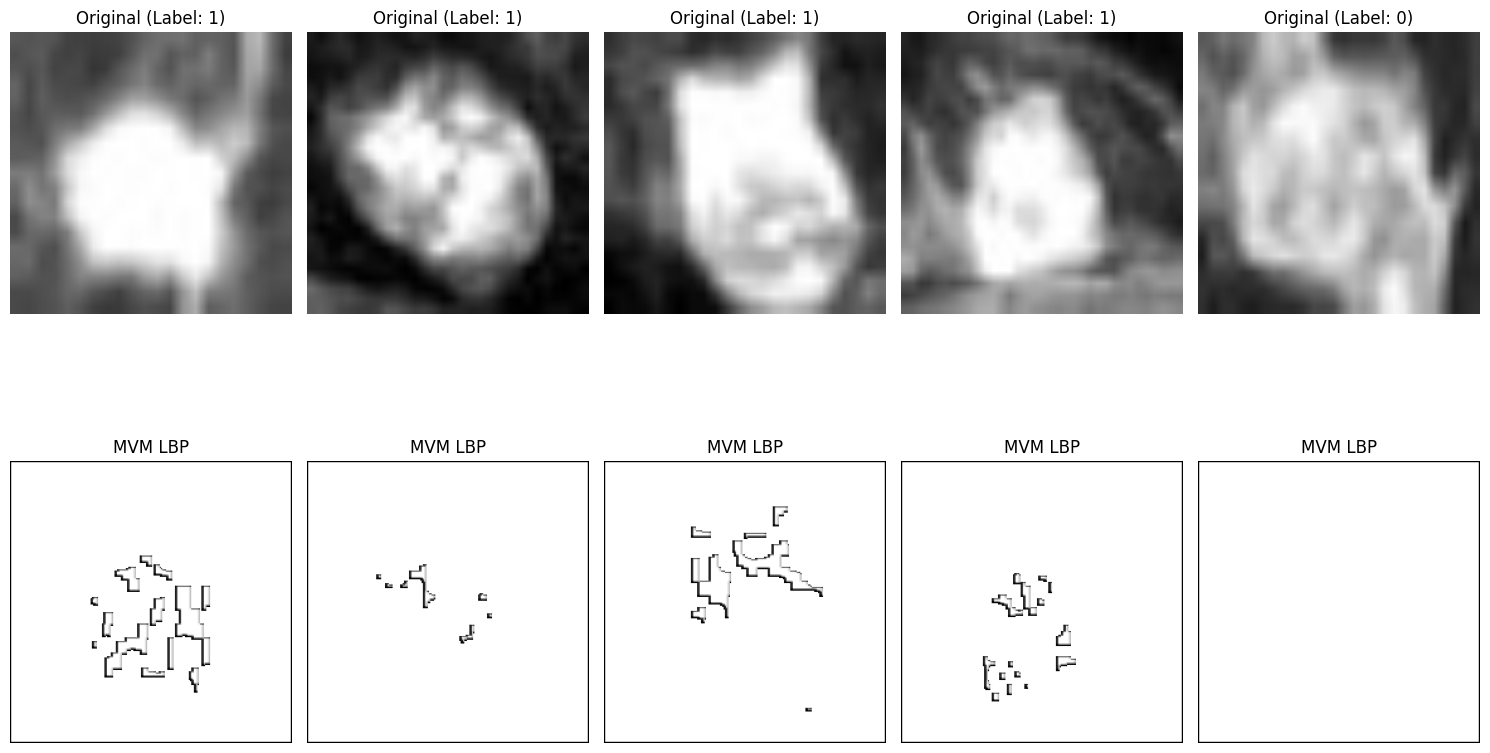

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random
from torchvision import datasets, transforms
def compute_MVM_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  # Initialize LBP image

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]
            
            neighbor_values = np.array([image[ni, nj] for ni, nj in neighbors])
            mean = np.mean(neighbor_values)
            variance = np.var(neighbor_values)
            median = np.median(neighbor_values)  
            threshold = (mean + np.sqrt(variance) + median) / 3

            lbp_code = 0
            for k, (ni, nj) in enumerate(neighbors):
                if image[ni, nj] >= threshold:  # Compare to the threshold
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    return lbp_image

if __name__ == "__main__":
    root_dir = r'/kaggle/input/tumor-trace' 
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  
        transforms.ToTensor(),
    ])

    dataset = datasets.ImageFolder(root_dir, transform=transform)

    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    plt.figure(figsize=(15, 10))

    for i, (img, label) in enumerate(selected_images, start=1):
       
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  
        img_gray = np.mean(img_np, axis=2).astype(np.uint8) 

        
        lbp_image = compute_MVM_LBP(img_gray)

        plt.subplot(2, 5, i)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        plt.subplot(2, 5, i + 5)
        plt.imshow(lbp_image, cmap='gray')
        plt.axis('off')
        plt.title('MVM LBP')

    plt.tight_layout()
    plt.show()


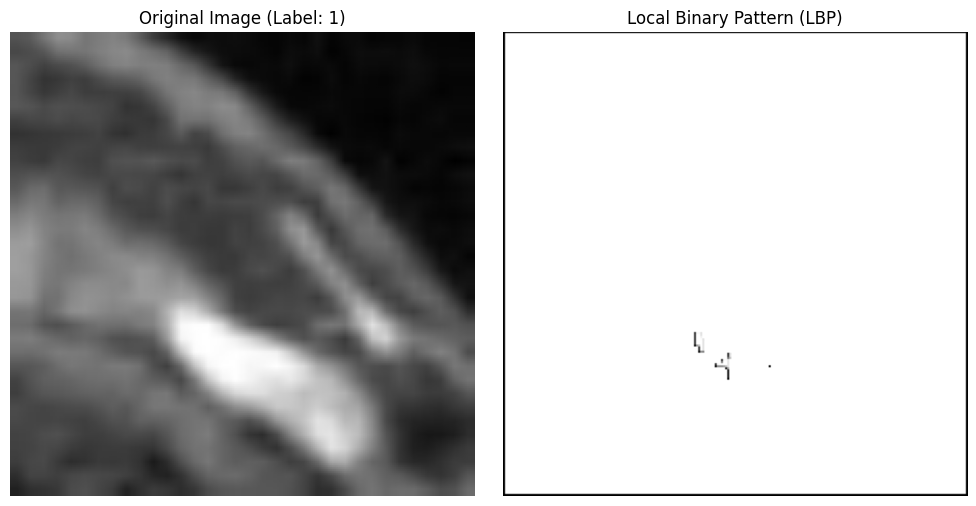

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms

# Function to compute LBP
def compute_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  # Initialize LBP image

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            
            
            # Define neighbor offsets inside the loop
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]
            lbp_code = 0

            # Collect neighbor values and compute LBP code
            for k in range(8):
                neighbor_value = image[neighbors[k][0], neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    return lbp_image

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fit model input size
        transforms.ToTensor(),
    ])

    # Load dataset
    dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

    # Randomly select an image from the dataset
    random_index = random.randint(0, len(dataset) - 1)
    random_image, label = dataset[random_index]

    # Convert the image to numpy and grayscale
    image_np = random_image.numpy()
    image_np = np.transpose(image_np, (1, 2, 0))
    image_gray = np.mean(image_np, axis=2).astype(np.uint8)  # Convert to uint8 for LBP

    # Compute LBP
    lbp_image = compute_LBP(image_gray)

    # Display the original and LBP images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.axis('off')
    plt.title(f'Original Image (Label: {label})')

    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image, cmap='gray', vmin=0, vmax=255)  # Add vmin and vmax for better display
    plt.axis('off')
    plt.title('Local Binary Pattern (LBP)')

    plt.tight_layout()
    plt.show()


Mean Binary Points: 250.13303172831633
Median Binary Points: 255.0
Variance Binary Points: 1193.0623208947204


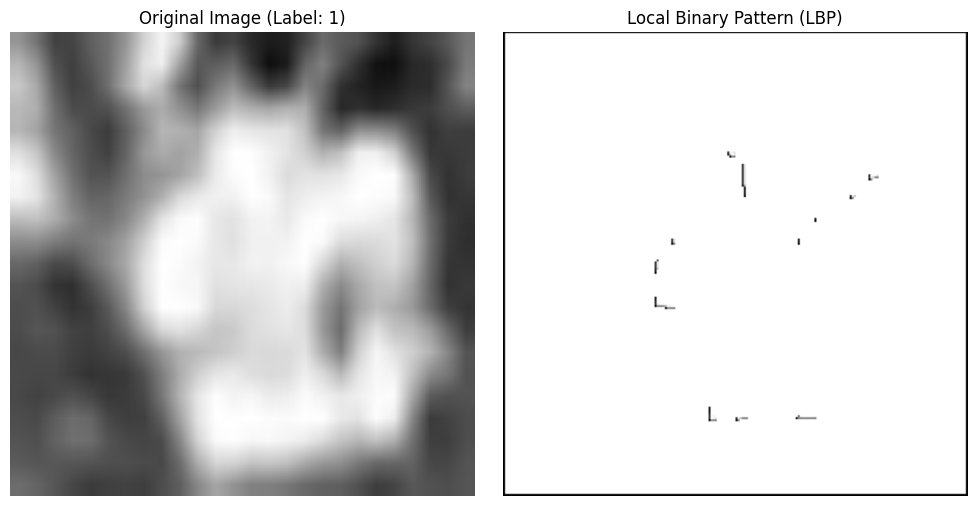

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms

# Function to compute LBP
def compute_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  # Initialize LBP image

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            
            # Define neighbor offsets inside the loop
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]
            lbp_code = 0

            # Collect neighbor values and compute LBP code
            for k in range(8):
                neighbor_value = image[neighbors[k][0], neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    return lbp_image

# Function to calculate mean, median, and variance of LBP values
def calculate_binary_point_statistics(lbp_image):
    # Flatten LBP image to compute statistics across all pixels
    lbp_values = lbp_image.flatten()
    
    mean_binary_points = np.mean(lbp_values)
    median_binary_points = np.median(lbp_values)
    variance_binary_points = np.var(lbp_values)
    
    return mean_binary_points, median_binary_points, variance_binary_points

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fit model input size
        transforms.ToTensor(),
    ])

    # Load dataset
    dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

    # Randomly select an image from the dataset
    random_index = random.randint(0, len(dataset) - 1)
    random_image, label = dataset[random_index]

    # Convert the image to numpy and grayscale
    image_np = random_image.numpy()
    image_np = np.transpose(image_np, (1, 2, 0))
    image_gray = np.mean(image_np, axis=2).astype(np.uint8)  # Convert to uint8 for LBP

    # Compute LBP
    lbp_image = compute_LBP(image_gray)

    # Calculate statistics for LBP values
    mean_binary_points, median_binary_points, variance_binary_points = calculate_binary_point_statistics(lbp_image)

    # Display results
    print(f"Mean Binary Points: {mean_binary_points}")
    print(f"Median Binary Points: {median_binary_points}")
    print(f"Variance Binary Points: {variance_binary_points}")

    # Display the original and LBP images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.axis('off')
    plt.title(f'Original Image (Label: {label})')

    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image, cmap='gray', vmin=0, vmax=255)  # Add vmin and vmax for better display
    plt.axis('off')
    plt.title('Local Binary Pattern (LBP)')

    plt.tight_layout()
    plt.show()


In [35]:
pip install -U scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 62.1 MB/s eta 0:00:0000:01:00:01
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.23.2
    Uninstalling scikit-image-0.23.2:
      Successfully uninstalled scikit-image-0.23.2
Note: you may need to restart the kernel to use updated packages.


In [73]:
import torchvision.models as models

# Initialize VGG16 without pre-trained weights
vgg16 = models.vgg16(pretrained=True)

# Set the model to evaluation mode
vgg16.eval()

# Print the model architecture
print(vgg16)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [75]:
import torch
import torch.nn as nn
import torchvision.models as models

class CustomVGG16(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomVGG16, self).__init__()
        
        vgg16 = models.vgg16(pretrained=True)
        
        self.features = vgg16.features
        self.avgpool = vgg16.avgpool
        
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),  
            nn.ReLU(),                     
            nn.Dropout(),                  
            nn.Linear(4096, 4096),         
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, num_classes)    
        )

    def forward(self, x):
        x = self.features(x)
        
        x = self.avgpool(x)
        
        x = torch.flatten(x, 1)
        
        x = self.classifier(x)
        
        return x


In [76]:
model = CustomVGG16(num_classes=2)
print(model)

CustomVGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, di

In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np
import os

**Device configuration**

In [78]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

**EarlyStopping Class**

In [79]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='/kaggle/working/models/VGG16_best.pth'):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f"Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model...")
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss



**Custom VGG16 Model**

In [80]:
class CustomVGG16(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomVGG16, self).__init__()
        vgg16 = models.vgg16(pretrained=True)
        self.features = vgg16.features
        self.avgpool = vgg16.avgpool
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

**Training Function**

In [81]:
def train(epoch, model, num_epochs, loader, criterion, l2_decay=0.01, lr=0.001):
    learning_rate = max(lr * (0.1 ** (epoch // 10)), 1e-5)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=l2_decay)
    model.train()
    correct = 0
    for data, label in tqdm(loader, desc=f"Epoch {epoch}/{num_epochs}", unit="batch"):
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(label.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(loader.dataset)
    print(f"Train Accuracy: {accuracy:.2f}%")
    return accuracy

**Validation Function**

In [82]:
def validate(model, val_loader):
    model.eval()
    correct = 0
    all_predictions, all_targets = [], []
    possibilities = None
    test_loss = 0

    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            val_output = model(data)
            test_loss += F.cross_entropy(val_output, target, reduction="sum").item()
            pred = val_output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(val_output, dim=1).cpu().data.numpy()
            possibilities = prob if possibilities is None else np.concatenate((possibilities, prob), axis=0)

    accuracy = 100. * correct / len(val_loader.dataset)
    print(f"Validation Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")
    cm = confusion_matrix(all_targets, all_predictions)
    print(f"Confusion Matrix:\n{cm}")

    num_classes = val_output.shape[1]
    label_onehot = np.eye(num_classes)[np.array(all_targets).astype(int)]
    fpr, tpr, _ = roc_curve(label_onehot.ravel(), possibilities.ravel())
    auc_value = auc(fpr, tpr)
    return accuracy, test_loss, auc_value

**Save Model**

In [83]:
def save_model(model, save_dir, model_name, current_auc, best_auc):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    model_save_path = os.path.join(save_dir, f"{model_name}_best.pth")
    if current_auc > best_auc:  # Save only if AUC improves
        best_auc = current_auc
        torch.save(model.state_dict(), model_save_path)
        print(f"Model saved at: {model_save_path} with improved AUC: {best_auc:.4f}")
    else:
        print(f"No improvement in AUC: {current_auc:.4f} (Best: {best_auc:.4f})")
    return best_auc



**Training and Validation Loop**

In [84]:
model = CustomVGG16(num_classes=2).to(device)
num_epochs = 50
criterion = nn.CrossEntropyLoss()
l2_decay = 0.01
lr = 0.001
best_auc = 0.0
model_name = "vgg16"
save_dir = "/kaggle/working/models"

# Assuming train_loader and val_loader are defined earlier
for epoch in range(1, num_epochs + 1):
    train_accuracy = train(epoch, model, num_epochs, train_loader, criterion, l2_decay, lr)

    with torch.no_grad():
        val_accuracy, val_loss, current_auc = validate(model, val_loader)

    best_auc = save_model(model, save_dir, model_name, current_auc, best_auc)

    print(f"Epoch {epoch}/{num_epochs} completed.")

# Load the saved model
model.load_state_dict(torch.load(os.path.join(save_dir, f"{model_name}_best.pth")))
model.eval()
print("Best model loaded successfully!")

Epoch 1/50: 100%|██████████| 639/639 [02:44<00:00,  3.90batch/s]

Train Accuracy: 86.04%


Validation Loss: 735.0298, Accuracy: 84.46%
Confusion Matrix:
[[ 234  174]
 [ 135 1446]]
Model saved at: /kaggle/working/models/vgg16_best.pth with improved AUC: 0.9257
Epoch 1/50 completed.


Epoch 2/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 96.28%


Validation Loss: 604.2392, Accuracy: 86.07%
Confusion Matrix:
[[ 253  155]
 [ 122 1459]]
Model saved at: /kaggle/working/models/vgg16_best.pth with improved AUC: 0.9485
Epoch 2/50 completed.


Epoch 3/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 98.24%


Validation Loss: 959.2601, Accuracy: 84.77%
Confusion Matrix:
[[ 261  147]
 [ 156 1425]]
No improvement in AUC: 0.9380 (Best: 0.9485)
Epoch 3/50 completed.


Epoch 4/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 98.90%


Validation Loss: 1173.3905, Accuracy: 81.90%
Confusion Matrix:
[[ 242  166]
 [ 194 1387]]
No improvement in AUC: 0.9190 (Best: 0.9485)
Epoch 4/50 completed.


Epoch 5/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.01%


Validation Loss: 920.8684, Accuracy: 84.82%
Confusion Matrix:
[[ 248  160]
 [ 142 1439]]
No improvement in AUC: 0.9361 (Best: 0.9485)
Epoch 5/50 completed.


Epoch 6/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.26%


Validation Loss: 861.2399, Accuracy: 85.07%
Confusion Matrix:
[[ 272  136]
 [ 161 1420]]
No improvement in AUC: 0.9378 (Best: 0.9485)
Epoch 6/50 completed.


Epoch 7/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.40%


Validation Loss: 950.0075, Accuracy: 83.41%
Confusion Matrix:
[[ 250  158]
 [ 172 1409]]
No improvement in AUC: 0.9311 (Best: 0.9485)
Epoch 7/50 completed.


Epoch 8/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.39%


Validation Loss: 1005.1318, Accuracy: 82.15%
Confusion Matrix:
[[ 218  190]
 [ 165 1416]]
No improvement in AUC: 0.9203 (Best: 0.9485)
Epoch 8/50 completed.


Epoch 9/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.08%


Validation Loss: 1012.2960, Accuracy: 85.12%
Confusion Matrix:
[[ 235  173]
 [ 123 1458]]
No improvement in AUC: 0.9278 (Best: 0.9485)
Epoch 9/50 completed.


Epoch 10/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.87%


Validation Loss: 1218.5707, Accuracy: 81.65%
Confusion Matrix:
[[ 289  119]
 [ 246 1335]]
No improvement in AUC: 0.9143 (Best: 0.9485)
Epoch 10/50 completed.


Epoch 11/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.92%


Validation Loss: 1212.5501, Accuracy: 82.00%
Confusion Matrix:
[[ 278  130]
 [ 228 1353]]
No improvement in AUC: 0.9168 (Best: 0.9485)
Epoch 11/50 completed.


Epoch 12/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.93%


Validation Loss: 1207.5032, Accuracy: 82.81%
Confusion Matrix:
[[ 275  133]
 [ 209 1372]]
No improvement in AUC: 0.9210 (Best: 0.9485)
Epoch 12/50 completed.


Epoch 13/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.94%


Validation Loss: 1193.7895, Accuracy: 82.81%
Confusion Matrix:
[[ 278  130]
 [ 212 1369]]
No improvement in AUC: 0.9218 (Best: 0.9485)
Epoch 13/50 completed.


Epoch 14/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.96%


Validation Loss: 1268.1579, Accuracy: 82.05%
Confusion Matrix:
[[ 296  112]
 [ 245 1336]]
No improvement in AUC: 0.9165 (Best: 0.9485)
Epoch 14/50 completed.


Epoch 15/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.95%


Validation Loss: 1140.2329, Accuracy: 83.66%
Confusion Matrix:
[[ 266  142]
 [ 183 1398]]
No improvement in AUC: 0.9261 (Best: 0.9485)
Epoch 15/50 completed.


Epoch 16/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.95%


Validation Loss: 1171.6457, Accuracy: 83.26%
Confusion Matrix:
[[ 269  139]
 [ 194 1387]]
No improvement in AUC: 0.9257 (Best: 0.9485)
Epoch 16/50 completed.


Epoch 17/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.96%


Validation Loss: 1285.7464, Accuracy: 81.95%
Confusion Matrix:
[[ 299  109]
 [ 250 1331]]
No improvement in AUC: 0.9131 (Best: 0.9485)
Epoch 17/50 completed.


Epoch 18/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.96%


Validation Loss: 1248.6599, Accuracy: 82.00%
Confusion Matrix:
[[ 285  123]
 [ 235 1346]]
No improvement in AUC: 0.9169 (Best: 0.9485)
Epoch 18/50 completed.


Epoch 19/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.96%


Validation Loss: 1155.9165, Accuracy: 82.81%
Confusion Matrix:
[[ 277  131]
 [ 211 1370]]
No improvement in AUC: 0.9240 (Best: 0.9485)
Epoch 19/50 completed.


Epoch 20/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.99%


Validation Loss: 1190.7697, Accuracy: 82.35%
Confusion Matrix:
[[ 281  127]
 [ 224 1357]]
No improvement in AUC: 0.9198 (Best: 0.9485)
Epoch 20/50 completed.


Epoch 21/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.97%


Validation Loss: 1190.1637, Accuracy: 82.45%
Confusion Matrix:
[[ 281  127]
 [ 222 1359]]
No improvement in AUC: 0.9205 (Best: 0.9485)
Epoch 21/50 completed.


Epoch 22/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.98%


Validation Loss: 1188.5639, Accuracy: 82.50%
Confusion Matrix:
[[ 284  124]
 [ 224 1357]]
No improvement in AUC: 0.9202 (Best: 0.9485)
Epoch 22/50 completed.


Epoch 23/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.97%


Validation Loss: 1189.9823, Accuracy: 82.55%
Confusion Matrix:
[[ 280  128]
 [ 219 1362]]
No improvement in AUC: 0.9208 (Best: 0.9485)
Epoch 23/50 completed.


Epoch 24/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.97%


Validation Loss: 1179.6977, Accuracy: 82.50%
Confusion Matrix:
[[ 278  130]
 [ 218 1363]]
No improvement in AUC: 0.9212 (Best: 0.9485)
Epoch 24/50 completed.


Epoch 25/50: 100%|██████████| 639/639 [02:44<00:00,  3.90batch/s]

Train Accuracy: 99.98%


Validation Loss: 1178.5989, Accuracy: 82.60%
Confusion Matrix:
[[ 282  126]
 [ 220 1361]]
No improvement in AUC: 0.9214 (Best: 0.9485)
Epoch 25/50 completed.


Epoch 26/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.99%


Validation Loss: 1179.9358, Accuracy: 82.40%
Confusion Matrix:
[[ 280  128]
 [ 222 1359]]
No improvement in AUC: 0.9209 (Best: 0.9485)
Epoch 26/50 completed.


Epoch 27/50: 100%|██████████| 639/639 [02:44<00:00,  3.90batch/s]

Train Accuracy: 99.98%


Validation Loss: 1177.9896, Accuracy: 82.45%
Confusion Matrix:
[[ 279  129]
 [ 220 1361]]
No improvement in AUC: 0.9211 (Best: 0.9485)
Epoch 27/50 completed.


Epoch 28/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.97%


Validation Loss: 1180.8974, Accuracy: 82.40%
Confusion Matrix:
[[ 279  129]
 [ 221 1360]]
No improvement in AUC: 0.9209 (Best: 0.9485)
Epoch 28/50 completed.


Epoch 29/50: 100%|██████████| 639/639 [02:44<00:00,  3.90batch/s]

Train Accuracy: 99.98%


Validation Loss: 1194.6856, Accuracy: 82.55%
Confusion Matrix:
[[ 287  121]
 [ 226 1355]]
No improvement in AUC: 0.9192 (Best: 0.9485)
Epoch 29/50 completed.


Epoch 30/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.97%


Validation Loss: 1171.4657, Accuracy: 82.65%
Confusion Matrix:
[[ 280  128]
 [ 217 1364]]
No improvement in AUC: 0.9216 (Best: 0.9485)
Epoch 30/50 completed.


Epoch 31/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.97%


Validation Loss: 1185.1519, Accuracy: 82.65%
Confusion Matrix:
[[ 284  124]
 [ 221 1360]]
No improvement in AUC: 0.9205 (Best: 0.9485)
Epoch 31/50 completed.


Epoch 32/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.98%


Validation Loss: 1182.8145, Accuracy: 82.55%
Confusion Matrix:
[[ 284  124]
 [ 223 1358]]
No improvement in AUC: 0.9202 (Best: 0.9485)
Epoch 32/50 completed.


Epoch 33/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.98%


Validation Loss: 1191.7245, Accuracy: 82.35%
Confusion Matrix:
[[ 282  126]
 [ 225 1356]]
No improvement in AUC: 0.9201 (Best: 0.9485)
Epoch 33/50 completed.


Epoch 34/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.97%


Validation Loss: 1176.8705, Accuracy: 83.01%
Confusion Matrix:
[[ 280  128]
 [ 210 1371]]
No improvement in AUC: 0.9219 (Best: 0.9485)
Epoch 34/50 completed.


Epoch 35/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.99%


Validation Loss: 1185.2026, Accuracy: 82.50%
Confusion Matrix:
[[ 281  127]
 [ 221 1360]]
No improvement in AUC: 0.9202 (Best: 0.9485)
Epoch 35/50 completed.


Epoch 36/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.97%


Validation Loss: 1180.0732, Accuracy: 82.65%
Confusion Matrix:
[[ 283  125]
 [ 220 1361]]
No improvement in AUC: 0.9206 (Best: 0.9485)
Epoch 36/50 completed.


Epoch 37/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.97%


Validation Loss: 1177.4711, Accuracy: 82.60%
Confusion Matrix:
[[ 282  126]
 [ 220 1361]]
No improvement in AUC: 0.9206 (Best: 0.9485)
Epoch 37/50 completed.


Epoch 38/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.98%


Validation Loss: 1163.9599, Accuracy: 82.65%
Confusion Matrix:
[[ 279  129]
 [ 216 1365]]
No improvement in AUC: 0.9218 (Best: 0.9485)
Epoch 38/50 completed.


Epoch 39/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.98%


Validation Loss: 1165.8542, Accuracy: 82.60%
Confusion Matrix:
[[ 281  127]
 [ 219 1362]]
No improvement in AUC: 0.9216 (Best: 0.9485)
Epoch 39/50 completed.


Epoch 40/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.99%


Validation Loss: 1171.7936, Accuracy: 82.55%
Confusion Matrix:
[[ 282  126]
 [ 221 1360]]
No improvement in AUC: 0.9218 (Best: 0.9485)
Epoch 40/50 completed.


Epoch 41/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.98%


Validation Loss: 1172.8550, Accuracy: 82.81%
Confusion Matrix:
[[ 282  126]
 [ 216 1365]]
No improvement in AUC: 0.9223 (Best: 0.9485)
Epoch 41/50 completed.


Epoch 42/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.98%


Validation Loss: 1170.1815, Accuracy: 82.55%
Confusion Matrix:
[[ 282  126]
 [ 221 1360]]
No improvement in AUC: 0.9217 (Best: 0.9485)
Epoch 42/50 completed.


Epoch 43/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.97%


Validation Loss: 1177.1613, Accuracy: 82.60%
Confusion Matrix:
[[ 282  126]
 [ 220 1361]]
No improvement in AUC: 0.9210 (Best: 0.9485)
Epoch 43/50 completed.


Epoch 44/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.98%


Validation Loss: 1186.2907, Accuracy: 82.60%
Confusion Matrix:
[[ 284  124]
 [ 222 1359]]
No improvement in AUC: 0.9201 (Best: 0.9485)
Epoch 44/50 completed.


Epoch 45/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.98%


Validation Loss: 1176.7609, Accuracy: 82.60%
Confusion Matrix:
[[ 283  125]
 [ 221 1360]]
No improvement in AUC: 0.9208 (Best: 0.9485)
Epoch 45/50 completed.


Epoch 46/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.96%


Validation Loss: 1173.1563, Accuracy: 82.65%
Confusion Matrix:
[[ 283  125]
 [ 220 1361]]
No improvement in AUC: 0.9211 (Best: 0.9485)
Epoch 46/50 completed.


Epoch 47/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.99%


Validation Loss: 1169.6094, Accuracy: 82.55%
Confusion Matrix:
[[ 283  125]
 [ 222 1359]]
No improvement in AUC: 0.9209 (Best: 0.9485)
Epoch 47/50 completed.


Epoch 48/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.99%


Validation Loss: 1156.3618, Accuracy: 82.96%
Confusion Matrix:
[[ 280  128]
 [ 211 1370]]
No improvement in AUC: 0.9227 (Best: 0.9485)
Epoch 48/50 completed.


Epoch 49/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.96%


Validation Loss: 1175.3530, Accuracy: 82.45%
Confusion Matrix:
[[ 282  126]
 [ 223 1358]]
No improvement in AUC: 0.9200 (Best: 0.9485)
Epoch 49/50 completed.


Epoch 50/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.98%


Validation Loss: 1173.2166, Accuracy: 82.50%
Confusion Matrix:
[[ 285  123]
 [ 225 1356]]
No improvement in AUC: 0.9202 (Best: 0.9485)
Epoch 50/50 completed.


/tmp/ipykernel_30/106707663.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(save_dir, f"{model_name}_best.pth")))


Best model loaded successfully!


In [85]:
#import shutil
#shutil.rmtree('/kaggle/working/models')  # Delete models directory if needed


**Testing Function**

In [99]:
def test_with_visualization(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    all_predictions, all_targets = [], []
    probabilities = None
    test_loss = 0

    with torch.no_grad():  # No gradient calculation needed for testing
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction="sum").item()  # Calculate loss

            pred = output.argmax(dim=1, keepdim=True)  # Get predictions
            correct += pred.eq(target.view_as(pred)).sum().item()  # Count correct predictions

            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())

            prob = F.softmax(output, dim=1).cpu().data.numpy()  # Get probabilities for ROC curve
            probabilities = prob if probabilities is None else np.concatenate((probabilities, prob), axis=0)

    # Calculate accuracy
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f"Test Accuracy: {accuracy:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(all_targets, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC-AUC
    num_classes = model.classifier[-1].out_features  # Get the number of output classes from the last layer
    label_onehot = np.eye(num_classes)[np.array(all_targets).astype(int)]  # One-hot encoding
    fpr, tpr, _ = roc_curve(label_onehot.ravel(), probabilities.ravel())  # Get ROC curve values
    auc_value = auc(fpr, tpr)  # Calculate AUC

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

    return accuracy, test_loss, auc_value



Test Accuracy: 72.46%
Test Loss: 7216.8030


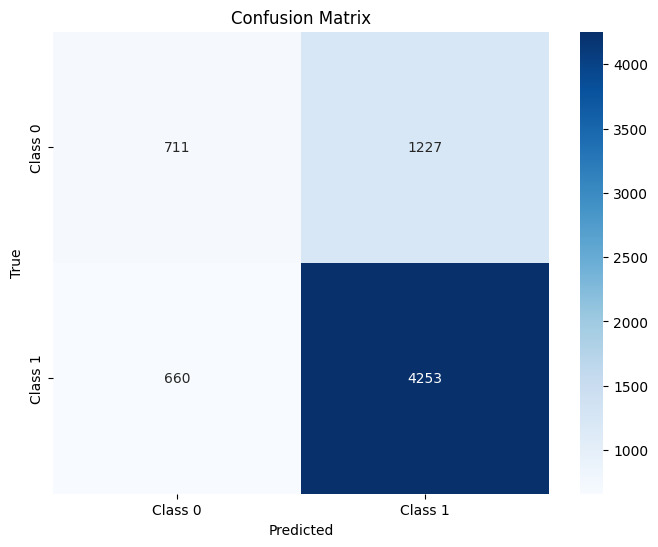

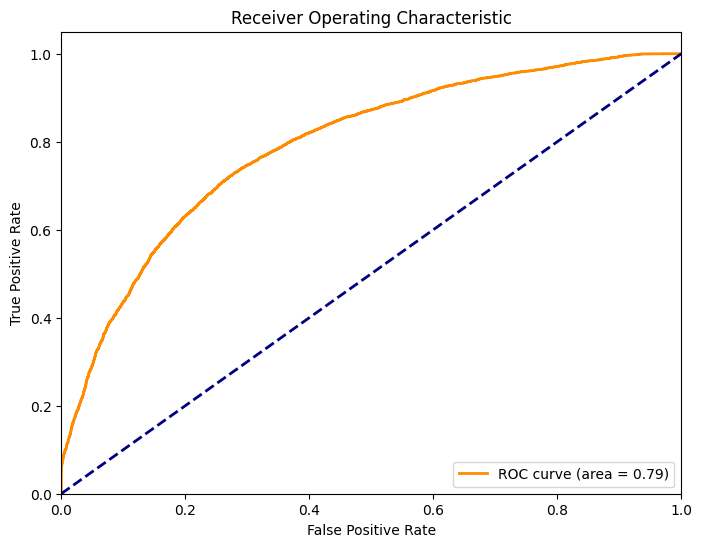

Test Accuracy: 72.46%
Test Loss: 7216.8030
Test AUC: 0.7917


In [100]:
test_accuracy, test_loss, test_auc = test_with_visualization(model, test_loader)

if test_accuracy is not None:
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test AUC: {test_auc:.4f}")


In [107]:
import os

# Create the directory if it doesn't exist
save_dir = '/kaggle/working/vgg_models'
os.makedirs(save_dir, exist_ok=True)

# Save the VGG16 model weights
torch.save(model.state_dict(), os.path.join(save_dir, 'vgg16_model.pth'))



In [108]:
import zipfile

# Path to the model file
model_file = os.path.join(save_dir, 'vgg16_model.pth')

# Path for the zip file
zip_file = os.path.join(save_dir, 'vgg16_model.zip')

# Create a zip file
with zipfile.ZipFile(zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(model_file, 'vgg16_model.pth')


resNet18

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np
import os

In [58]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [59]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='/kaggle/working/models/resNet18_best.pth'):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f"Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model...")
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss


**Define a custom ResNet-18 model**

In [61]:
class CustomResNet18(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomResNet18, self).__init__()
        resnet18 = models.resnet18(pretrained=True)
        self.features = nn.Sequential(*list(resnet18.children())[:-1])  # Remove the last FC layer
        self.fc = nn.Linear(resnet18.fc.in_features, num_classes)  # Replace with custom FC layer

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

**Training function**

In [62]:
def train(epoch, model, num_epochs, loader, criterion, l2_decay=0.01, lr=0.001):
    learning_rate = max(lr * (0.1 ** (epoch // 10)), 1e-5)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=l2_decay)
    model.train()
    correct = 0
    for data, label in tqdm(loader, desc=f"Epoch {epoch}/{num_epochs}", unit="batch"):
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(label.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(loader.dataset)
    print(f"Train Accuracy: {accuracy:.2f}%")
    return accuracy


**Validation function**

In [63]:
def validate(model, val_loader):
    model.eval()
    correct = 0
    all_predictions, all_targets = [], []
    possibilities = None
    test_loss = 0

    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            val_output = model(data)
            test_loss += F.cross_entropy(val_output, target, reduction="sum").item()
            pred = val_output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(val_output, dim=1).cpu().data.numpy()
            possibilities = prob if possibilities is None else np.concatenate((possibilities, prob), axis=0)

    accuracy = 100. * correct / len(val_loader.dataset)
    print(f"Validation Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")
    cm = confusion_matrix(all_targets, all_predictions)
    print(f"Confusion Matrix:\n{cm}")

    num_classes = val_output.shape[1]
    label_onehot = np.eye(num_classes)[np.array(all_targets).astype(int)]
    fpr, tpr, _ = roc_curve(label_onehot.ravel(), possibilities.ravel())
    auc_value = auc(fpr, tpr)
    return accuracy, test_loss, auc_value

**Save model function**

In [64]:
def save_model(model, save_dir, model_name, current_auc, best_auc):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    model_save_path = os.path.join(save_dir, f"{model_name}_best.pth")
    if current_auc > best_auc:  # Save only if AUC improves
        best_auc = current_auc
        torch.save(model.state_dict(), model_save_path)
        print(f"Model saved at: {model_save_path} with improved AUC: {best_auc:.4f}")
    else:
        print(f"No improvement in AUC: {current_auc:.4f} (Best: {best_auc:.4f})")
    return best_auc

**Training Loop**

In [65]:
model = CustomResNet18(num_classes=2).to(device)
num_epochs = 50
criterion = nn.CrossEntropyLoss()
l2_decay = 0.01
lr = 0.001
best_accuracy = 0.0
model_name = "resnet18"
save_dir = "/kaggle/working/models"

# Assuming train_loader and val_loader are defined earlier
for epoch in range(1, num_epochs + 1):
    # Train the model
    train_accuracy = train(epoch, model, num_epochs, train_loader, criterion, l2_decay, lr)

    # Validate the model
    with torch.no_grad():
        val_accuracy, val_loss, current_auc = validate(model, val_loader)

    # Save the model if AUC improves
    best_accuracy = save_model(model, save_dir, model_name, current_auc, best_accuracy)

    print(f"Epoch {epoch}/{num_epochs} completed.")

# Load the saved model
model.load_state_dict(torch.load(os.path.join(save_dir, f"{model_name}_best.pth")))
model.eval()
print("Best model loaded successfully!")

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 152MB/s]
Epoch 1/50: 100%|██████████| 639/639 [01:28<00:00,  7.18batch/s]

Train Accuracy: 89.95%


Validation Loss: 777.9889, Accuracy: 84.82%
Confusion Matrix:
[[ 329   79]
 [ 223 1358]]
Model saved at: /kaggle/working/models/resnet18_best.pth with improved AUC: 0.9298
Epoch 1/50 completed.


Epoch 2/50: 100%|██████████| 639/639 [00:43<00:00, 14.76batch/s]

Train Accuracy: 97.62%


Validation Loss: 987.3558, Accuracy: 84.77%
Confusion Matrix:
[[ 295  113]
 [ 190 1391]]
No improvement in AUC: 0.9259 (Best: 0.9298)
Epoch 2/50 completed.


Epoch 3/50: 100%|██████████| 639/639 [00:43<00:00, 14.73batch/s]

Train Accuracy: 98.97%


Validation Loss: 1164.9672, Accuracy: 82.76%
Confusion Matrix:
[[ 256  152]
 [ 191 1390]]
No improvement in AUC: 0.9178 (Best: 0.9298)
Epoch 3/50 completed.


Epoch 4/50: 100%|██████████| 639/639 [00:43<00:00, 14.69batch/s]

Train Accuracy: 99.29%


Validation Loss: 1356.8788, Accuracy: 82.45%
Confusion Matrix:
[[ 336   72]
 [ 277 1304]]
No improvement in AUC: 0.9023 (Best: 0.9298)
Epoch 4/50 completed.


Epoch 5/50: 100%|██████████| 639/639 [00:43<00:00, 14.74batch/s]

Train Accuracy: 99.54%


Validation Loss: 1185.1543, Accuracy: 83.56%
Confusion Matrix:
[[ 289  119]
 [ 208 1373]]
No improvement in AUC: 0.9102 (Best: 0.9298)
Epoch 5/50 completed.


Epoch 6/50: 100%|██████████| 639/639 [00:43<00:00, 14.74batch/s]

Train Accuracy: 99.72%


Validation Loss: 1261.0726, Accuracy: 83.46%
Confusion Matrix:
[[ 265  143]
 [ 186 1395]]
No improvement in AUC: 0.9095 (Best: 0.9298)
Epoch 6/50 completed.


Epoch 7/50: 100%|██████████| 639/639 [00:43<00:00, 14.70batch/s]

Train Accuracy: 99.91%


Validation Loss: 1423.7157, Accuracy: 81.90%
Confusion Matrix:
[[ 299  109]
 [ 251 1330]]
No improvement in AUC: 0.8921 (Best: 0.9298)
Epoch 7/50 completed.


Epoch 8/50: 100%|██████████| 639/639 [00:43<00:00, 14.71batch/s]

Train Accuracy: 99.87%


Validation Loss: 1103.5981, Accuracy: 84.82%
Confusion Matrix:
[[ 310   98]
 [ 204 1377]]
No improvement in AUC: 0.9252 (Best: 0.9298)
Epoch 8/50 completed.


Epoch 9/50: 100%|██████████| 639/639 [00:43<00:00, 14.68batch/s]


Train Accuracy: 99.82%
Validation Loss: 1133.3774, Accuracy: 83.06%
Confusion Matrix:
[[ 285  123]
 [ 214 1367]]
No improvement in AUC: 0.9111 (Best: 0.9298)
Epoch 9/50 completed.


Epoch 10/50: 100%|██████████| 639/639 [00:43<00:00, 14.72batch/s]

Train Accuracy: 99.95%


Validation Loss: 1213.2705, Accuracy: 83.71%
Confusion Matrix:
[[ 283  125]
 [ 199 1382]]
No improvement in AUC: 0.9116 (Best: 0.9298)
Epoch 10/50 completed.


Epoch 11/50: 100%|██████████| 639/639 [00:43<00:00, 14.69batch/s]

Train Accuracy: 99.99%


Validation Loss: 1289.9167, Accuracy: 83.01%
Confusion Matrix:
[[ 298  110]
 [ 228 1353]]
No improvement in AUC: 0.9022 (Best: 0.9298)
Epoch 11/50 completed.


Epoch 12/50: 100%|██████████| 639/639 [00:43<00:00, 14.67batch/s]

Train Accuracy: 99.98%


Validation Loss: 1217.6421, Accuracy: 84.51%
Confusion Matrix:
[[ 298  110]
 [ 198 1383]]
No improvement in AUC: 0.9152 (Best: 0.9298)
Epoch 12/50 completed.


Epoch 13/50: 100%|██████████| 639/639 [00:43<00:00, 14.70batch/s]

Train Accuracy: 100.00%


Validation Loss: 1281.1620, Accuracy: 83.36%
Confusion Matrix:
[[ 303  105]
 [ 226 1355]]
No improvement in AUC: 0.9047 (Best: 0.9298)
Epoch 13/50 completed.


Epoch 14/50: 100%|██████████| 639/639 [00:43<00:00, 14.68batch/s]

Train Accuracy: 100.00%


Validation Loss: 1344.0147, Accuracy: 82.91%
Confusion Matrix:
[[ 313   95]
 [ 245 1336]]
No improvement in AUC: 0.8992 (Best: 0.9298)
Epoch 14/50 completed.


Epoch 15/50: 100%|██████████| 639/639 [00:43<00:00, 14.72batch/s]

Train Accuracy: 99.99%


Validation Loss: 1368.3486, Accuracy: 82.50%
Confusion Matrix:
[[ 313   95]
 [ 253 1328]]
No improvement in AUC: 0.8938 (Best: 0.9298)
Epoch 15/50 completed.


Epoch 16/50: 100%|██████████| 639/639 [00:43<00:00, 14.73batch/s]

Train Accuracy: 100.00%


Validation Loss: 1244.8444, Accuracy: 83.91%
Confusion Matrix:
[[ 296  112]
 [ 208 1373]]
No improvement in AUC: 0.9113 (Best: 0.9298)
Epoch 16/50 completed.


Epoch 17/50: 100%|██████████| 639/639 [00:43<00:00, 14.72batch/s]

Train Accuracy: 99.99%


Validation Loss: 1295.9293, Accuracy: 83.31%
Confusion Matrix:
[[ 303  105]
 [ 227 1354]]
No improvement in AUC: 0.9034 (Best: 0.9298)
Epoch 17/50 completed.


Epoch 18/50: 100%|██████████| 639/639 [00:43<00:00, 14.69batch/s]

Train Accuracy: 100.00%


Validation Loss: 1389.2593, Accuracy: 81.90%
Confusion Matrix:
[[ 314   94]
 [ 266 1315]]
No improvement in AUC: 0.8917 (Best: 0.9298)
Epoch 18/50 completed.


Epoch 19/50: 100%|██████████| 639/639 [00:43<00:00, 14.67batch/s]

Train Accuracy: 100.00%


Validation Loss: 1287.7832, Accuracy: 83.21%
Confusion Matrix:
[[ 301  107]
 [ 227 1354]]
No improvement in AUC: 0.9042 (Best: 0.9298)
Epoch 19/50 completed.


Epoch 20/50: 100%|██████████| 639/639 [00:43<00:00, 14.74batch/s]

Train Accuracy: 99.99%


Validation Loss: 1264.3444, Accuracy: 83.61%
Confusion Matrix:
[[ 302  106]
 [ 220 1361]]
No improvement in AUC: 0.9066 (Best: 0.9298)
Epoch 20/50 completed.


Epoch 21/50: 100%|██████████| 639/639 [00:43<00:00, 14.69batch/s]

Train Accuracy: 100.00%


Validation Loss: 1317.6361, Accuracy: 82.60%
Confusion Matrix:
[[ 307  101]
 [ 245 1336]]
No improvement in AUC: 0.8985 (Best: 0.9298)
Epoch 21/50 completed.


Epoch 22/50: 100%|██████████| 639/639 [00:43<00:00, 14.72batch/s]

Train Accuracy: 100.00%


Validation Loss: 1218.4200, Accuracy: 84.11%
Confusion Matrix:
[[ 290  118]
 [ 198 1383]]
No improvement in AUC: 0.9145 (Best: 0.9298)
Epoch 22/50 completed.


Epoch 23/50: 100%|██████████| 639/639 [00:43<00:00, 14.70batch/s]

Train Accuracy: 100.00%


Validation Loss: 1357.0553, Accuracy: 82.20%
Confusion Matrix:
[[ 311   97]
 [ 257 1324]]
No improvement in AUC: 0.8937 (Best: 0.9298)
Epoch 23/50 completed.


Epoch 24/50: 100%|██████████| 639/639 [00:43<00:00, 14.69batch/s]

Train Accuracy: 100.00%


Validation Loss: 1265.5168, Accuracy: 83.46%
Confusion Matrix:
[[ 299  109]
 [ 220 1361]]
No improvement in AUC: 0.9061 (Best: 0.9298)
Epoch 24/50 completed.


Epoch 25/50: 100%|██████████| 639/639 [00:43<00:00, 14.73batch/s]

Train Accuracy: 100.00%


Validation Loss: 1194.8851, Accuracy: 84.46%
Confusion Matrix:
[[ 284  124]
 [ 185 1396]]
No improvement in AUC: 0.9161 (Best: 0.9298)
Epoch 25/50 completed.


Epoch 26/50: 100%|██████████| 639/639 [00:43<00:00, 14.66batch/s]

Train Accuracy: 100.00%


Validation Loss: 1340.2950, Accuracy: 82.76%
Confusion Matrix:
[[ 310   98]
 [ 245 1336]]
No improvement in AUC: 0.8988 (Best: 0.9298)
Epoch 26/50 completed.


Epoch 27/50: 100%|██████████| 639/639 [00:43<00:00, 14.71batch/s]

Train Accuracy: 100.00%


Validation Loss: 1355.5951, Accuracy: 82.10%
Confusion Matrix:
[[ 312   96]
 [ 260 1321]]
No improvement in AUC: 0.8930 (Best: 0.9298)
Epoch 27/50 completed.


Epoch 28/50: 100%|██████████| 639/639 [00:43<00:00, 14.70batch/s]

Train Accuracy: 100.00%


Validation Loss: 1325.4658, Accuracy: 83.01%
Confusion Matrix:
[[ 311   97]
 [ 241 1340]]
No improvement in AUC: 0.9003 (Best: 0.9298)
Epoch 28/50 completed.


Epoch 29/50: 100%|██████████| 639/639 [00:43<00:00, 14.70batch/s]

Train Accuracy: 100.00%


Validation Loss: 1333.3300, Accuracy: 82.81%
Confusion Matrix:
[[ 310   98]
 [ 244 1337]]
No improvement in AUC: 0.9009 (Best: 0.9298)
Epoch 29/50 completed.


Epoch 30/50: 100%|██████████| 639/639 [00:43<00:00, 14.69batch/s]

Train Accuracy: 100.00%


Validation Loss: 1276.7535, Accuracy: 83.51%
Confusion Matrix:
[[ 303  105]
 [ 223 1358]]
No improvement in AUC: 0.9062 (Best: 0.9298)
Epoch 30/50 completed.


Epoch 31/50: 100%|██████████| 639/639 [00:43<00:00, 14.74batch/s]

Train Accuracy: 100.00%


Validation Loss: 1331.9968, Accuracy: 83.16%
Confusion Matrix:
[[ 312   96]
 [ 239 1342]]
No improvement in AUC: 0.8985 (Best: 0.9298)
Epoch 31/50 completed.


Epoch 32/50: 100%|██████████| 639/639 [00:43<00:00, 14.74batch/s]

Train Accuracy: 100.00%


Validation Loss: 1280.1421, Accuracy: 83.46%
Confusion Matrix:
[[ 300  108]
 [ 221 1360]]
No improvement in AUC: 0.9070 (Best: 0.9298)
Epoch 32/50 completed.


Epoch 33/50: 100%|██████████| 639/639 [00:43<00:00, 14.72batch/s]

Train Accuracy: 100.00%


Validation Loss: 1320.0341, Accuracy: 82.91%
Confusion Matrix:
[[ 309   99]
 [ 241 1340]]
No improvement in AUC: 0.8997 (Best: 0.9298)
Epoch 33/50 completed.


Epoch 34/50: 100%|██████████| 639/639 [00:43<00:00, 14.74batch/s]

Train Accuracy: 100.00%


Validation Loss: 1303.5269, Accuracy: 83.01%
Confusion Matrix:
[[ 304  104]
 [ 234 1347]]
No improvement in AUC: 0.9017 (Best: 0.9298)
Epoch 34/50 completed.


Epoch 35/50: 100%|██████████| 639/639 [00:43<00:00, 14.73batch/s]

Train Accuracy: 99.99%


Validation Loss: 1250.3344, Accuracy: 83.66%
Confusion Matrix:
[[ 290  118]
 [ 207 1374]]
No improvement in AUC: 0.9105 (Best: 0.9298)
Epoch 35/50 completed.


Epoch 36/50: 100%|██████████| 639/639 [00:43<00:00, 14.71batch/s]

Train Accuracy: 100.00%


Validation Loss: 1259.8939, Accuracy: 83.71%
Confusion Matrix:
[[ 297  111]
 [ 213 1368]]
No improvement in AUC: 0.9071 (Best: 0.9298)
Epoch 36/50 completed.


Epoch 37/50: 100%|██████████| 639/639 [00:43<00:00, 14.70batch/s]

Train Accuracy: 100.00%


Validation Loss: 1303.3834, Accuracy: 82.91%
Confusion Matrix:
[[ 303  105]
 [ 235 1346]]
No improvement in AUC: 0.9006 (Best: 0.9298)
Epoch 37/50 completed.


Epoch 38/50: 100%|██████████| 639/639 [00:43<00:00, 14.70batch/s]

Train Accuracy: 100.00%


Validation Loss: 1272.8350, Accuracy: 83.71%
Confusion Matrix:
[[ 294  114]
 [ 210 1371]]
No improvement in AUC: 0.9080 (Best: 0.9298)
Epoch 38/50 completed.


Epoch 39/50: 100%|██████████| 639/639 [00:43<00:00, 14.71batch/s]

Train Accuracy: 100.00%


Validation Loss: 1282.3074, Accuracy: 83.26%
Confusion Matrix:
[[ 297  111]
 [ 222 1359]]
No improvement in AUC: 0.9064 (Best: 0.9298)
Epoch 39/50 completed.


Epoch 40/50: 100%|██████████| 639/639 [00:43<00:00, 14.71batch/s]

Train Accuracy: 100.00%


Validation Loss: 1267.1168, Accuracy: 83.46%
Confusion Matrix:
[[ 299  109]
 [ 220 1361]]
No improvement in AUC: 0.9064 (Best: 0.9298)
Epoch 40/50 completed.


Epoch 41/50: 100%|██████████| 639/639 [00:43<00:00, 14.71batch/s]

Train Accuracy: 100.00%


Validation Loss: 1317.6062, Accuracy: 82.76%
Confusion Matrix:
[[ 301  107]
 [ 236 1345]]
No improvement in AUC: 0.8998 (Best: 0.9298)
Epoch 41/50 completed.


Epoch 42/50: 100%|██████████| 639/639 [00:43<00:00, 14.71batch/s]

Train Accuracy: 100.00%


Validation Loss: 1313.8367, Accuracy: 82.96%
Confusion Matrix:
[[ 310   98]
 [ 241 1340]]
No improvement in AUC: 0.8991 (Best: 0.9298)
Epoch 42/50 completed.


Epoch 43/50: 100%|██████████| 639/639 [00:43<00:00, 14.72batch/s]

Train Accuracy: 100.00%


Validation Loss: 1251.7782, Accuracy: 83.86%
Confusion Matrix:
[[ 296  112]
 [ 209 1372]]
No improvement in AUC: 0.9094 (Best: 0.9298)
Epoch 43/50 completed.


Epoch 44/50: 100%|██████████| 639/639 [00:43<00:00, 14.73batch/s]

Train Accuracy: 100.00%


Validation Loss: 1285.4634, Accuracy: 83.41%
Confusion Matrix:
[[ 306  102]
 [ 228 1353]]
No improvement in AUC: 0.9066 (Best: 0.9298)
Epoch 44/50 completed.


Epoch 45/50: 100%|██████████| 639/639 [00:43<00:00, 14.70batch/s]

Train Accuracy: 100.00%


Validation Loss: 1370.7008, Accuracy: 82.60%
Confusion Matrix:
[[ 320   88]
 [ 258 1323]]
No improvement in AUC: 0.8937 (Best: 0.9298)
Epoch 45/50 completed.


Epoch 46/50: 100%|██████████| 639/639 [00:43<00:00, 14.72batch/s]

Train Accuracy: 100.00%


Validation Loss: 1310.8519, Accuracy: 82.81%
Confusion Matrix:
[[ 305  103]
 [ 239 1342]]
No improvement in AUC: 0.9029 (Best: 0.9298)
Epoch 46/50 completed.


Epoch 47/50: 100%|██████████| 639/639 [00:43<00:00, 14.70batch/s]

Train Accuracy: 100.00%


Validation Loss: 1321.0279, Accuracy: 82.65%
Confusion Matrix:
[[ 303  105]
 [ 240 1341]]
No improvement in AUC: 0.8987 (Best: 0.9298)
Epoch 47/50 completed.


Epoch 48/50: 100%|██████████| 639/639 [00:43<00:00, 14.76batch/s]

Train Accuracy: 100.00%


Validation Loss: 1253.5161, Accuracy: 83.61%
Confusion Matrix:
[[ 300  108]
 [ 218 1363]]
No improvement in AUC: 0.9083 (Best: 0.9298)
Epoch 48/50 completed.


Epoch 49/50: 100%|██████████| 639/639 [00:43<00:00, 14.69batch/s]

Train Accuracy: 100.00%


Validation Loss: 1225.8822, Accuracy: 84.21%
Confusion Matrix:
[[ 296  112]
 [ 202 1379]]
No improvement in AUC: 0.9125 (Best: 0.9298)
Epoch 49/50 completed.


Epoch 50/50: 100%|██████████| 639/639 [00:43<00:00, 14.75batch/s]

Train Accuracy: 100.00%


Validation Loss: 1306.3785, Accuracy: 83.11%
Confusion Matrix:
[[ 311   97]
 [ 239 1342]]
No improvement in AUC: 0.9009 (Best: 0.9298)
Epoch 50/50 completed.
Best model loaded successfully!


/tmp/ipykernel_30/580852264.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(save_dir, f"{model_name}_best.pth")))


**Test Function**

In [67]:
# Test function
def test(model, test_loader):
    model.eval()
    correct = 0
    all_predictions, all_targets = [], []
    probabilities = None

    with torch.no_grad():
        for data, target in tqdm(test_loader, desc="Testing", unit="batch"):
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(output, dim=1).cpu().data.numpy()
            probabilities = prob if probabilities is None else np.concatenate((probabilities, prob), axis=0)

    # Calculate overall test accuracy
    test_accuracy = 100. * correct / len(test_loader.dataset)
    print(f"Test Accuracy: {test_accuracy:.2f}%")

    # Confusion matrix
    cm = confusion_matrix(all_targets, all_predictions)
    print(f"Confusion Matrix:\n{cm}")

    # ROC-AUC
    num_classes = model.fc.out_features  # Number of output classes
    label_onehot = np.eye(num_classes)[np.array(all_targets).astype(int)]
    fpr, tpr, _ = roc_curve(label_onehot.ravel(), probabilities.ravel())
    auc_value = auc(fpr, tpr)
    print(f"Test ROC-AUC: {auc_value:.4f}")

    return test_accuracy, cm, auc_value

# Usage
# Assuming test_loader is defined and contains your test data
test_accuracy, test_cm, test_auc = test(model, test_loader)



Testing: 100%|██████████| 215/215 [00:15<00:00, 14.16batch/s]

Test Accuracy: 73.89%
Confusion Matrix:
[[ 736 1202]
 [ 587 4326]]
Test ROC-AUC: 0.8244


Testing: 100%|██████████| 215/215 [00:07<00:00, 28.77batch/s]


Confusion Matrix:
[[ 736 1202]
 [ 587 4326]]


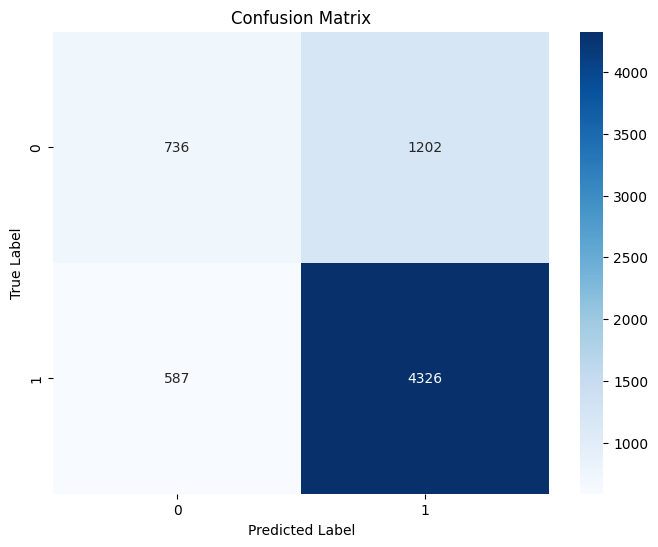

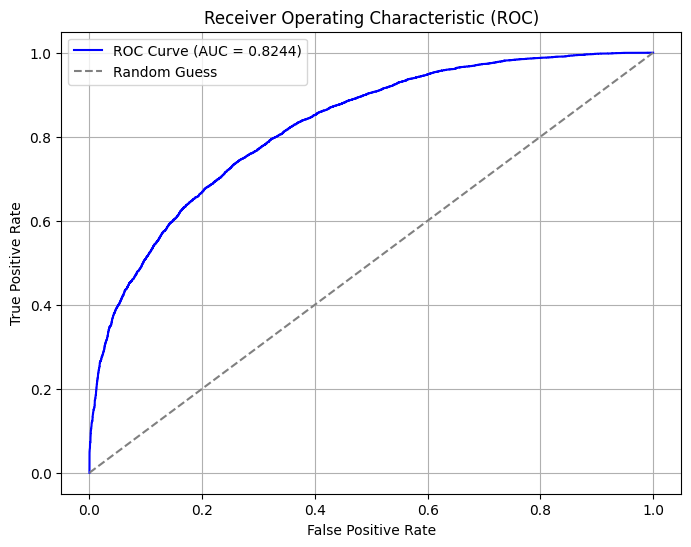

Test Accuracy: 73.89%
Test Loss: 0.9245
Test AUC: 0.8244


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Test function with visualization
def test_with_visualization(model, test_loader):
    model.eval()
    correct = 0
    test_loss = 0
    all_predictions, all_targets = [], []
    probabilities = None

    with torch.no_grad():
        for data, target in tqdm(test_loader, desc="Testing", unit="batch"):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = F.cross_entropy(output, target, reduction="sum")
            test_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(output, dim=1).cpu().data.numpy()
            probabilities = prob if probabilities is None else np.concatenate((probabilities, prob), axis=0)

    # Calculate test accuracy
    test_accuracy = 100. * correct / len(test_loader.dataset)

    # Average test loss
    test_loss /= len(test_loader.dataset)

    # Confusion Matrix
    cm = confusion_matrix(all_targets, all_predictions)
    print(f"Confusion Matrix:\n{cm}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # ROC-AUC
    num_classes = model.fc.out_features  # Number of output classes
    label_onehot = np.eye(num_classes)[np.array(all_targets).astype(int)]
    fpr, tpr, _ = roc_curve(label_onehot.ravel(), probabilities.ravel())
    auc_value = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_value:.4f})", color="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

    return test_accuracy, test_loss, auc_value

# Usage
# Assuming test_loader is defined
test_accuracy, test_loss, test_auc = test_with_visualization(model, test_loader)

if test_accuracy is not None:
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test AUC: {test_auc:.4f}")


Testing: 100%|██████████| 215/215 [00:07<00:00, 28.58batch/s]


Confusion Matrix:
[[ 736 1202]
 [ 587 4326]]


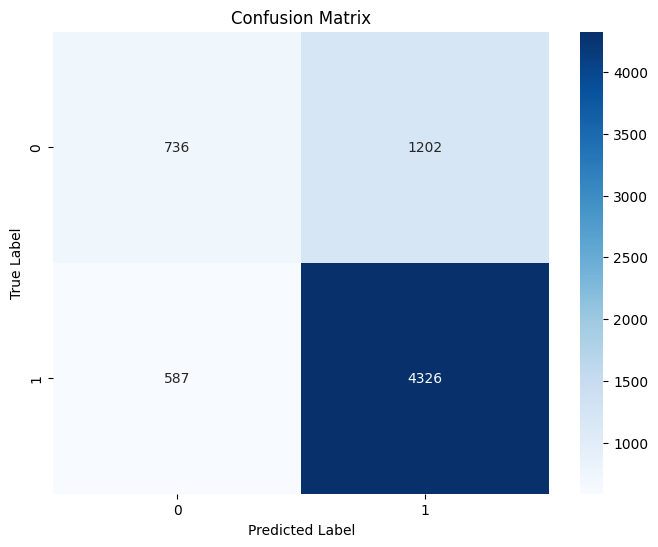

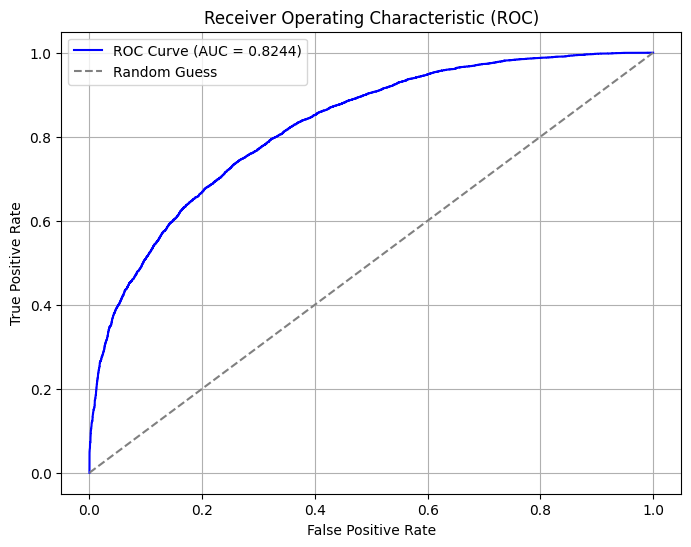

Test Accuracy: 73.89%
Test Loss: 0.9245
Test AUC: 0.8244


In [69]:
test_accuracy, test_loss, test_auc = test_with_visualization(model, test_loader)

if test_accuracy is not None:
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test AUC: {test_auc:.4f}")


In [71]:
import shutil
shutil.make_archive('/kaggle/working/resnet18_model', 'zip', '/kaggle/working/models')


'/kaggle/working/resnet18_model.zip'

In [72]:
import shutil

# Path to the model directory and the zip output
model_dir = '/kaggle/working/models'
zip_path = '/kaggle/working/resnet18_model.zip'

# Create a zip file
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', model_dir)
print(f"Model zipped at {zip_path}")


Model zipped at /kaggle/working/resnet18_model.zip


resNet50

In [109]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np
import os

In [110]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

**EarlyStopping class**

In [111]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='/kaggle/working/models/resNet50_best.pth'):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f"Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model...")
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss


**Custom ResNet50 Model**

In [112]:
class CustomResNet50(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomResNet50, self).__init__()
        resnet50 = models.resnet50(pretrained=True)
        self.features = nn.Sequential(*list(resnet50.children())[:-1])  # Remove the last FC layer
        self.fc = nn.Linear(resnet50.fc.in_features, num_classes)  # Replace with custom FC layer

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

**Training function**

In [113]:
def train(epoch, model, num_epochs, loader, criterion, l2_decay=0.01, lr=0.001):
    learning_rate = max(lr * (0.1 ** (epoch // 10)), 1e-5)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=l2_decay)
    model.train()
    correct = 0
    for data, label in tqdm(loader, desc=f"Epoch {epoch}/{num_epochs}", unit="batch"):
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(label.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(loader.dataset)
    print(f"Train Accuracy: {accuracy:.2f}%")
    return accuracy

**Validation function**

In [114]:
def validate(model, val_loader):
    model.eval()
    correct = 0
    all_predictions, all_targets = [], []
    possibilities = None
    test_loss = 0

    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            val_output = model(data)
            test_loss += F.cross_entropy(val_output, target, reduction="sum").item()
            pred = val_output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(val_output, dim=1).cpu().data.numpy()
            possibilities = prob if possibilities is None else np.concatenate((possibilities, prob), axis=0)

    accuracy = 100. * correct / len(val_loader.dataset)
    print(f"Validation Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")
    cm = confusion_matrix(all_targets, all_predictions)
    print(f"Confusion Matrix:\n{cm}")

    num_classes = val_output.shape[1]
    label_onehot = np.eye(num_classes)[np.array(all_targets).astype(int)]
    fpr, tpr, _ = roc_curve(label_onehot.ravel(), possibilities.ravel())
    auc_value = auc(fpr, tpr)
    return accuracy, test_loss, auc_value


**Save model function**

In [115]:
def save_model(model, save_dir, model_name, current_auc, best_auc):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    model_save_path = os.path.join(save_dir, f"{model_name}_best.pth")
    if current_auc > best_auc:  # Save only if AUC improves
        best_auc = current_auc
        torch.save(model.state_dict(), model_save_path)
        print(f"Model saved at: {model_save_path} with improved AUC: {best_auc:.4f}")
    else:
        print(f"No improvement in AUC: {current_auc:.4f} (Best: {best_auc:.4f})")
    return best_auc

**Training Loop**

In [116]:
model = CustomResNet50(num_classes=2).to(device)
num_epochs = 50
criterion = nn.CrossEntropyLoss()
l2_decay = 0.01
lr = 0.001
best_accuracy = 0.0
model_name = "resnet50"
save_dir = "/kaggle/working/models"

# Assuming train_loader and val_loader are defined earlier
for epoch in range(1, num_epochs + 1):
    # Train the model
    train_accuracy = train(epoch, model, num_epochs, train_loader, criterion, l2_decay, lr)

    # Validate the model
    with torch.no_grad():
        val_accuracy, val_loss, current_auc = validate(model, val_loader)

    # Save the model if AUC improves
    best_accuracy = save_model(model, save_dir, model_name, current_auc, best_accuracy)

    print(f"Epoch {epoch}/{num_epochs} completed.")

# Load the saved model
model.load_state_dict(torch.load(os.path.join(save_dir, f"{model_name}_best.pth")))
model.eval()
print("Best model loaded successfully!")

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 209MB/s]
Epoch 1/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 90.23%


Validation Loss: 852.3871, Accuracy: 84.31%
Confusion Matrix:
[[ 303  105]
 [ 207 1374]]
Model saved at: /kaggle/working/models/resnet50_best.pth with improved AUC: 0.9272
Epoch 1/50 completed.


Epoch 2/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 98.04%


Validation Loss: 1192.2723, Accuracy: 81.25%
Confusion Matrix:
[[ 297  111]
 [ 262 1319]]
No improvement in AUC: 0.9076 (Best: 0.9272)
Epoch 2/50 completed.


Epoch 3/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 99.29%


Validation Loss: 1307.0337, Accuracy: 81.55%
Confusion Matrix:
[[ 316   92]
 [ 275 1306]]
No improvement in AUC: 0.9046 (Best: 0.9272)
Epoch 3/50 completed.


Epoch 4/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 99.54%


Validation Loss: 1356.6938, Accuracy: 82.60%
Confusion Matrix:
[[ 287  121]
 [ 225 1356]]
No improvement in AUC: 0.8975 (Best: 0.9272)
Epoch 4/50 completed.


Epoch 5/50: 100%|██████████| 639/639 [01:54<00:00,  5.60batch/s]

Train Accuracy: 99.68%


Validation Loss: 1803.9246, Accuracy: 79.49%
Confusion Matrix:
[[ 305  103]
 [ 305 1276]]
No improvement in AUC: 0.8787 (Best: 0.9272)
Epoch 5/50 completed.


Epoch 6/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 99.77%


Validation Loss: 1615.7746, Accuracy: 81.00%
Confusion Matrix:
[[ 252  156]
 [ 222 1359]]
No improvement in AUC: 0.8886 (Best: 0.9272)
Epoch 6/50 completed.


Epoch 7/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 99.79%


Validation Loss: 1307.9888, Accuracy: 82.15%
Confusion Matrix:
[[ 269  139]
 [ 216 1365]]
No improvement in AUC: 0.9082 (Best: 0.9272)
Epoch 7/50 completed.


Epoch 8/50: 100%|██████████| 639/639 [02:11<00:00,  4.86batch/s]

Train Accuracy: 99.70%


Validation Loss: 1436.5056, Accuracy: 81.55%
Confusion Matrix:
[[ 257  151]
 [ 216 1365]]
No improvement in AUC: 0.8963 (Best: 0.9272)
Epoch 8/50 completed.


Epoch 9/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 99.60%


Validation Loss: 1472.8057, Accuracy: 85.17%
Confusion Matrix:
[[ 254  154]
 [ 141 1440]]
No improvement in AUC: 0.9137 (Best: 0.9272)
Epoch 9/50 completed.


Epoch 10/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 99.82%


Validation Loss: 1429.9072, Accuracy: 81.15%
Confusion Matrix:
[[ 284  124]
 [ 251 1330]]
No improvement in AUC: 0.8937 (Best: 0.9272)
Epoch 10/50 completed.


Epoch 11/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 99.98%


Validation Loss: 1406.1757, Accuracy: 81.75%
Confusion Matrix:
[[ 281  127]
 [ 236 1345]]
No improvement in AUC: 0.9013 (Best: 0.9272)
Epoch 11/50 completed.


Epoch 12/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 99.99%


Validation Loss: 1347.6695, Accuracy: 82.45%
Confusion Matrix:
[[ 276  132]
 [ 217 1364]]
No improvement in AUC: 0.9105 (Best: 0.9272)
Epoch 12/50 completed.


Epoch 13/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 99.99%


Validation Loss: 1403.3777, Accuracy: 81.95%
Confusion Matrix:
[[ 275  133]
 [ 226 1355]]
No improvement in AUC: 0.9065 (Best: 0.9272)
Epoch 13/50 completed.


Epoch 14/50: 100%|██████████| 639/639 [01:54<00:00,  5.60batch/s]

Train Accuracy: 99.99%


Validation Loss: 1433.8989, Accuracy: 82.00%
Confusion Matrix:
[[ 276  132]
 [ 226 1355]]
No improvement in AUC: 0.9051 (Best: 0.9272)
Epoch 14/50 completed.


Epoch 15/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1368.1626, Accuracy: 81.90%
Confusion Matrix:
[[ 273  135]
 [ 225 1356]]
No improvement in AUC: 0.9068 (Best: 0.9272)
Epoch 15/50 completed.


Epoch 16/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1395.9293, Accuracy: 81.90%
Confusion Matrix:
[[ 275  133]
 [ 227 1354]]
No improvement in AUC: 0.9063 (Best: 0.9272)
Epoch 16/50 completed.


Epoch 17/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]


Train Accuracy: 100.00%
Validation Loss: 1326.5766, Accuracy: 82.40%
Confusion Matrix:
[[ 264  144]
 [ 206 1375]]
No improvement in AUC: 0.9130 (Best: 0.9272)
Epoch 17/50 completed.


Epoch 18/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1413.5788, Accuracy: 81.65%
Confusion Matrix:
[[ 286  122]
 [ 243 1338]]
No improvement in AUC: 0.9012 (Best: 0.9272)
Epoch 18/50 completed.


Epoch 19/50: 100%|██████████| 639/639 [01:54<00:00,  5.60batch/s]


Train Accuracy: 99.99%
Validation Loss: 1417.9798, Accuracy: 81.70%
Confusion Matrix:
[[ 283  125]
 [ 239 1342]]
No improvement in AUC: 0.9008 (Best: 0.9272)
Epoch 19/50 completed.


Epoch 20/50: 100%|██████████| 639/639 [01:54<00:00,  5.60batch/s]

Train Accuracy: 100.00%


Validation Loss: 1367.5244, Accuracy: 82.05%
Confusion Matrix:
[[ 275  133]
 [ 224 1357]]
No improvement in AUC: 0.9078 (Best: 0.9272)
Epoch 20/50 completed.


Epoch 21/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 99.98%


Validation Loss: 1424.7742, Accuracy: 81.70%
Confusion Matrix:
[[ 288  120]
 [ 244 1337]]
No improvement in AUC: 0.8968 (Best: 0.9272)
Epoch 21/50 completed.


Epoch 22/50: 100%|██████████| 639/639 [01:54<00:00,  5.60batch/s]

Train Accuracy: 99.99%


Validation Loss: 1369.2220, Accuracy: 82.00%
Confusion Matrix:
[[ 282  126]
 [ 232 1349]]
No improvement in AUC: 0.9055 (Best: 0.9272)
Epoch 22/50 completed.


Epoch 23/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1416.3267, Accuracy: 81.90%
Confusion Matrix:
[[ 284  124]
 [ 236 1345]]
No improvement in AUC: 0.9019 (Best: 0.9272)
Epoch 23/50 completed.


Epoch 24/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 99.99%


Validation Loss: 1364.5893, Accuracy: 82.00%
Confusion Matrix:
[[ 283  125]
 [ 233 1348]]
No improvement in AUC: 0.9046 (Best: 0.9272)
Epoch 24/50 completed.


Epoch 25/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1415.9762, Accuracy: 81.80%
Confusion Matrix:
[[ 284  124]
 [ 238 1343]]
No improvement in AUC: 0.8997 (Best: 0.9272)
Epoch 25/50 completed.


Epoch 26/50: 100%|██████████| 639/639 [01:54<00:00,  5.60batch/s]

Train Accuracy: 100.00%


Validation Loss: 1368.2041, Accuracy: 82.30%
Confusion Matrix:
[[ 279  129]
 [ 223 1358]]
No improvement in AUC: 0.9074 (Best: 0.9272)
Epoch 26/50 completed.


Epoch 27/50: 100%|██████████| 639/639 [02:01<00:00,  5.25batch/s]

Train Accuracy: 99.99%


Validation Loss: 1495.4662, Accuracy: 81.35%
Confusion Matrix:
[[ 303  105]
 [ 266 1315]]
No improvement in AUC: 0.8907 (Best: 0.9272)
Epoch 27/50 completed.


Epoch 28/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1279.7702, Accuracy: 82.55%
Confusion Matrix:
[[ 268  140]
 [ 207 1374]]
No improvement in AUC: 0.9174 (Best: 0.9272)
Epoch 28/50 completed.


Epoch 29/50: 100%|██████████| 639/639 [01:54<00:00,  5.60batch/s]

Train Accuracy: 99.99%


Validation Loss: 1372.3895, Accuracy: 82.10%
Confusion Matrix:
[[ 282  126]
 [ 230 1351]]
No improvement in AUC: 0.9074 (Best: 0.9272)
Epoch 29/50 completed.


Epoch 30/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 99.99%


Validation Loss: 1322.2484, Accuracy: 81.90%
Confusion Matrix:
[[ 268  140]
 [ 220 1361]]
No improvement in AUC: 0.9120 (Best: 0.9272)
Epoch 30/50 completed.


Epoch 31/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1415.7053, Accuracy: 81.90%
Confusion Matrix:
[[ 286  122]
 [ 238 1343]]
No improvement in AUC: 0.8996 (Best: 0.9272)
Epoch 31/50 completed.


Epoch 32/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1347.5611, Accuracy: 82.40%
Confusion Matrix:
[[ 284  124]
 [ 226 1355]]
No improvement in AUC: 0.9073 (Best: 0.9272)
Epoch 32/50 completed.


Epoch 33/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1342.3769, Accuracy: 82.50%
Confusion Matrix:
[[ 274  134]
 [ 214 1367]]
No improvement in AUC: 0.9102 (Best: 0.9272)
Epoch 33/50 completed.


Epoch 34/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1364.9543, Accuracy: 82.10%
Confusion Matrix:
[[ 278  130]
 [ 226 1355]]
No improvement in AUC: 0.9067 (Best: 0.9272)
Epoch 34/50 completed.


Epoch 35/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1319.0367, Accuracy: 82.25%
Confusion Matrix:
[[ 269  139]
 [ 214 1367]]
No improvement in AUC: 0.9135 (Best: 0.9272)
Epoch 35/50 completed.


Epoch 36/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1367.8980, Accuracy: 82.10%
Confusion Matrix:
[[ 275  133]
 [ 223 1358]]
No improvement in AUC: 0.9081 (Best: 0.9272)
Epoch 36/50 completed.


Epoch 37/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1329.7538, Accuracy: 82.40%
Confusion Matrix:
[[ 276  132]
 [ 218 1363]]
No improvement in AUC: 0.9094 (Best: 0.9272)
Epoch 37/50 completed.


Epoch 38/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 99.99%


Validation Loss: 1433.5407, Accuracy: 81.55%
Confusion Matrix:
[[ 297  111]
 [ 256 1325]]
No improvement in AUC: 0.8961 (Best: 0.9272)
Epoch 38/50 completed.


Epoch 39/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1407.5927, Accuracy: 81.60%
Confusion Matrix:
[[ 287  121]
 [ 245 1336]]
No improvement in AUC: 0.8999 (Best: 0.9272)
Epoch 39/50 completed.


Epoch 40/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1378.4062, Accuracy: 81.85%
Confusion Matrix:
[[ 282  126]
 [ 235 1346]]
No improvement in AUC: 0.9026 (Best: 0.9272)
Epoch 40/50 completed.


Epoch 41/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1405.3426, Accuracy: 81.55%
Confusion Matrix:
[[ 289  119]
 [ 248 1333]]
No improvement in AUC: 0.8972 (Best: 0.9272)
Epoch 41/50 completed.


Epoch 42/50: 100%|██████████| 639/639 [01:54<00:00,  5.60batch/s]

Train Accuracy: 100.00%


Validation Loss: 1370.4898, Accuracy: 81.90%
Confusion Matrix:
[[ 280  128]
 [ 232 1349]]
No improvement in AUC: 0.9046 (Best: 0.9272)
Epoch 42/50 completed.


Epoch 43/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 99.99%


Validation Loss: 1365.6012, Accuracy: 81.95%
Confusion Matrix:
[[ 284  124]
 [ 235 1346]]
No improvement in AUC: 0.9033 (Best: 0.9272)
Epoch 43/50 completed.


Epoch 44/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1432.0850, Accuracy: 81.40%
Confusion Matrix:
[[ 293  115]
 [ 255 1326]]
No improvement in AUC: 0.8964 (Best: 0.9272)
Epoch 44/50 completed.


Epoch 45/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1336.1280, Accuracy: 81.95%
Confusion Matrix:
[[ 279  129]
 [ 230 1351]]
No improvement in AUC: 0.9074 (Best: 0.9272)
Epoch 45/50 completed.


Epoch 46/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1351.2011, Accuracy: 82.00%
Confusion Matrix:
[[ 281  127]
 [ 231 1350]]
No improvement in AUC: 0.9075 (Best: 0.9272)
Epoch 46/50 completed.


Epoch 47/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1332.7540, Accuracy: 82.20%
Confusion Matrix:
[[ 276  132]
 [ 222 1359]]
No improvement in AUC: 0.9101 (Best: 0.9272)
Epoch 47/50 completed.


Epoch 48/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1599.0199, Accuracy: 80.74%
Confusion Matrix:
[[ 312   96]
 [ 287 1294]]
No improvement in AUC: 0.8806 (Best: 0.9272)
Epoch 48/50 completed.


Epoch 49/50: 100%|██████████| 639/639 [01:54<00:00,  5.60batch/s]

Train Accuracy: 100.00%


Validation Loss: 1427.7273, Accuracy: 81.65%
Confusion Matrix:
[[ 294  114]
 [ 251 1330]]
No improvement in AUC: 0.8956 (Best: 0.9272)
Epoch 49/50 completed.


Epoch 50/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 100.00%


Validation Loss: 1351.6799, Accuracy: 82.15%
Confusion Matrix:
[[ 282  126]
 [ 229 1352]]
No improvement in AUC: 0.9050 (Best: 0.9272)
Epoch 50/50 completed.
Best model loaded successfully!


/tmp/ipykernel_30/1434700409.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(save_dir, f"{model_name}_best.pth")))


**Test Function**

In [117]:
def test_with_visualization(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    all_predictions, all_targets = [], []
    probabilities = None
    test_loss = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            test_output = model(data)
            test_loss += F.cross_entropy(test_output, target, reduction="sum").item()
            pred = test_output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(test_output, dim=1).cpu().data.numpy()
            probabilities = prob if probabilities is None else np.concatenate((probabilities, prob), axis=0)

    # Calculate metrics
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

    # Confusion Matrix
    cm = confusion_matrix(all_targets, all_predictions)
    print(f"Confusion Matrix:\n{cm}")

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(set(all_targets)))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

    # ROC-AUC Curve
    num_classes = test_output.shape[1]
    label_onehot = np.eye(num_classes)[np.array(all_targets).astype(int)]  # One-hot encode the true labels
    fpr, tpr, _ = roc_curve(label_onehot.ravel(), probabilities.ravel())  # Compute ROC curve
    auc_value = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_value:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

    return accuracy, test_loss, auc_value


Test Loss: 6609.6656, Test Accuracy: 74.14%
Confusion Matrix:
[[ 628 1310]
 [ 462 4451]]


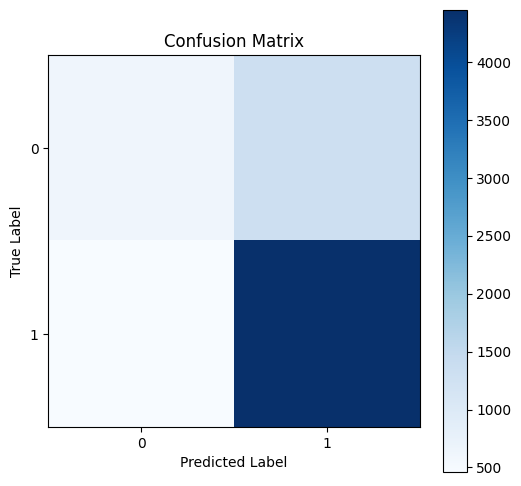

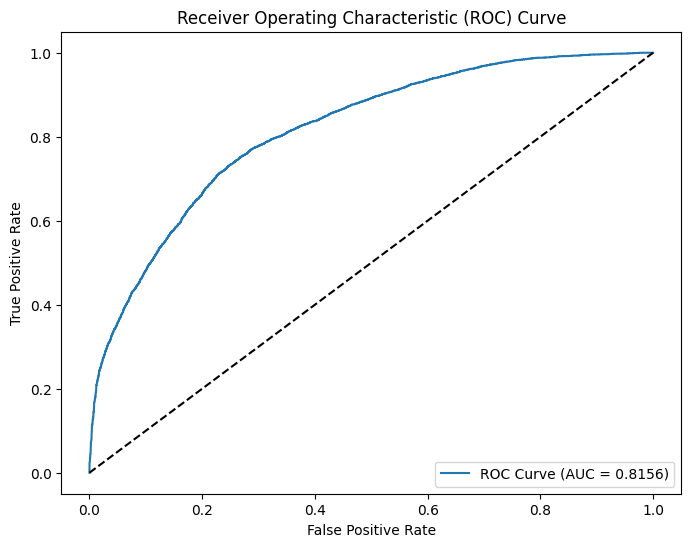

Test Accuracy: 74.14%
Test Loss: 6609.6656
Test AUC: 0.8156


In [119]:
test_accuracy, test_loss, test_auc = test_with_visualization(model, test_loader)

if test_accuracy is not None:
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test AUC: {test_auc:.4f}")



In [120]:
import os
import torch
import zipfile

# Define paths
model_path = "/kaggle/working/resnet50_model.pth"  # Model file path
zip_path = "/kaggle/working/resnet50_model.zip"   # Destination zip file path

# Save the model weights
torch.save(model.state_dict(), model_path)

# Create a ZIP file
with zipfile.ZipFile(zip_path, 'w') as zipf:
    zipf.write(model_path, arcname=os.path.basename(model_path))

print(f"Model zip created at: {zip_path}")


Model zip created at: /kaggle/working/resnet50_model.zip
